## Project: The impact of social and economic factors on U.S. election outcomes in county level

This project's aim is to analyze the how socioeconomic factors influence the US's election results in county level. We will analyze various social factors, such as race, education, and marital status, and economic factors, such as GDP, to understand which socioeconomic factors have the most impact on the election results, and possibly building a machine learning model that can predict the election results effectively given our variables in our datasets. Research Question: How do socioeconomic factors influence U.S. election outcomes at the county level?

The datasets used in this project are U.S. Census and Election Results dataset from Kaggle, which is our main dataset, and GDP by County. The US Census and Election Results dataset combines U.S. county-level demographics, economic, and election data from 2000 to 2020. The dataset integrates information from multiple resources: U.S. Census Bureau, the Bureau of Economic Analysis, and MIT Election data. In this project, this dataset is merged with GDP by County dataset to further investigate the election results. As a result, the merged dataset includes socioeconomic variables from 2005 to 2018. You can find the U.S. Census and Election Results dataset in the following link: [Visit Kaggle Dataset](https://www.kaggle.com/datasets/minhbtnguyen/us-census-for-election-predictions-20002020/data)

This jupyter notebook includes all detailed analysis of the project and it consists of the following parts: 
- Data Cleaning & Preparation
- Exploratory Data Analysis 
- Correlation Analysis 
- Predictive Models: regression amd machine learning models 


### Data Cleaning and Preparation
In the data preparation stage, we will prepare our data for further steps: EDA, correlation analysis, and predictive modelling. Through data preprocessing, we aim to merge the necessary datasets, handle the missing and duplicate values.
- merge the two datasets
- Handle missing values 
- Handle duplicate values

In [1]:
# importing the libraries 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) # to ignore the warnings 
warnings.simplefilter(action='ignore', category=FutureWarning)
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
import statsmodels.api as sm
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [2]:
# importing the datasets 
election_df = pd.read_csv('Data/county_census_and_election_result.csv')
gdp_df = pd.read_csv('Data/GDP by County.csv')
election_df.head(5)

year  county_fips   inctot  mortamt1  avrg_age  ftotinc  foodstmp_1_freq  \
0  2000            1  24566.4     634.6      46.0  46912.7             93.6   
1  2000            2  33842.9    1080.1      42.4  65021.9             95.3   
2  2000            4  28331.7     814.7      45.3  52826.7             95.8   
3  2000            5  22782.6     557.5      46.2  43941.3             92.5   
4  2000            6  32245.0    1216.3      43.8  61455.3             95.7   

   foodstmp_2_freq  sex_2_freq  sex_1_freq  ...  empstat_3.0_freq  \
0              6.4        54.0        46.0  ...              38.4   
1              4.7        50.3        49.7  ...              25.2   
2              4.2        52.1        47.9  ...              38.3   
3              7.5        53.0        47.0  ...              37.8   
4              4.3        52.0        48.0  ...              35.1   

   empstat_2.0_freq  state_po  county_name  democrat  green  liberitarian  \
0               3.2       NaN          NaN       NaN    NaN           NaN   
1               4.8       NaN          NaN       NaN    NaN           NaN   
2               3.2       NaN          NaN       NaN    NaN           NaN   
3               3.2       NaN          NaN       NaN    NaN           NaN   
4               3.6       NaN          NaN       NaN    NaN           NaN   

   other  republican  winner  
0    NaN         NaN     NaN  
1    NaN         NaN     NaN  
2    NaN         NaN     NaN  
3    NaN         NaN     NaN  
4    NaN         NaN     NaN  

[5 rows x 45 columns]

In [3]:
gdp_df.head(5)

index  Year  County FIPS     Region          SUB_REGION    State  \
0      0  2001         1001  Southeast  East South Central  Alabama   
1      1  2001         1003  Southeast  East South Central  Alabama   
2      2  2001         1005  Southeast  East South Central  Alabama   
3      3  2001         1007  Southeast  East South Central  Alabama   
4      4  2001         1009  Southeast  East South Central  Alabama   

  STATE_ABBR   County County Full Name  GDP (Chained $)  
0         AL  Autauga   Autauga County        954588000  
1         AL  Baldwin   Baldwin County       3929753000  
2         AL  Barbour   Barbour County        813278000  
3         AL     Bibb      Bibb County        292693000  
4         AL   Blount    Blount County        810381000

In [4]:
# merging the two datasets based on inner method 
gdp_df.rename(columns={'Year':'year', 'County FIPS': 'county_fips'}, inplace=True) # renaming the column name to match the election dataset 
df = pd.merge(election_df, gdp_df, on=['county_fips', 'year'], how='inner')
df.head(5)

year  county_fips   inctot  mortamt1  avrg_age  ftotinc  foodstmp_1_freq  \
0  2005         1003  28658.9     769.3      48.6  52832.2             94.5   
1  2005         1015  23506.2     621.8      46.9  45643.9             91.5   
2  2005         1055  20049.0     505.0      47.5  39262.5             94.3   
3  2005         1073  26555.2     743.8      46.6  50836.8             93.9   
4  2005         1081  24743.4     688.2      40.0  41933.0             94.7   

   foodstmp_2_freq  sex_2_freq  sex_1_freq  ...  republican  winner  index  \
0              5.5        52.5        47.5  ...         NaN     NaN  32523   
1              8.5        55.3        44.7  ...         NaN     NaN  32529   
2              5.7        55.1        44.9  ...         NaN     NaN  32549   
3              6.1        54.6        45.4  ...         NaN     NaN  32558   
4              5.3        53.6        46.4  ...         NaN     NaN  32562   

      Region          SUB_REGION    State  STATE_ABBR     County  \
0  Southeast  East South Central  Alabama          AL    Baldwin   
1  Southeast  East South Central  Alabama          AL    Calhoun   
2  Southeast  East South Central  Alabama          AL     Etowah   
3  Southeast  East South Central  Alabama          AL  Jefferson   
4  Southeast  East South Central  Alabama          AL        Lee   

   County Full Name  GDP (Chained $)  
0    Baldwin County       5257742000  
1    Calhoun County       4188694000  
2     Etowah County       2830042000  
3  Jefferson County      41130878000  
4        Lee County       3794406000  

[5 rows x 53 columns]

In [5]:
drop_columns = ['County Full Name', 'index', 'State', 'STATE_ABBR', 'SUB_REGION', 'state_po'] # dropping the irrelevant columns
df.drop(columns=drop_columns, inplace=True)

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5643 entries, 0 to 5642
Data columns (total 47 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   year                  5643 non-null   int64  
 1   county_fips           5643 non-null   int64  
 2   inctot                5643 non-null   float64
 3   mortamt1              5643 non-null   float64
 4   avrg_age              5643 non-null   float64
 5   ftotinc               5643 non-null   float64
 6   foodstmp_1_freq       5643 non-null   float64
 7   foodstmp_2_freq       5643 non-null   float64
 8   sex_2_freq            5643 non-null   float64
 9   sex_1_freq            5643 non-null   float64
 10  marst_5_freq          5643 non-null   float64
 11  marst_6_freq          5643 non-null   float64
 12  marst_1_freq          5643 non-null   float64
 13  marst_4_freq          5643 non-null   float64
 14  marst_3_freq          5643 non-null   float64
 15  marst_2_freq         

In [7]:
df.columns # note: you can find the detailed description of the variables in 'Variable_description.txt' text file

Index(['year', 'county_fips', 'inctot', 'mortamt1', 'avrg_age', 'ftotinc',
       'foodstmp_1_freq', 'foodstmp_2_freq', 'sex_2_freq', 'sex_1_freq',
       'marst_5_freq', 'marst_6_freq', 'marst_1_freq', 'marst_4_freq',
       'marst_3_freq', 'marst_2_freq', 'race_1_freq', 'race_2_freq',
       'race_7_freq', 'race_8_freq', 'race_5_freq', 'race_6_freq',
       'race_3_freq', 'race_4_freq', 'race_9_freq', 'ctz_stat_1_freq',
       'ctz_stat_3_freq', 'ctz_stat_2_freq', 'lang_1_freq', 'lang_2_freq',
       'educ_attain_2.0_freq', 'educ_attain_1.0_freq', 'educ_attain_3.0_freq',
       'educ_attain_4.0_freq', 'empstat_1.0_freq', 'empstat_3.0_freq',
       'empstat_2.0_freq', 'county_name', 'democrat', 'green', 'liberitarian',
       'other', 'republican', 'winner', 'Region', 'County', 'GDP (Chained $)'],
      dtype='object')

In [8]:
# checking for missing values 
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
print(f'Missing values: {missing_values}')
duplicated_values = df.duplicated().sum() # checking for duplicated values 
print(f'Duplicated values: {duplicated_values}')

Missing values: county_name     4407
democrat        4407
green           4407
liberitarian    4407
other           4407
republican      4407
winner          4407
dtype: int64
Duplicated values: 0


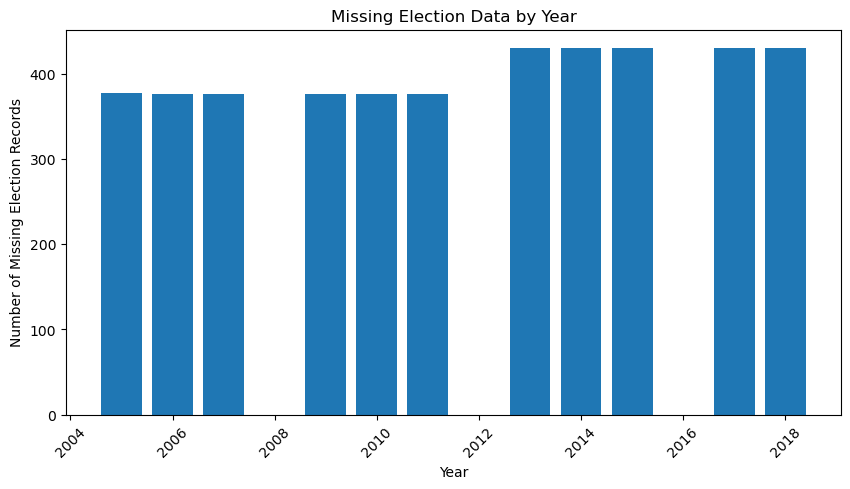

year  county_fips   inctot  mortamt1  avrg_age  ftotinc  foodstmp_1_freq  \
0  2005         1003  28658.9     769.3      48.6  52832.2             94.5   
1  2005         1015  23506.2     621.8      46.9  45643.9             91.5   
2  2005         1055  20049.0     505.0      47.5  39262.5             94.3   
3  2005         1073  26555.2     743.8      46.6  50836.8             93.9   
4  2005         1081  24743.4     688.2      40.0  41933.0             94.7   

   foodstmp_2_freq  sex_2_freq  sex_1_freq  ...  county_name  democrat  green  \
0              5.5        52.5        47.5  ...          NaN       NaN    NaN   
1              8.5        55.3        44.7  ...          NaN       NaN    NaN   
2              5.7        55.1        44.9  ...          NaN       NaN    NaN   
3              6.1        54.6        45.4  ...          NaN       NaN    NaN   
4              5.3        53.6        46.4  ...          NaN       NaN    NaN   

   liberitarian  other  republican  winner     Region     County  \
0           NaN    NaN         NaN     NaN  Southeast    Baldwin   
1           NaN    NaN         NaN     NaN  Southeast    Calhoun   
2           NaN    NaN         NaN     NaN  Southeast     Etowah   
3           NaN    NaN         NaN     NaN  Southeast  Jefferson   
4           NaN    NaN         NaN     NaN  Southeast        Lee   

   GDP (Chained $)  
0       5257742000  
1       4188694000  
2       2830042000  
3      41130878000  
4       3794406000  

[5 rows x 47 columns]

In [9]:
# handling the missing values 
missing_election_data = df[
    df[['democrat', 'green', 'liberitarian', 'other', 'republican', 'winner']].isnull().any(axis=1) # checking the years where election-related data is missing
]
# counting missing election data per year
missing_election_counts = missing_election_data['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(missing_election_counts.index, missing_election_counts.values)
plt.xlabel("Year")
plt.ylabel("Number of Missing Election Records")
plt.title("Missing Election Data by Year")
plt.xticks(rotation=45)
plt.show()

missing_election_data.head()


We identified a significant number of missing values in our dataset. Upon further investigation, we found that election data is absent for non-election years, while economic data is available for all years. Since non-election years, dropping these entries is not a viable option. To address this, we will retain all years and apply forward-filling to propagate election results into non-election years. Additionally, for missing county names, we will use backward-filling within states, as county names remain unchanged over time. 

In [10]:
# Forward-fill election results (propagate the last available election data forward)
election_columns = ['winner', 'democrat', 'republican', 'green', 'liberitarian', 'other']
df[election_columns] = df.groupby('county_fips')[election_columns].fillna(method='ffill')

# Backward-fill election results for remaining missing values
df[election_columns] = df.groupby('county_fips')[election_columns].fillna(method='bfill')
df[['county_name']] = df.groupby('county_fips')[['county_name']].fillna(method='bfill')

# checking for remaining missing values after handling
remaining_missing_values = df.isnull().sum()
remaining_missing_values = remaining_missing_values[remaining_missing_values > 0]
remaining_missing_values

county_name    995
dtype: int64

## 2. Exploratory Data Analysis (EDA) 
In Exploratory Data Analysis, our goal is to get an overview of the dataset to underset distributions and central tendencies and understand how key variables, such as GDP, income, and voting patterns are distributed. Furthermore, we aim to investigate how key variables evolve over time. We will focus on identifying relationships between economic, social and election-related factors. We are also going to cover county-level insights by comparing economic and political differences between counties, and lastly identify which economic and social factors influence election outcomes the most. EDA consists of the following parts: 
- Summary Statistics 
- Data Distributions 
- Regional Analysis
- Trends over time 
- County-level Insights 

Furthermore, we will answer the following questions through Exploratory Data Analysis: 
- What are the distributions of variables in our dataset?
- How Does County-Level GDP Differ Between Democrat and Republican-Won Counties During U.S. Elections?
- Does any regions more likely to lean towards one party?

#### 2.1. Summary Statistics

In [11]:
# 1. Summary Statistics 
summary_stats = df.describe()
summary_stats

year   county_fips        inctot     mortamt1     avrg_age  \
count  5643.000000   5643.000000   5643.000000  5643.000000  5643.000000   
mean   2011.733298  28598.630870  28418.259206   901.503899    46.494329   
std       4.025301  15627.899651   7069.868089   291.500496     2.700885   
min    2005.000000   1003.000000  14165.200000   397.100000    36.100000   
25%    2008.000000  13097.000000  23587.000000   691.950000    44.900000   
50%    2012.000000  29099.000000  26963.500000   823.500000    46.500000   
75%    2015.000000  42019.000000  31726.750000  1035.450000    48.000000   
max    2018.000000  55139.000000  62558.800000  2080.900000    59.100000   

             ftotinc  foodstmp_1_freq  foodstmp_2_freq   sex_2_freq  \
count    5643.000000      5643.000000      5643.000000  5643.000000   
mean    56966.852791        90.414159         9.585841    52.103349   
std     13845.866287         5.172798         5.172798     1.698383   
min     31193.400000        58.000000         0.400000    35.200000   
25%     47060.450000        87.400000         5.800000    51.200000   
50%     53640.100000        91.100000         8.900000    52.200000   
75%     63992.350000        94.200000        12.600000    53.100000   
max    126502.000000        99.600000        42.000000    61.600000   

        sex_1_freq  ...  empstat_1.0_freq  empstat_3.0_freq  empstat_2.0_freq  \
count  5643.000000  ...       5643.000000       5643.000000       5643.000000   
mean     47.896651  ...         59.032802         36.899610          4.067624   
std       1.698323  ...          6.233592          5.911726          1.608494   
min      38.400000  ...         32.700000         20.300000          0.800000   
25%      46.900000  ...         55.300000         32.900000          2.900000   
50%      47.800000  ...         59.500000         36.400000          3.800000   
75%      48.800000  ...         63.200000         40.300000          5.000000   
max      64.800000  ...         78.300000         64.300000         12.400000   

           democrat   green  liberitarian          other     republican  \
count  5.643000e+03  5643.0        5643.0    5643.000000    5643.000000   
mean   1.109811e+05     0.0           0.0    4986.575049   82324.375155   
std    1.802020e+05     0.0           0.0    9945.726213   91847.892330   
min    2.474000e+03     0.0           0.0       0.000000    2187.000000   
25%    2.827900e+04     0.0           0.0    1007.000000   34053.000000   
50%    5.103700e+04     0.0           0.0    2158.000000   52092.000000   
75%    1.211240e+05     0.0           0.0    4904.000000   97622.000000   
max    2.464364e+06     0.0           0.0  200201.000000  956425.000000   

            winner  GDP (Chained $)  
count  5643.000000     5.643000e+03  
mean      0.471912     2.791014e+10  
std       0.499255     5.467203e+10  
min       0.000000     1.859106e+09  
25%       0.000000     6.070146e+09  
50%       0.000000     1.083676e+10  
75%       1.000000     2.737178e+10  
max       1.000000     7.108933e+11  

[8 rows x 44 columns]

#### 2.2. Data Distributions

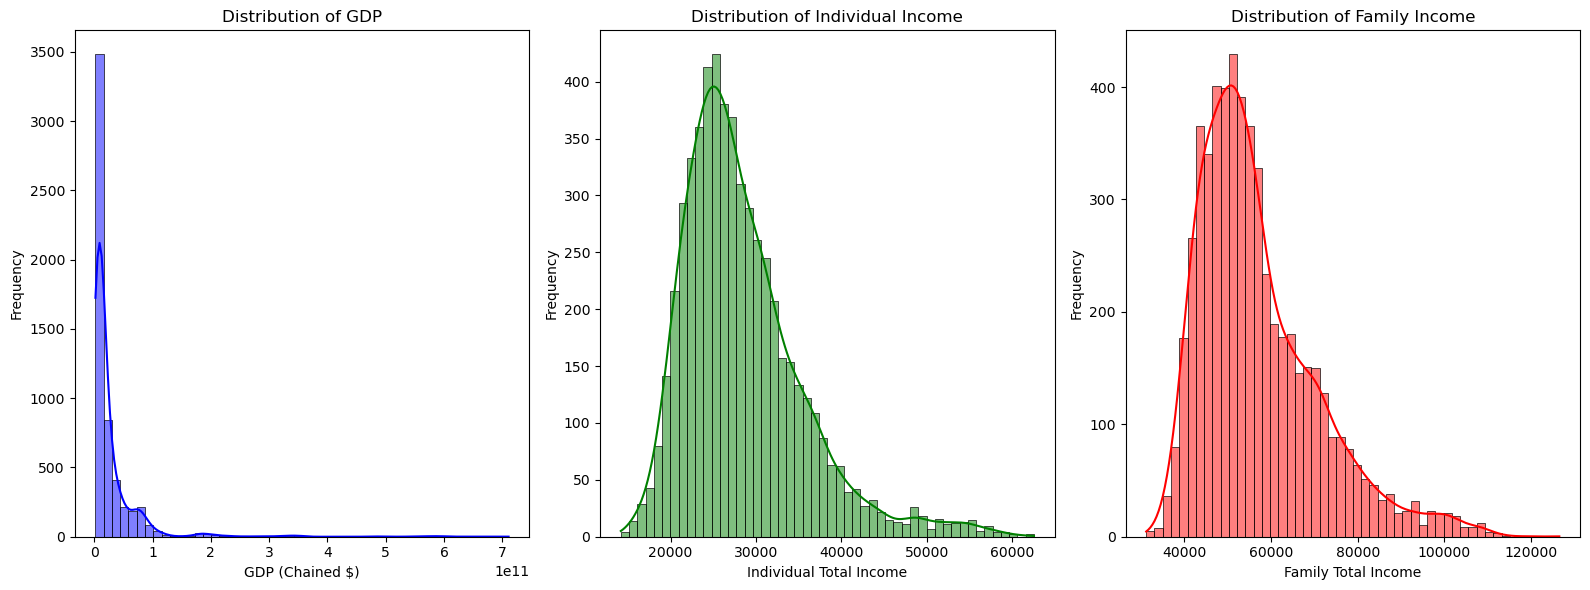

In [12]:
# 2. Data Distribution Analysis 

plt.figure(figsize=(16, 6))
# histogram of GDP
plt.subplot(1, 3, 1)
sns.histplot(df['GDP (Chained $)'], bins=50, kde=True, color='blue')
plt.xlabel('GDP (Chained $)')
plt.ylabel('Frequency')
plt.title('Distribution of GDP')
# histogram for individual total income
plt.subplot(1, 3, 2)
sns.histplot(df['inctot'], bins=50, kde=True, color='green')
plt.xlabel('Individual Total Income')
plt.ylabel('Frequency')
plt.title('Distribution of Individual Income')
# histogram of family total income 
plt.subplot(1, 3, 3)
sns.histplot(df['ftotinc'], bins=50, kde=True, color='red')
plt.xlabel('Family Total Income')
plt.ylabel('Frequency')
plt.title('Distribution of Family Income')
plt.tight_layout()
plt.show()

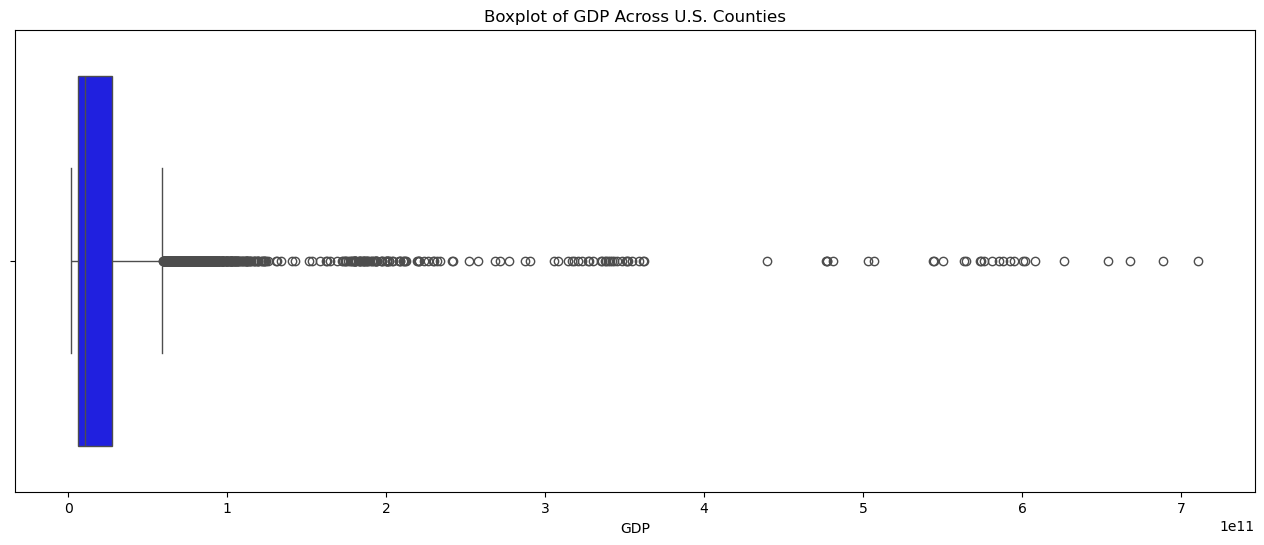

(6.507695192114902,
 count    5.643000e+03
 mean     2.791014e+10
 std      5.467203e+10
 min      1.859106e+09
 25%      6.070146e+09
 50%      1.083676e+10
 75%      2.737178e+10
 max      7.108933e+11
 Name: GDP (Chained $), dtype: float64)

In [13]:
# generating a boxplot to investigate GDP distribution and detect outliers
plt.figure(figsize=(16, 6))
sns.boxplot(x=df['GDP (Chained $)'], color='blue')
plt.xlabel('GDP')
plt.title('Boxplot of GDP Across U.S. Counties')
plt.show()

# skewness and basic statistics for GDP
gdp_skewness = df['GDP (Chained $)'].skew()
gdp_summary = df['GDP (Chained $)'].describe()

gdp_skewness, gdp_summary


#### GDP Analysis Findings 
1. Boxplot Insights (Outliers & Distribution)
    - The HDP distribution is highly skewed, meaning a small number of counties have extremely high GDP values. 
    - There are several extreme outliers, likely representing major metropolitan areas or economic hubs
2. Summary Statistics
    - Mean GDP: $27.9 billion 
    - Median GDP: $10.8 billion (significantly lower than the mean, which confirms the skewness)
    - Standard deviation: $54.67 billion (indicates high variability)
    - Min GDP: $1.85 billion 
    - Max GDP: $710.9 billion (representing major cities)
3. Skewness 
    - Skewness value: 6.51 (indicates a highly right-skewed distribution)

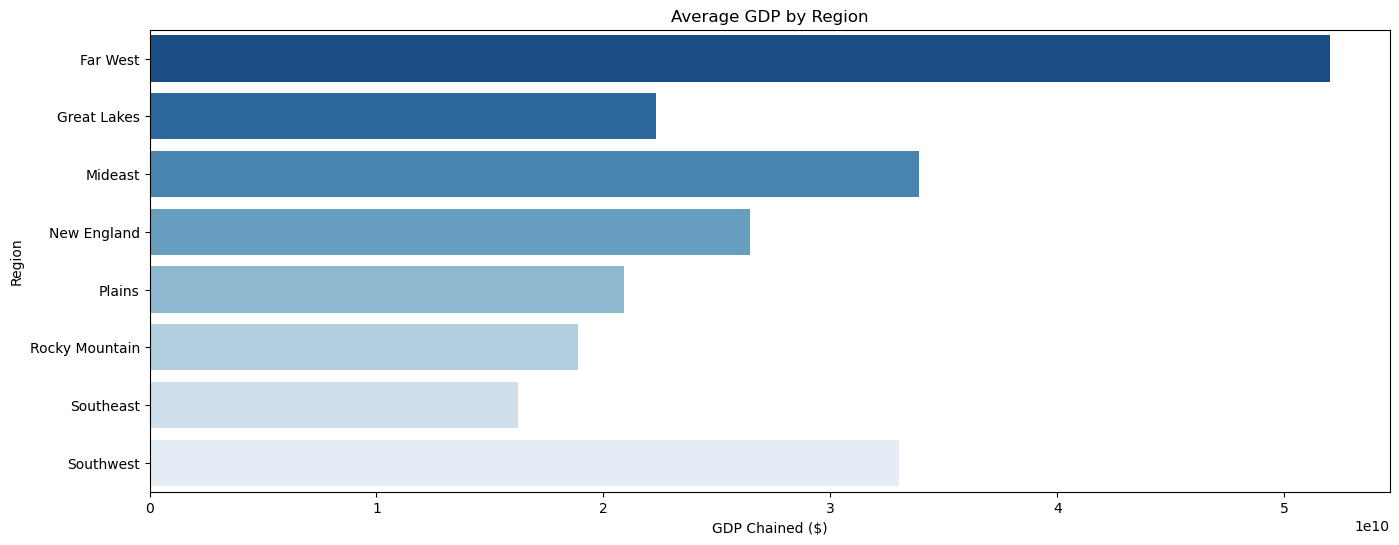

In [14]:
# Which Region has the highest average GDP? 

df_region = df.groupby('Region')[['GDP (Chained $)', 'democrat', 'republican']].mean().reset_index()
plt.figure(figsize=(16, 6))
sns.barplot(data=df_region, x='GDP (Chained $)', y='Region', hue='Region', palette='Blues_r', legend=False)
plt.xlabel('GDP Chained ($)')
plt.title('Average GDP by Region')
plt.show()


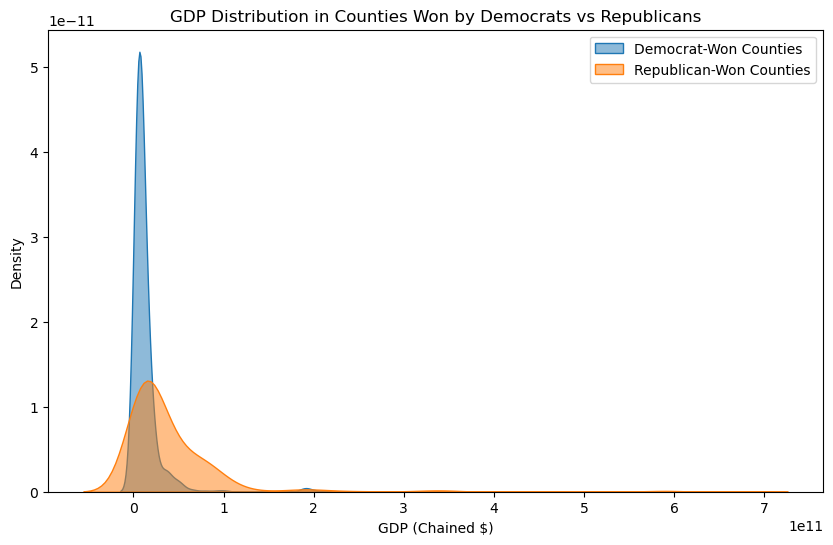

(count    6.070000e+02
 mean     1.235458e+10
 std      1.990427e+10
 min      1.860966e+09
 25%      4.662225e+09
 50%      7.289876e+09
 75%      1.251368e+10
 max      2.042825e+11
 Name: GDP (Chained $), dtype: float64,
 count    6.290000e+02
 mean     4.247665e+10
 std      7.056920e+10
 min      2.804443e+09
 25%      8.772042e+09
 50%      2.152899e+10
 75%      5.134485e+10
 max      6.677061e+11
 Name: GDP (Chained $), dtype: float64)

In [15]:
# county level insights: How Does County-Level GDP Differ Between Democrat and Republican-Won Counties During U.S. Elections?
election_years = [2008, 2012, 2016]
df_elections_years = df[df['year'].isin(election_years)]
# separating counties based on corrected winning party labels
democrat_won = df_elections_years[df_elections_years['winner'] == 1.0]
republican_won = df_elections_years[df_elections_years['winner'] == 0.0]
# computing summary statistics for GDP in Democrat and Republican counties
democrat_gdp_stats = democrat_won['GDP (Chained $)'].describe()
republican_gdp_stats = republican_won['GDP (Chained $)'].describe()
# visualizing GDP distribution for Democrat and Republican counties
plt.figure(figsize=(10, 6))
sns.kdeplot(democrat_won['GDP (Chained $)'], label="Democrat-Won Counties", fill=True, alpha=0.5)
sns.kdeplot(republican_won['GDP (Chained $)'], label="Republican-Won Counties", fill=True, alpha=0.5)
plt.xlabel("GDP (Chained $)")
plt.ylabel("Density")
plt.title("GDP Distribution in Counties Won by Democrats vs Republicans")
plt.legend()
plt.show()

democrat_gdp_stats, republican_gdp_stats

Key Insights: 
1. Republican won counties still tend to have a higher mean GDP (around 42.5B) compared to Democrat won counties (around 12.3B). 
2. The GDP distribution of Republican counties remains broader, with a higher spread compared to democrat counties. The standard deviation of Republican won counties is approximately 70.6B while democrat won counties' standard deviation is around 19.9B. 

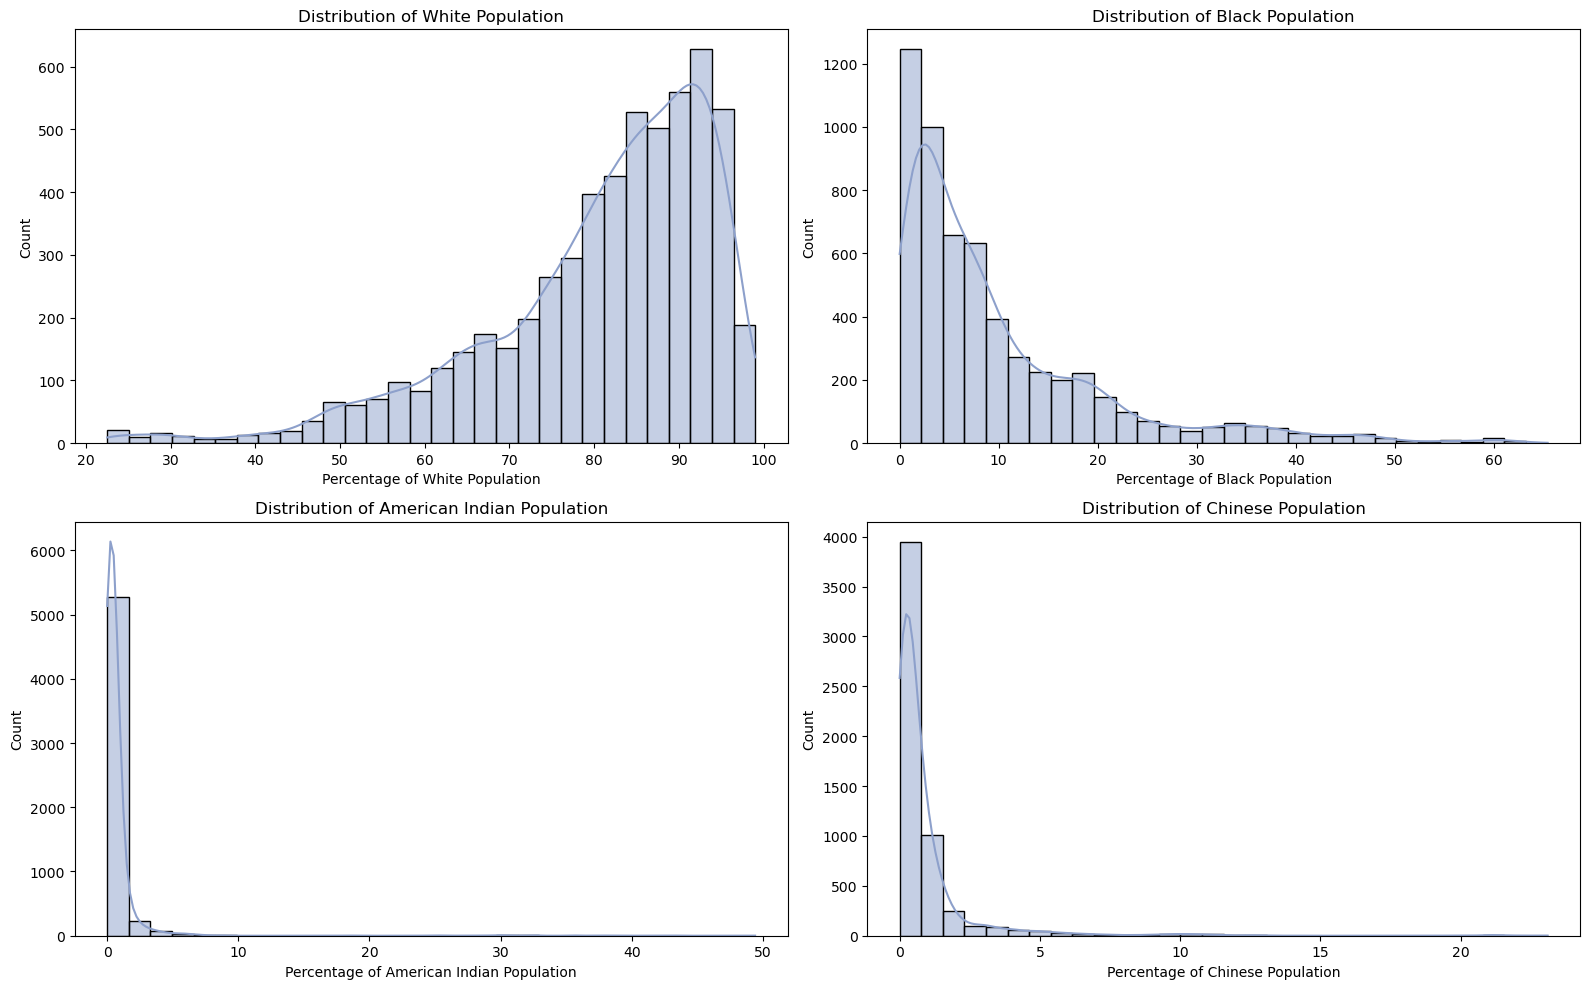

In [16]:
# distributions of race variables 
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
# race 1 
sns.histplot(df['race_1_freq'], ax=axes[0,0], kde=True, bins=30, color=plt.cm.Set2(2))
axes[0, 0].set_title('Distribution of White Population')
axes[0, 0].set_xlabel('Percentage of White Population')
# race 2 
sns.histplot(df['race_2_freq'], ax=axes[0, 1], kde=True, bins=30, color=plt.cm.Set2(2))
axes[0, 1].set_title('Distribution of Black Population')
axes[0, 1].set_xlabel('Percentage of Black Population')
# race 3 
sns.histplot(df['race_3_freq'], ax=axes[1, 0], kde=True, bins=30, color=plt.cm.Set2(2))
axes[1, 0].set_title('Distribution of American Indian Population')
axes[1, 0].set_xlabel('Percentage of American Indian Population')
# race 4 
sns.histplot(df['race_4_freq'], ax=axes[1, 1], kde=True, bins=30, color=plt.cm.Set2(2))
axes[1, 1].set_title('Distribution of Chinese Population')
axes[1, 1].set_xlabel('Percentage of Chinese Population')
plt.tight_layout()
plt.show()

The distribution of racial demographics across counties exhibits varying degrees of skewness and dispersion: 
- White Population: The distribution is left-skewed, which means that most counties have high percentages of White residents, clustering around 80%, with fewer counties having lower values
- Black Population: The distribution is right-skewed, indicating that most counties have a low percentage of Black residents, but a few counties have significantly higher proportions
- American Indian and Chinese Population: These distributions are highly right-skewed, with most counties having near-zero representation, but a small number of counties showing significantly higher percentages.

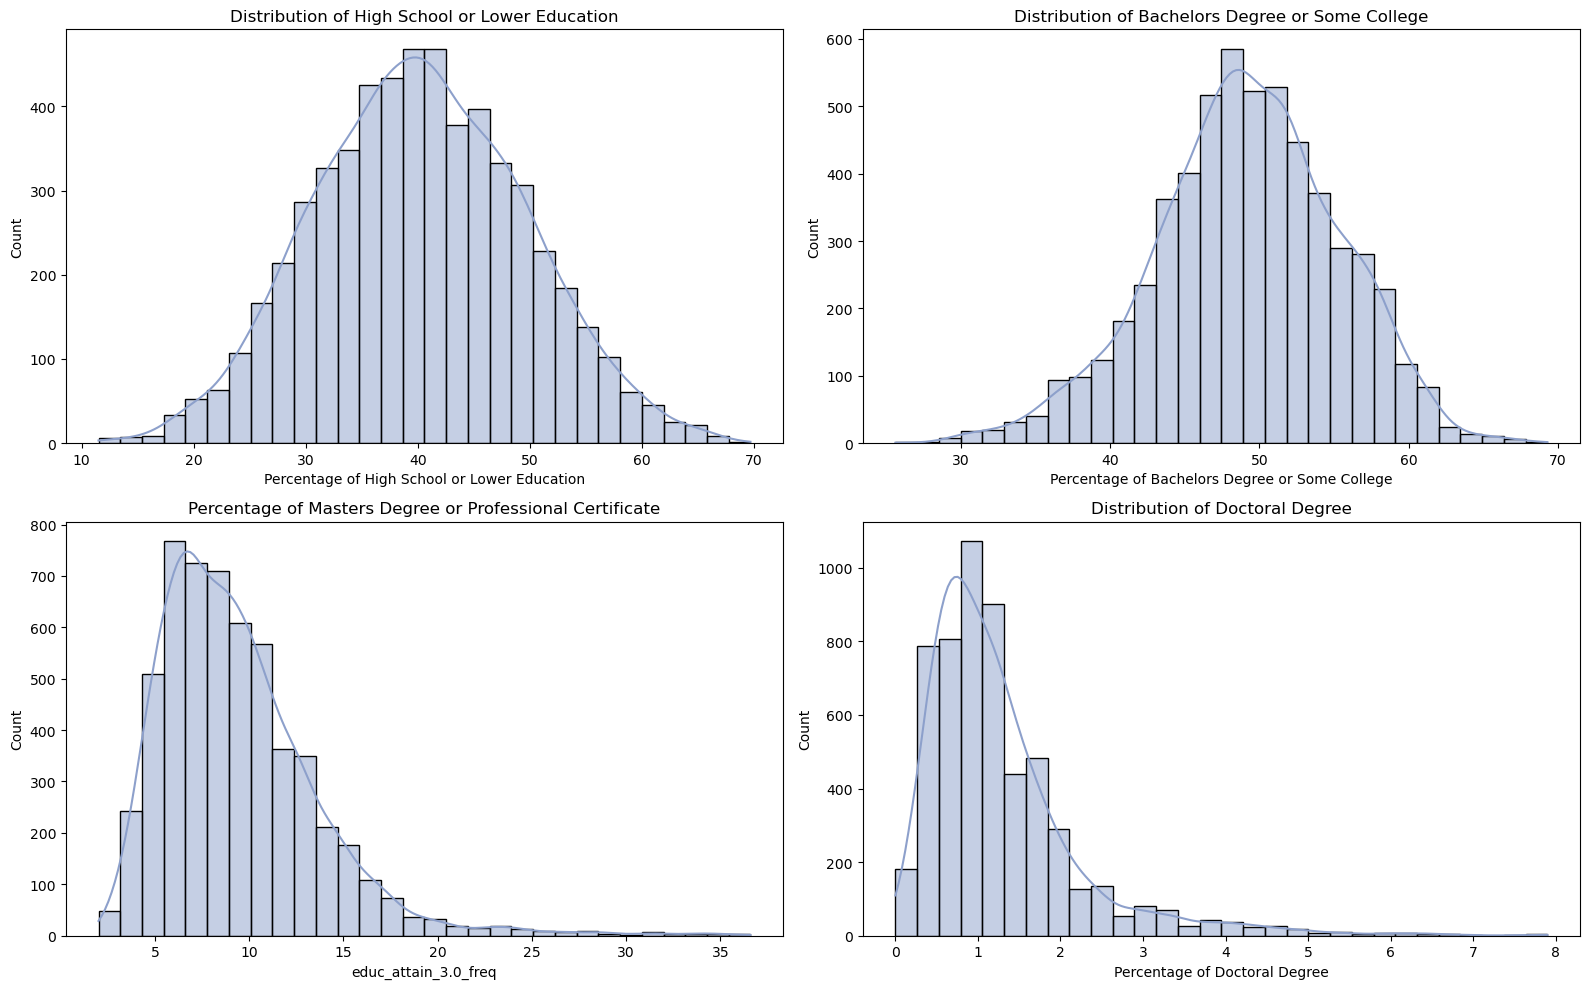

In [17]:
# distribution of Education 
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
# high school 
sns.histplot(df['educ_attain_1.0_freq'], ax=axes[0, 0], bins=30, kde=True, color=plt.cm.Set2(2))
axes[0, 0].set_title('Distribution of High School or Lower Education')
axes[0, 0].set_xlabel('Percentage of High School or Lower Education')
# bachelors 
sns.histplot(df['educ_attain_2.0_freq'], ax=axes[0, 1], bins=30, kde=True, color=plt.cm.Set2(2))
axes[0, 1].set_title('Distribution of Bachelors Degree or Some College')
axes[0, 1].set_xlabel('Percentage of Bachelors Degree or Some College')
# masters 
sns.histplot(df['educ_attain_3.0_freq'], ax=axes[1, 0], bins=30, kde=True, color=plt.cm.Set2(2))
axes[1, 0].set_title('Distribution of Masters Degree or Professional Certificate')
axes[1, 0].set_title('Percentage of Masters Degree or Professional Certificate')
# doctoral
sns.histplot(df['educ_attain_4.0_freq'], ax=axes[1, 1], bins=30, kde=True, color=plt.cm.Set2(2))
axes[1, 1].set_title('Distribution of Doctoral Degree')
axes[1, 1].set_xlabel('Percentage of Doctoral Degree')
plt.tight_layout()
plt.show()

The distribution of high school or lower education is slightly left-skewed (negatively skewed), meaning most counties have a high percentage of individuals with this education level, with fewer counties having lower proportions. The bachelor’s degree or some college education distribution is approximately symmetrical, indicating a more even spread across counties. In contrast, higher education levels (Master’s and Doctoral degrees) are right-skewed, showing that only a small number of counties have a significant proportion of highly educated individuals.

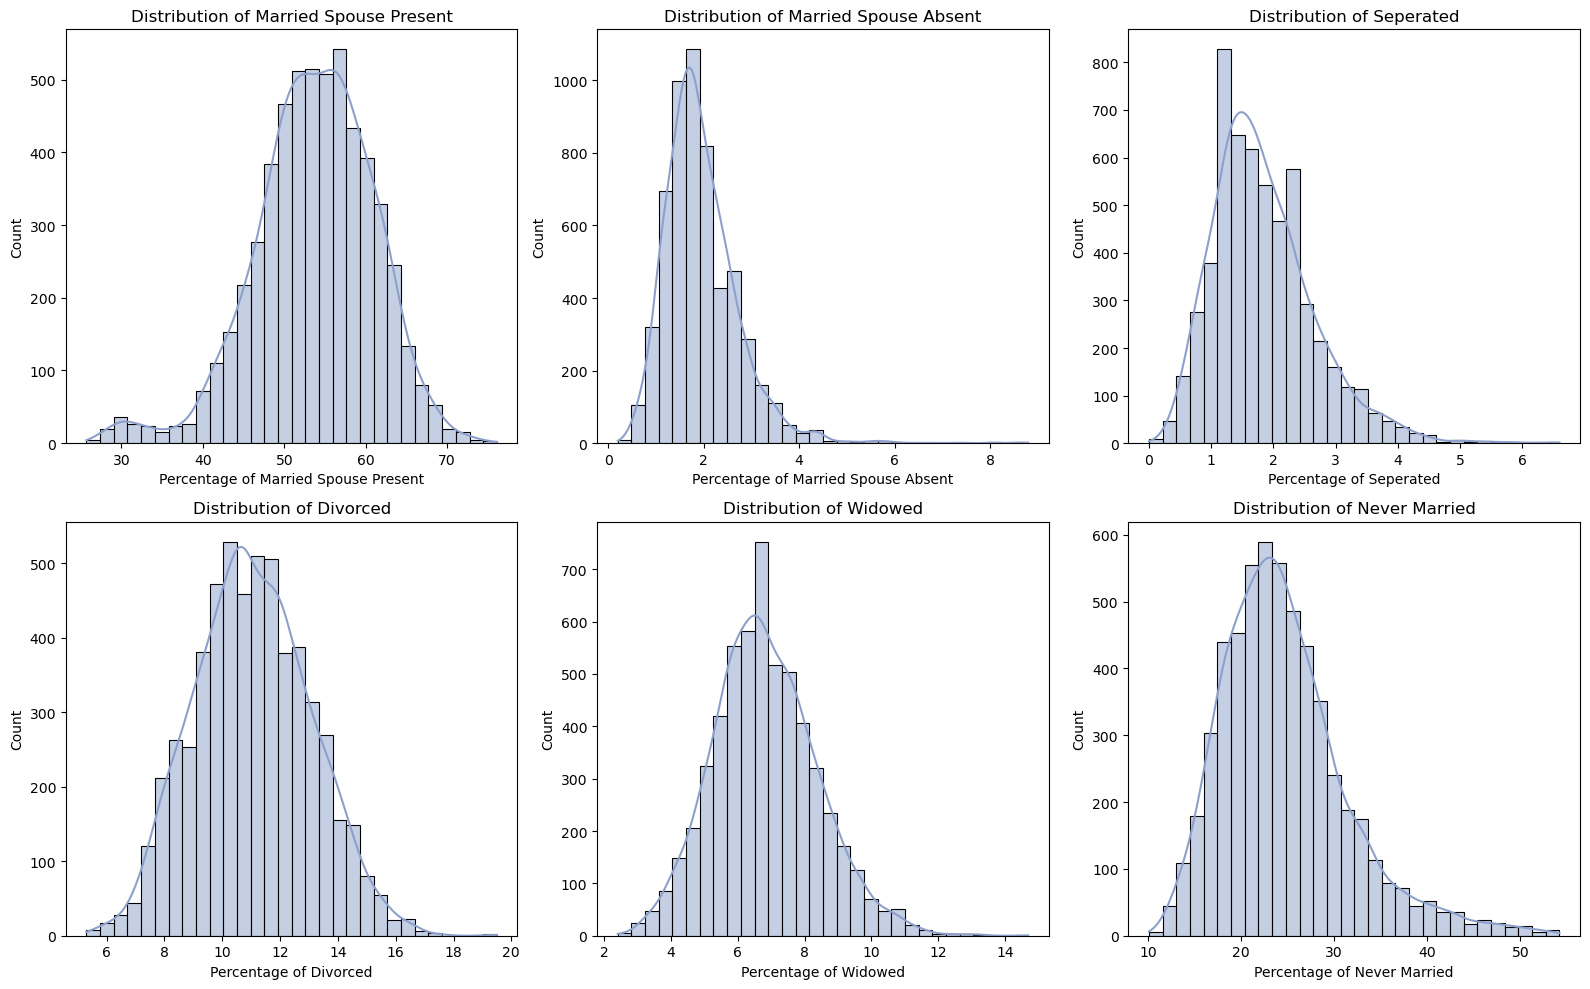

In [18]:
# distribution of marital status 
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
# married spouse present
sns.histplot(df['marst_1_freq'], ax=axes[0, 0], bins=30, kde=True, color=plt.cm.Set2(2))
axes[0, 0].set_title('Distribution of Married Spouse Present')
axes[0, 0].set_xlabel('Percentage of Married Spouse Present')
# married spouse absent
sns.histplot(df['marst_2_freq'], ax=axes[0, 1], bins=30, kde=True, color=plt.cm.Set2(2))
axes[0, 1].set_title('Distribution of Married Spouse Absent')
axes[0, 1].set_xlabel('Percentage of Married Spouse Absent')
# seperated
sns.histplot(df['marst_3_freq'], ax=axes[0, 2], bins=30, kde=True, color=plt.cm.Set2(2))
axes[0, 2].set_title('Distribution of Seperated')
axes[0, 2].set_xlabel('Percentage of Seperated')
# never married
sns.histplot(df['marst_4_freq'], ax=axes[1, 0], bins=30, kde=True, color=plt.cm.Set2(2))
axes[1, 0].set_title('Distribution of Divorced')
axes[1, 0].set_xlabel('Percentage of Divorced')
# widowed
sns.histplot(df['marst_5_freq'], ax=axes[1, 1], bins=30, kde=True, color=plt.cm.Set2(2))
axes[1, 1].set_title('Distribution of Widowed')
axes[1, 1].set_xlabel('Percentage of Widowed')
# never married
sns.histplot(df['marst_6_freq'], ax=axes[1, 2], bins=30, kde=True, color=plt.cm.Set2(2))
axes[1, 2].set_title('Distribution of Never Married')
axes[1, 2].set_xlabel('Percentage of Never Married')
plt.tight_layout()
plt.show()

The distribution plots for marital status show that "Married Spouse Present" is the most common category, with a relatively symmetrical distribution, indicating that most counties have a high proportion of married individuals living with their spouse. The "Never Married" and "Divorced" categories exhibit right-skewed distributions, suggesting that a smaller number of counties have high concentrations of individuals in these groups. Meanwhile, "Widowed" and "Separated" statuses have the lowest frequencies, with distributions concentrated toward lower values, meaning most counties have a relatively small proportion of individuals in these categories.

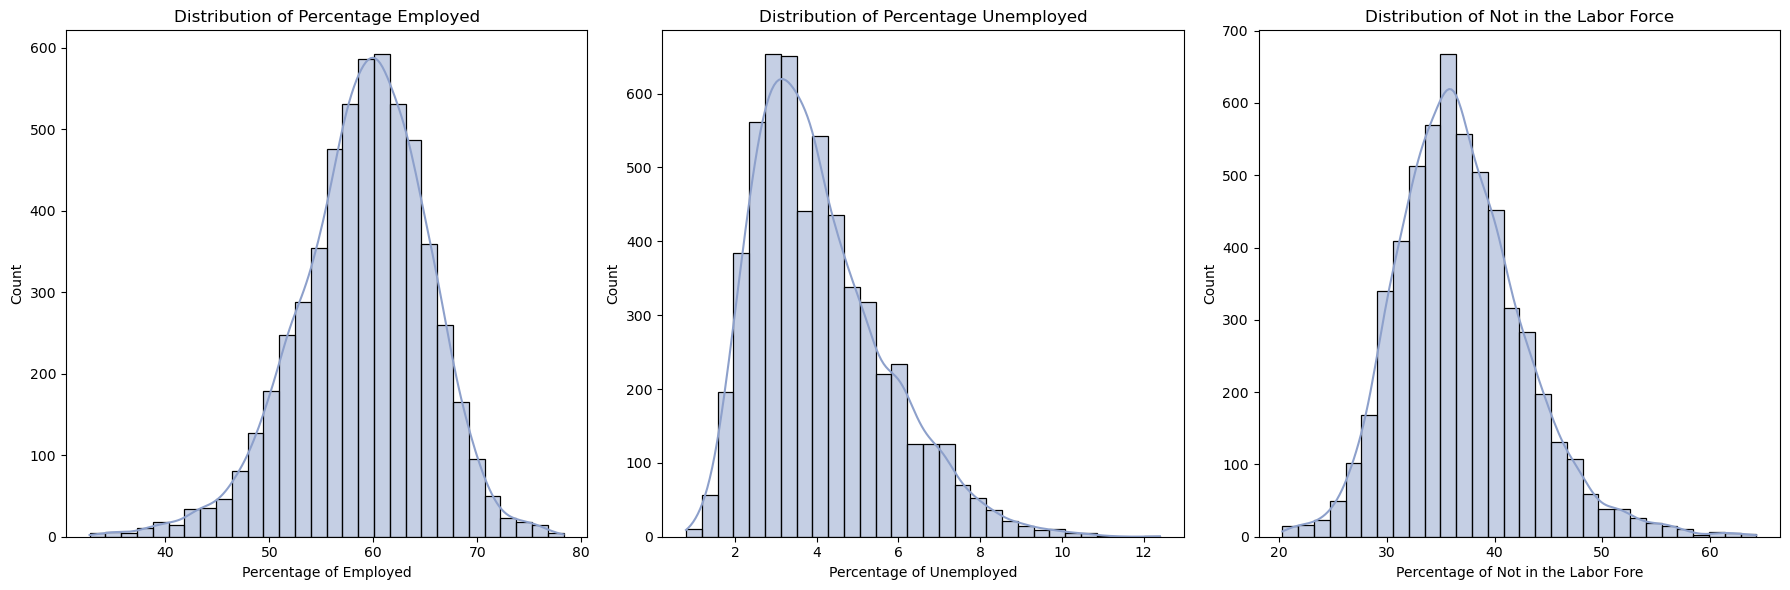

In [19]:
# distribution of employmentship variables 
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Employed
sns.histplot(df['empstat_1.0_freq'], ax=axes[0], bins=30, kde=True, color=plt.cm.Set2(2))
axes[0].set_title('Distribution of Percentage Employed')
axes[0].set_xlabel('Percentage of Employed')
# Unemployed
sns.histplot(df['empstat_2.0_freq'], ax=axes[1], bins=30, kde=True, color=plt.cm.Set2(2))
axes[1].set_title('Distribution of Percentage Unemployed')
axes[1].set_xlabel('Percentage of Unemployed')
# Not in the Labor Force
sns.histplot(df['empstat_3.0_freq'], ax=axes[2], bins=30, kde=True, color=plt.cm.Set2(2))
axes[2].set_title('Distribution of Not in the Labor Force')
axes[2].set_xlabel('Percentage of Not in the Labor Fore')
plt.tight_layout()
plt.show()

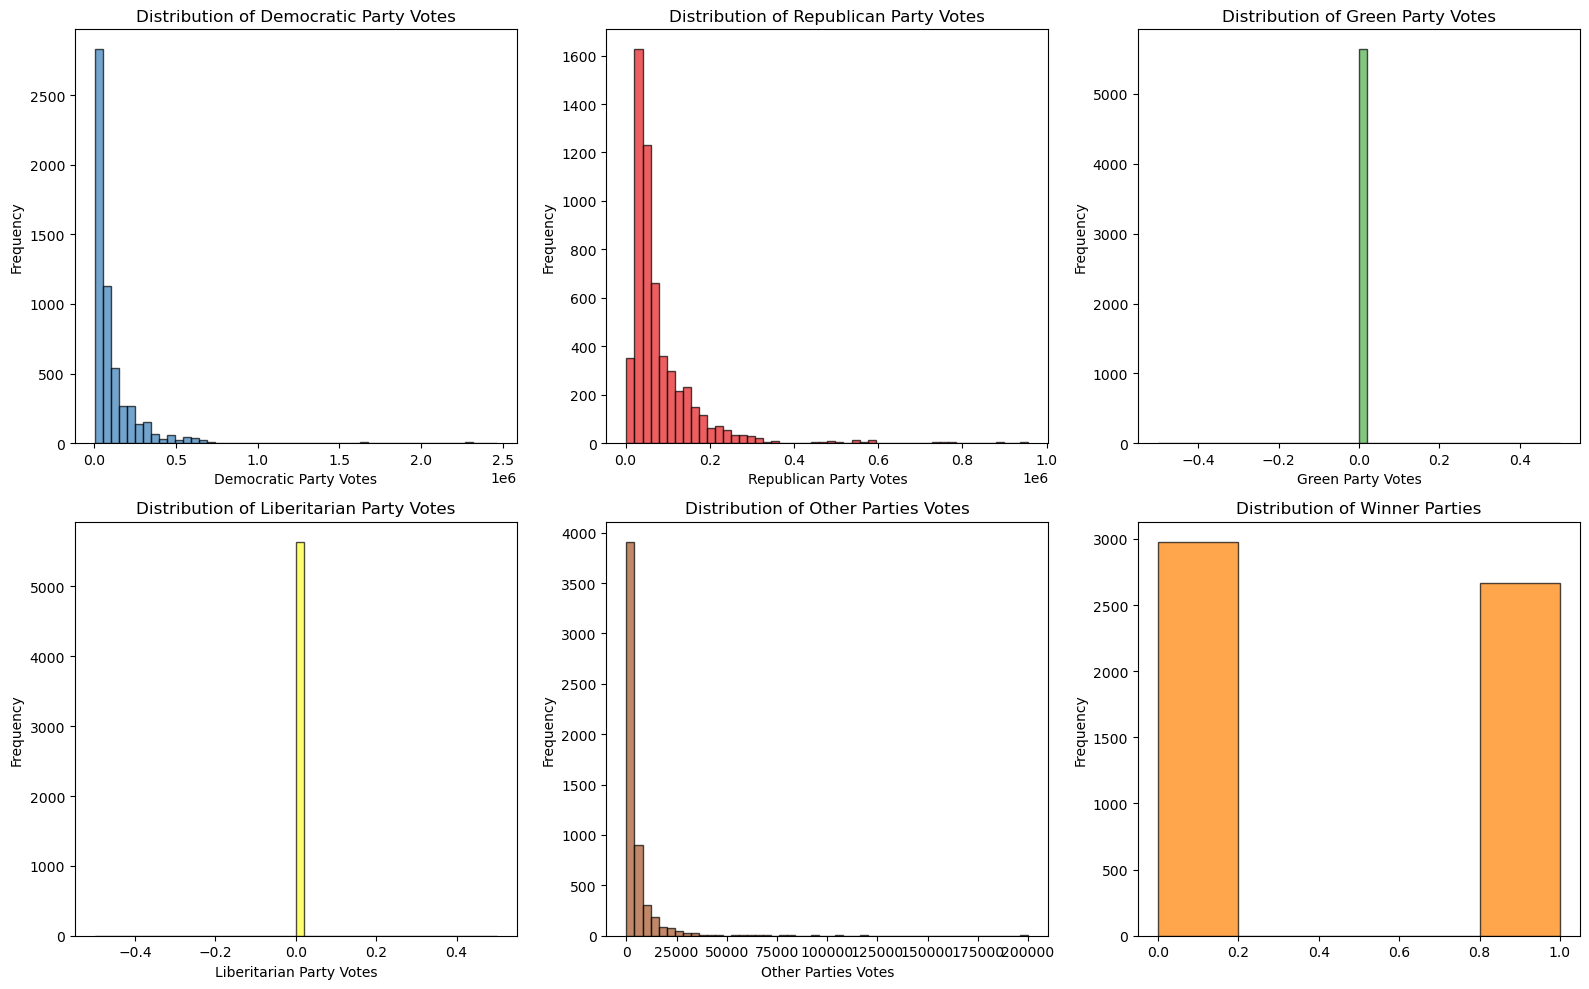

In [20]:
# plotting the election results distribution

fig, axes = plt.subplots(2, 3, figsize =(16, 10))
# distribution of democratic party
axes[0, 0].hist(df['democrat'], bins=50, color=plt.cm.Set1(1), alpha=0.7, edgecolor='black')
axes[0, 0].set_xlabel('Democratic Party Votes')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Distribution of Democratic Party Votes')
# republican party
axes[0, 1].hist(df['republican'], bins=50, color=plt.cm.Set1(0), alpha=0.7, edgecolor='black')
axes[0, 1].set_xlabel('Republican Party Votes')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Distribution of Republican Party Votes')
# green party 
axes[0, 2].hist(df['green'], bins=50, color=plt.cm.Set1(2), alpha=0.7, edgecolor='black')
axes[0, 2].set_xlabel('Green Party Votes')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].set_title('Distribution of Green Party Votes')
# liberitarian party
axes[1, 0].hist(df['liberitarian'], bins=50, color=plt.cm.Set1(5), alpha=0.7, edgecolor='black')
axes[1, 0].set_xlabel('Liberitarian Party Votes')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Distribution of Liberitarian Party Votes')
# other parties 
axes[1, 1].hist(df['other'], bins=50, color=plt.cm.Set1(6), alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Other Parties Votes')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Distribution of Other Parties Votes')
# winner 
axes[1, 2].hist(df['winner'], bins=5, color=plt.cm.Set1(4), alpha=0.7, edgecolor='black')
axes[1, 2].set_xlabel('')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].set_title('Distribution of Winner Parties')
plt.tight_layout()
plt.show()

#### Election Results Distribution Analysis 
1. Democrat Votes Distribution
    - The distribution is right-skewed, meaning most counties have relatively low Democratic vote counts
2. Republican Votes Distribution 
    - Similar right-skewed pattern as Democratic Votes 
3. Winner Distribution 
    - The Democratic party has more winners than Republican party

#### 2.3. Geographical and regional voting patterns

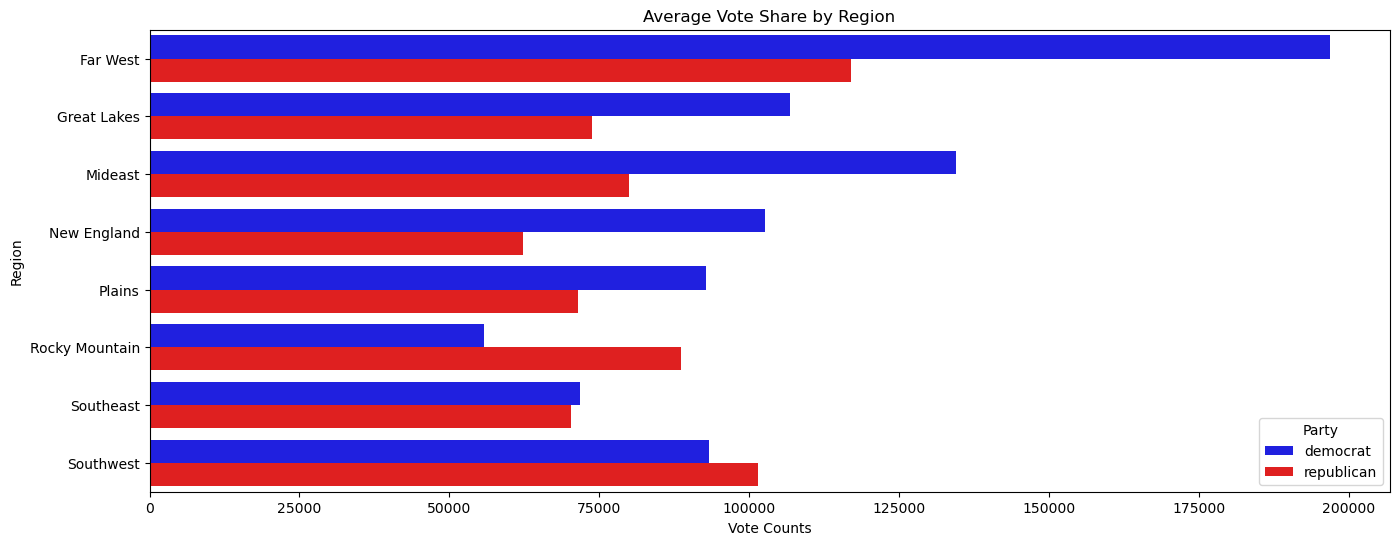

In [21]:
# Average vote share by region (democrats vs republicans)

plt.figure(figsize=(16, 6))
df_region_melted = df_region.melt(id_vars=["Region"], value_vars=["democrat", "republican"], 
                                   var_name="Party", value_name="Vote Counts")

sns.barplot(data=df_region_melted, x="Vote Counts", y="Region", hue="Party", palette={"democrat": "blue", "republican": "red"})
plt.xlabel('Vote Counts')
plt.title('Average Vote Share by Region')
plt.show()

In [22]:
# visualizing the election results by dominant party per county
election_df = df.copy() 
election_df['county_fips'] = election_df['county_fips'].astype(str).str.zfill(5)
election_df["dominant_party"] = election_df[["democrat", "republican"]].idxmax(axis=1)
# Map party names to colors
party_colors = {"democrat": "blue", "republican": "red"}
# creating the choropleth map
fig = px.choropleth(
    election_df,
    geojson="https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json",
    locations="county_fips",
    color="dominant_party",
    color_discrete_map=party_colors,
    scope="usa",
    title="U.S. County-Level Election Results by Dominant Party",
    labels={"dominant_party": "Dominant Party"}
)
fig.show()


In [23]:
# counting the number of counties won by each party
county_wins = df['winner'].value_counts() 
print(f'The number of Counties Democrat Party won: {county_wins[0]}')
print(f'The number of counties Republican Party won: {county_wins[1]}')

The number of Counties Democrat Party won: 2980
The number of counties Republican Party won: 2663


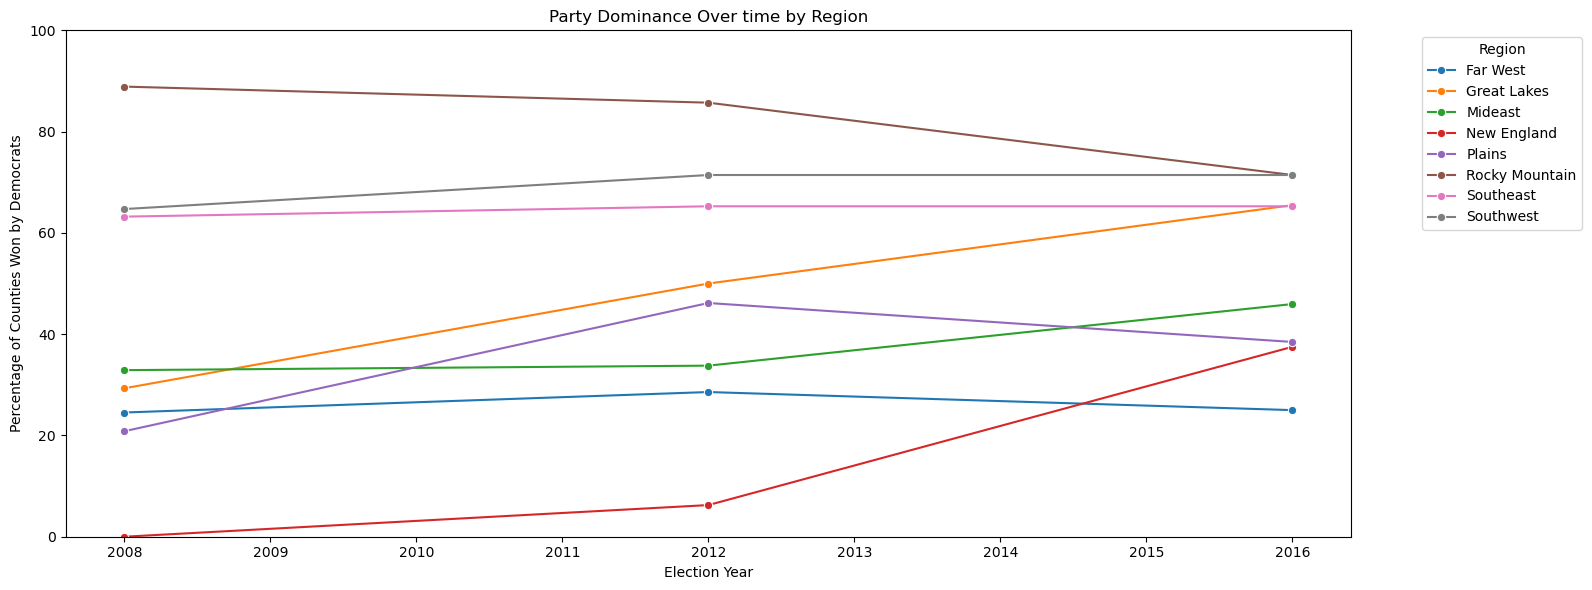

In [24]:
# party dominance over time by region

regional_party_trends = df_elections_years.groupby(['Region', 'year'])['winner'].mean().reset_index() # to calculate the percentage of counties won by each party by grouping region and year
# converting winner variable to percentage of democratic wins 
regional_party_trends['democrat_win_perc'] = regional_party_trends['winner'] * 100 

plt.figure(figsize=(16, 6))
sns.lineplot(data=regional_party_trends, x='year', y='democrat_win_perc', hue='Region', marker='o')
plt.xlabel('Election Year')
plt.ylabel('Percentage of Counties Won by Democrats')
plt.title('Party Dominance Over time by Region')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Key Insights: 
- Rocky Mountain, Southeast and Southwest consistently have the highest percentage of counties won by Democrats, which is above 60%, with slight variations. 
- Mideast, Great Lakes, Far West, Plains consistently have a low percentage of Democrat won counties (below 40%). This regions remained republican strongholds over the three election cycles, with variations depending on the region. 
- Great Lakes region has a large variation it has around 30% counties won by democrats in 2008 but they have over 60% in 2016. 
- New England has 0 counties won by democrats in 2008 and now it has close to 40% in 2018. However, it's important to note that the data of 2008 for New England can be data accuracy issue or missing democratic data. (note: all the missing values have taken care of in the data preparation stage)


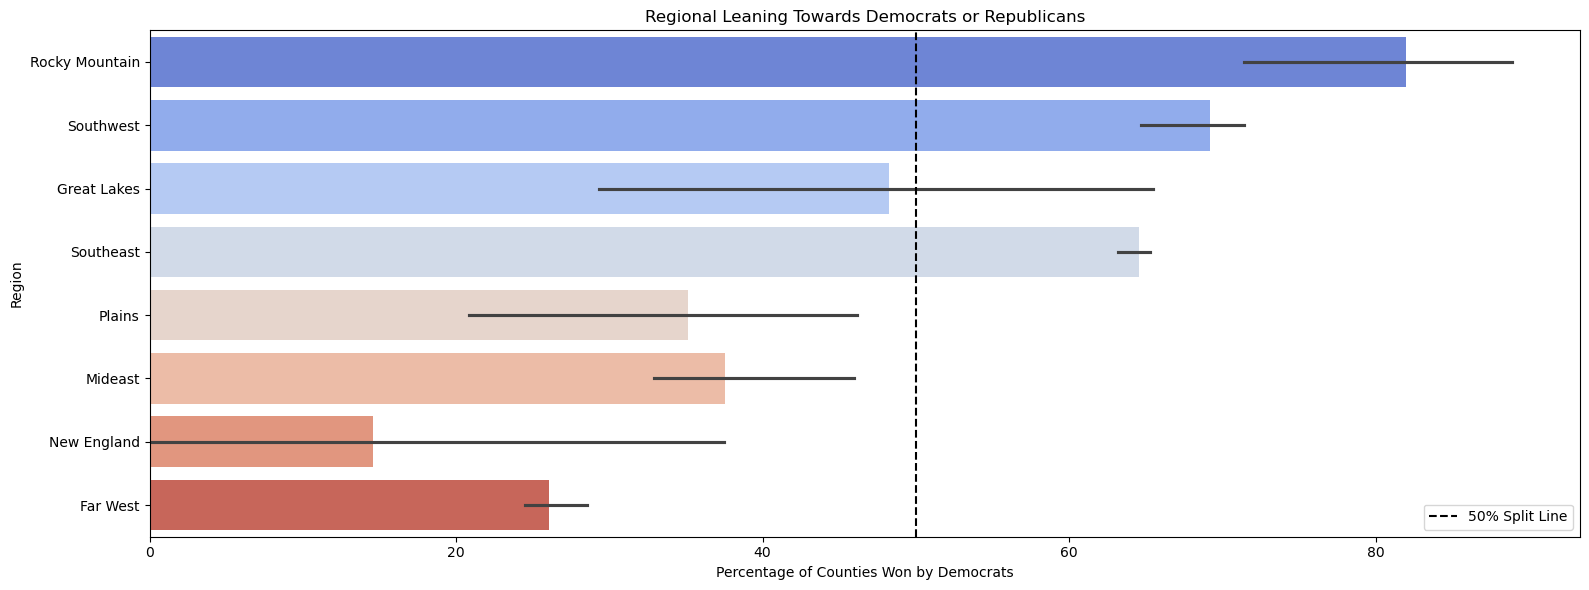

In [25]:
# Does any regions more likely to lean towards one party?

# sorting regions by democrat win percentage 
region_party_affiliation = regional_party_trends.sort_values(by='democrat_win_perc', ascending=False)
# plotting the regional party lean
plt.figure(figsize=(16, 6))
sns.barplot(data=region_party_affiliation, x='democrat_win_perc', y='Region', hue='Region', palette='coolwarm', legend=False)
plt.xlabel("Percentage of Counties Won by Democrats")
plt.ylabel("Region")
plt.title("Regional Leaning Towards Democrats or Republicans")
plt.axvline(x=50, color='black', linestyle='--', label="50% Split Line")
plt.tight_layout()
plt.legend()
plt.show()

From the visualization, we can see that Rocky Mountain, Southwest, and Southeast heavily lean into Democrat party. In contrast, New England and Far West heavily lean into Republican party while Plains, Mideast and Great Lakes hovers around 50%, which indicates that these regions are politically competitive where both parties have a chance. 

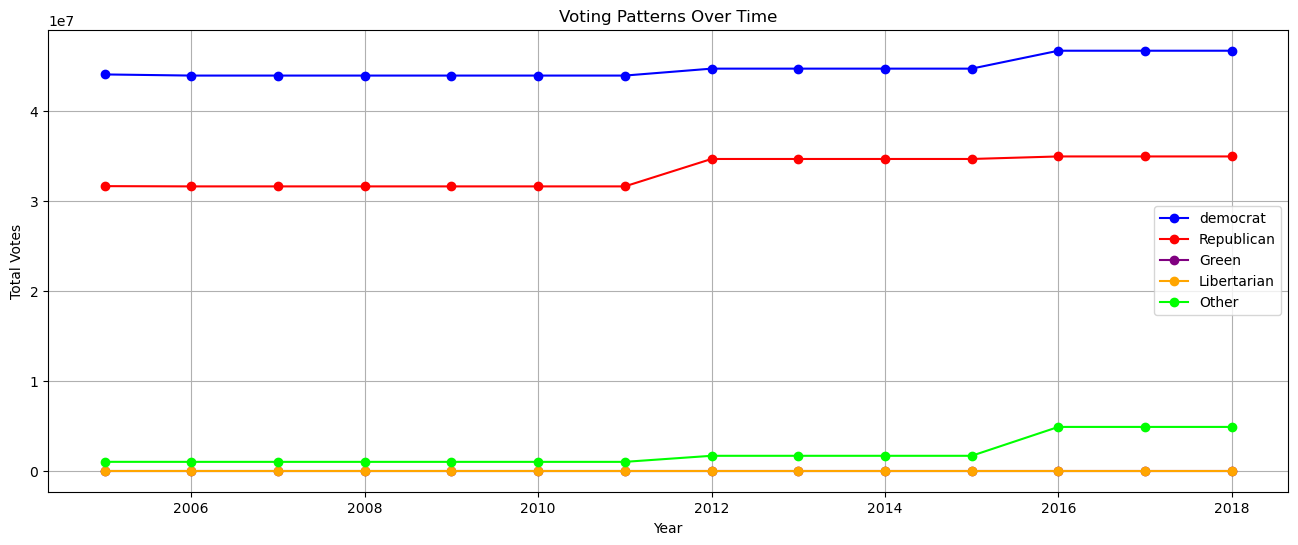

In [26]:
# 3. Trends over time (time analysis)
# plotting the election voting trends over time 
vote_trends = df.groupby('year')[['democrat', 'republican', 'liberitarian', 'green', 'other']].sum() # grouping by year and summing votes for each party 
# plotting the trends over time 
plt.figure(figsize=(16, 6))
plt.plot(vote_trends.index, vote_trends['democrat'], label='democrat', color='blue', marker='o')
plt.plot(vote_trends.index, vote_trends['republican'], label='Republican', color='red', marker='o')
plt.plot(vote_trends.index, vote_trends['green'], label='Green', color='purple', marker='o')
plt.plot(vote_trends.index, vote_trends['liberitarian'], label='Libertarian', color='orange', marker='o')
plt.plot(vote_trends.index, vote_trends['other'], label='Other', color='lime', marker='o')
plt.xlabel('Year')
plt.ylabel('Total Votes')
plt.title('Voting Patterns Over Time')
plt.legend()
plt.grid(True)
plt.show()

Key observations from the plot: 
- Democrat vs republican plot: The major two partie shave fluctuating vote totals, indicating competitive elections. 
- Green, Liberitarian, and other parties have consistently lower vote totals but show some variation in time. 

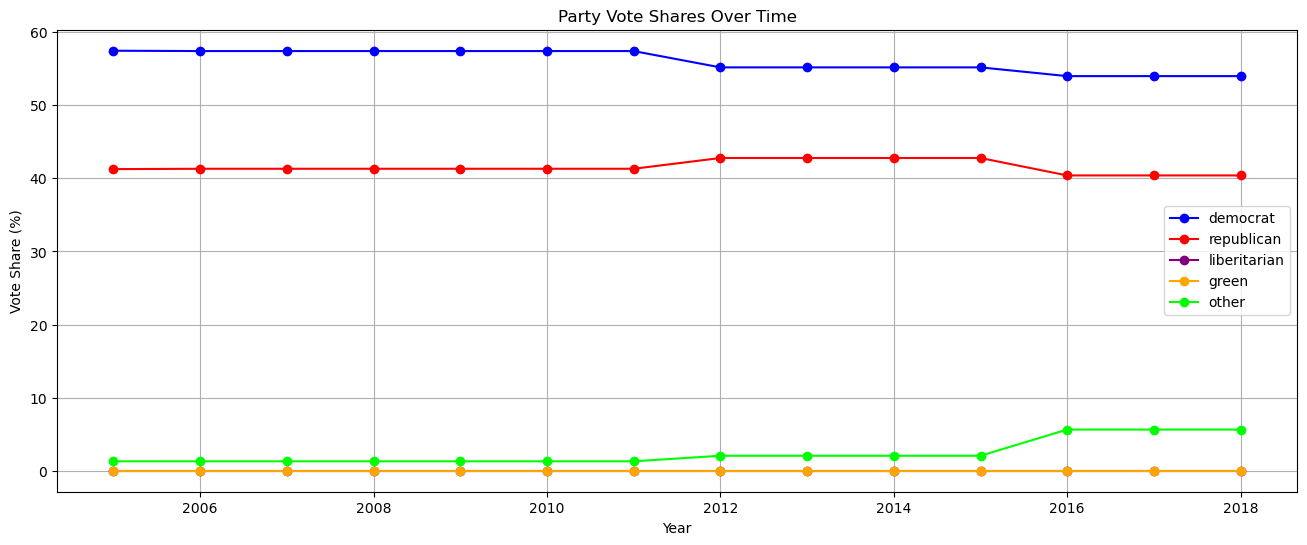

In [27]:
# changes in party shares over time
vote_share_trends = vote_trends.div(vote_trends.sum(axis=1), axis=0) * 100

plt.figure(figsize=(16, 6))
for party, color in zip(vote_share_trends.columns, ['blue', 'red', 'purple', 'orange', 'lime']):
    plt.plot(vote_share_trends.index, vote_share_trends[party], label=party, color=color, marker='o')

plt.xlabel('Year')
plt.ylabel('Vote Share (%)')
plt.title('Party Vote Shares Over Time')
plt.legend()
plt.grid(True)
plt.show()

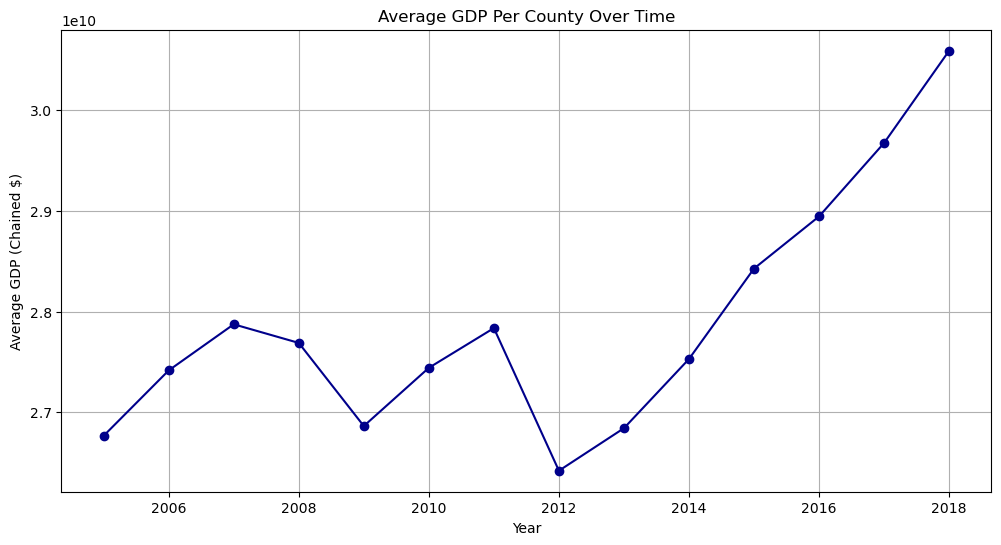

In [28]:
# GDP over time 
gdp_trends = df.groupby('year')['GDP (Chained $)'].mean()

plt.figure(figsize=(12, 6))
plt.plot(gdp_trends.index, gdp_trends.values, marker='o', linestyle='-', color='darkblue')
plt.xlabel('Year')
plt.ylabel('Average GDP (Chained $)')
plt.title('Average GDP Per County Over Time')
plt.grid(True)
plt.show()

## 3. Correlation Analysis

In this section, we conducted a correlation analysis to explore the relationship between key socioeconomic factors and voting patterns at the U.S. county level. We aim to identify how various economic, demographic, and social variables influence support for different political parties. Specifically, we examined how factors, such as GDP, income levels, racial composition, education attainment, family situation, and employment status correlate with Democratic and Republican vote shares. In our dataset, we have variables, such as educational attainment, that are expressed in percentage; therefore, we decide to focus on percentage-based variables rather than raw vote counts to ensure accuracy. For instance, rather than correlating total votes for a party, we used vote shares- the percentage of total vote sin a country that went to a particular party. This approach allows for a more meaningful comparison across counties with different population sizes. 
- Correlation Analysis
    - Linear Relationship: Pearson Correlation Coefficient 
    - Monotonic Relationship: Spearman Correlation Coefficient 
- Election Prediction Insights

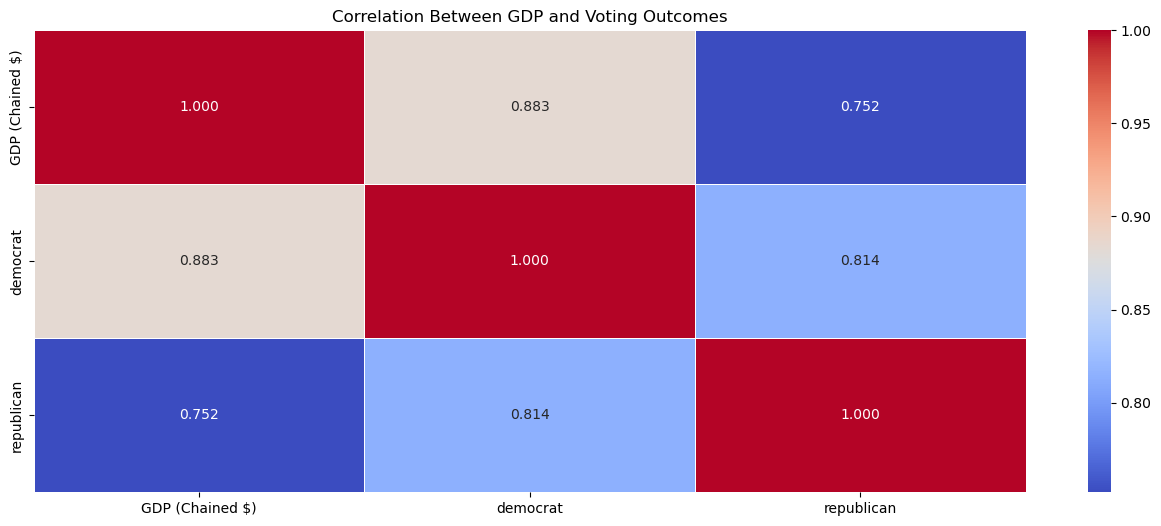

In [29]:
# 1. Correlation Analysis: GDP vs Votes 
gdp_correlation_vars = ['GDP (Chained $)', 'democrat', 'republican']
gdp_correlation_df = df[gdp_correlation_vars].select_dtypes(include=['number'])
# computing the correlation matrix
gdp_correlation_matrix = gdp_correlation_df.corr()

# plotting the heatmap for GDP vs. voting correlation
plt.figure(figsize=(16, 6))
sns.heatmap(gdp_correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Correlation Between GDP and Voting Outcomes")
plt.show()

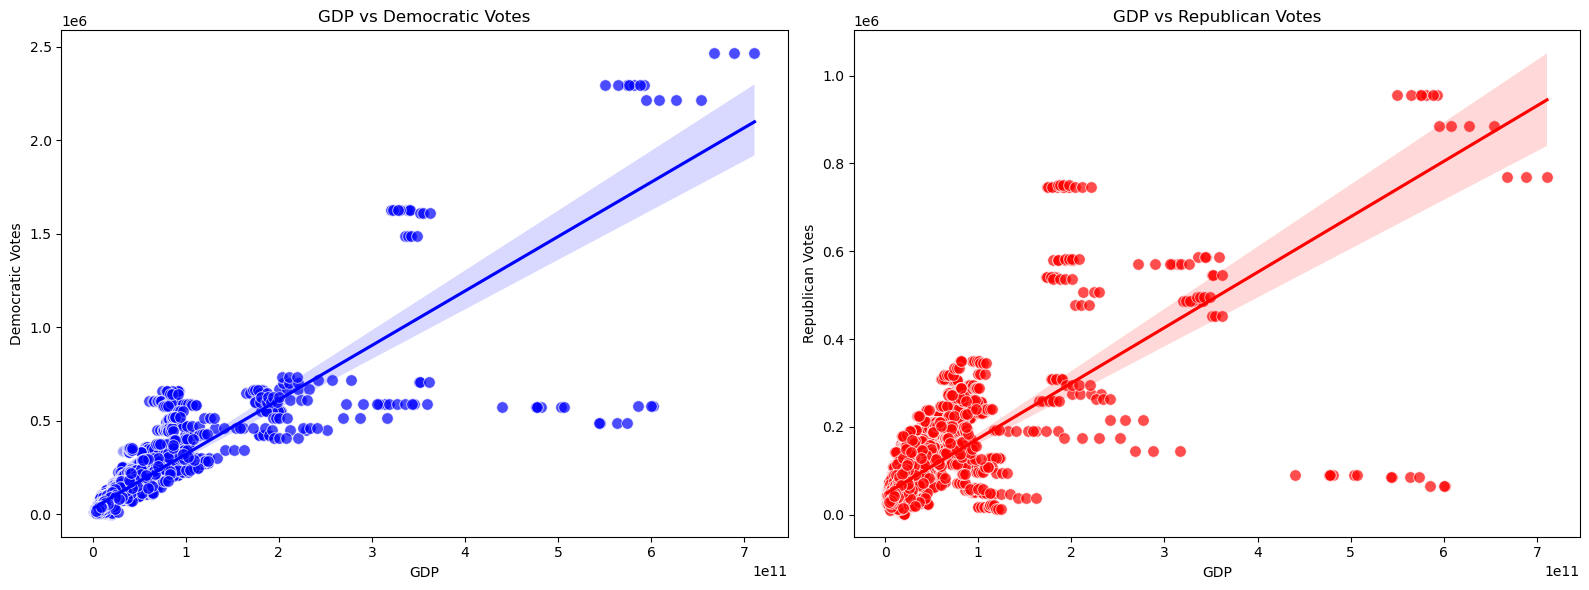

In [30]:
# visualizing the relationship between GDP and democratic and republican votes 

plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['GDP (Chained $)'], y=df['democrat'], alpha=0.7, s=70, color='blue')
sns.regplot(x=df['GDP (Chained $)'], y=df['democrat'], scatter=False, color='blue')
plt.xlabel('GDP')
plt.ylabel('Democratic Votes')
plt.title('GDP vs Democratic Votes')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['GDP (Chained $)'], y=df['republican'], alpha=0.7, s=70, color='red')
sns.regplot(x=df['GDP (Chained $)'], y=df['republican'], scatter=False, color='red')
plt.xlabel('GDP')
plt.ylabel('Republican Votes')
plt.title('GDP vs Republican Votes')

plt.tight_layout()
plt.show()

In [31]:
# Does GDP correlate with Democratic Party and Republican Party Votes? 

gdp_democrat_r, gdp_democrat_p = stats.pearsonr(df['GDP (Chained $)'], df['democrat']) # calculating the pearson correlation coefficient to test the linear relationship
gdp_democrat_p_str = f'p={gdp_democrat_p:.3f}' if gdp_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of GDP vs Democratic Party: {gdp_democrat_r}, {gdp_democrat_p_str}')
gdp_democrat_rho, gdp_democrat_p2 = stats.spearmanr(df['GDP (Chained $)'], df['democrat']) # calculating the spearman correlation coefficient to test the monotonic relationship
gdp_democrat_p2_str = f'p={gdp_democrat_p2:.3f}' if gdp_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of GDP vs Democratic Party: {gdp_democrat_rho}, {gdp_democrat_p2_str}')
gdp_republican_r, gdp_republican_p = stats.pearsonr(df['GDP (Chained $)'], df['republican'])
gdp_republican_p_str = f'p={gdp_republican_p:.3f}' if gdp_republican_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of GDP vs Republican Party: {gdp_republican_r}, {gdp_republican_p_str}')
gdp_republican_rho, gdp_republican_p2 = stats.spearmanr(df['GDP (Chained $)'], df['republican'])
gdp_republican_p2_str = f'p={gdp_republican_p2:.3f}' if gdp_republican_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of GDP vs Republic Party: {gdp_republican_rho}, {gdp_republican_p2_str}')

The Pearson Correlation Coefficient of GDP vs Democratic Party: 0.8828346536706317, p < 0.001
The Spearman Correlation Coefficient of GDP vs Democratic Party: 0.895674892433382, p < 0.001
The Pearson Correlation Coefficient of GDP vs Republican Party: 0.7518185482813391, p < 0.001
The Spearman Correlation Coefficient of GDP vs Republic Party: 0.7460783192560462, p < 0.001


The correlation analysis between GDP and voting outcome reveals a strong positive linear relationship between the GDP and both Democratic and Republican parties. The pearson correlation coefficient for GDP and Democratic votes is 0.883, with a p-value less than 0.001, indicating a strong linear relationship while the spearman correlation coefficient is 0.896, with a p-value less than 0.001, suggesting a strong monotonic association as well. Similarly, GDP and Republican votes show a positive Pearson correlation of 0.75, with a p-value less than 0.001, and a Spearman correlation of 0.75, with also a p-value less than 0.001, implying that higher GDP counties tend to have higher vote counts for both major parties. However, the correlation is notably stronger for the Democratic Party, suggesting that counties with higher GDP may lean more toward Democratic support. In addition, it's important to note that for all of the correlation analysis, the p-value is less than 0.001, indicating it's statistical significance. These findings indicate that economic factors, particularly GDP, play a significant role in shaping election outcomes at the county level.

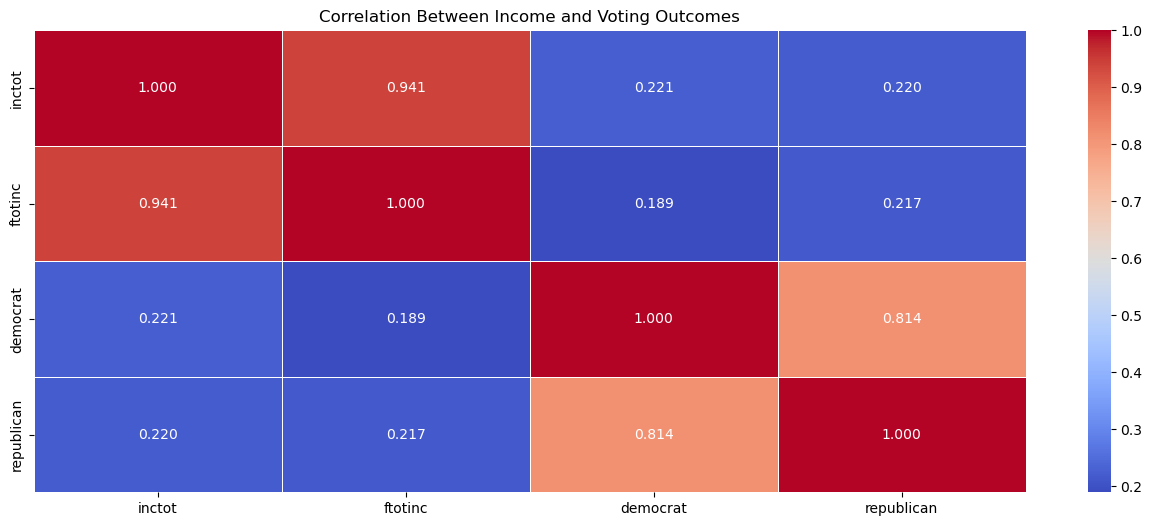

In [32]:
# 2. Does Individual Income and Family Income correlate with voting? 
income_corr_vars = ['inctot', 'ftotinc', 'democrat', 'republican']
income_corr_df = df[income_corr_vars].select_dtypes(include=['number'])
income_corr_matrix = income_corr_df.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(income_corr_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Correlation Between Income and Voting Outcomes")
plt.show()

Text(0.5, 1.0, 'Family Income vs Republican Votes')

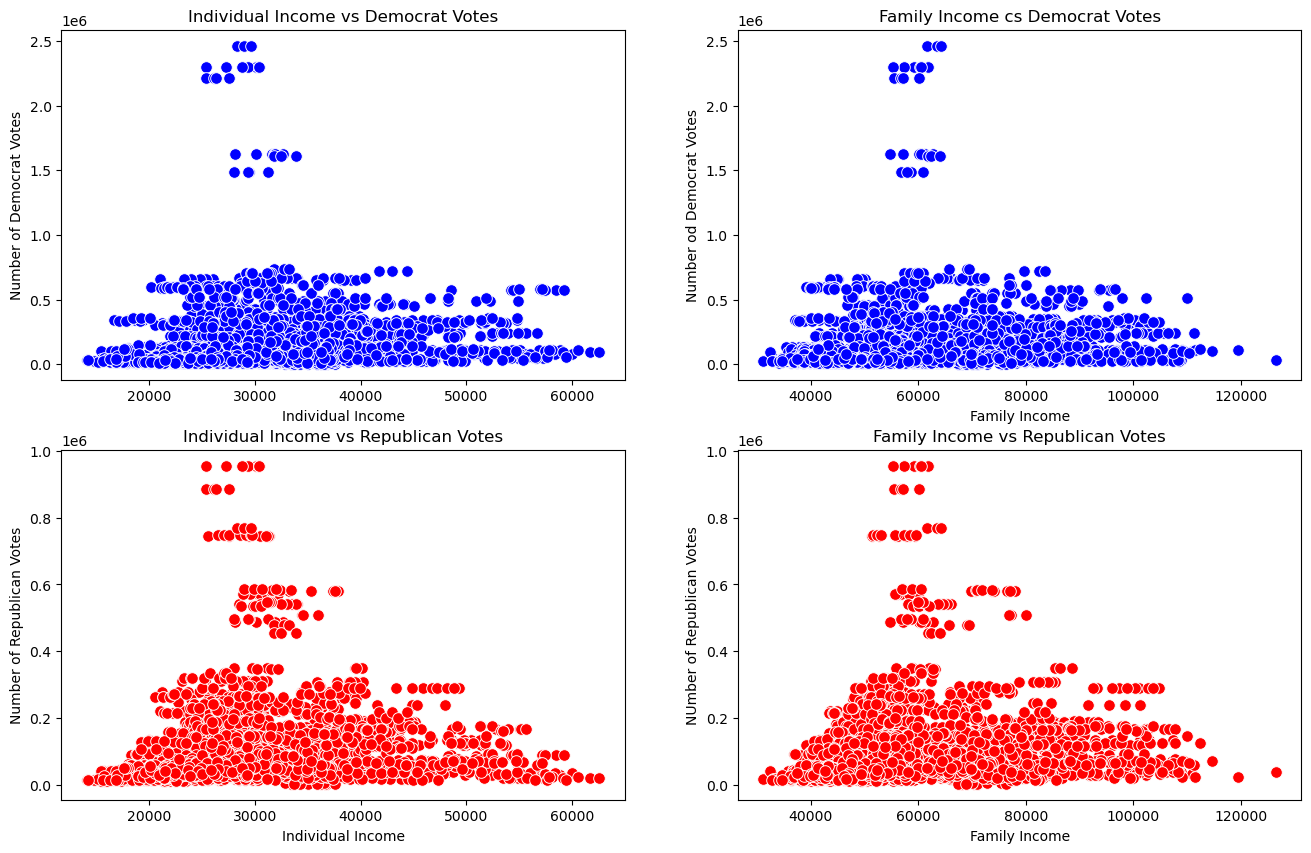

In [33]:
# visualizing the relationship between individual income, family income, democrat votes, and republican votes 
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
# individual income vs democrat
sns.scatterplot(ax=axes[0, 0], x=df['inctot'], y=df['democrat'], s=70, color='blue')
axes[0, 0].set_xlabel('Individual Income')
axes[0, 0].set_ylabel('Number of Democrat Votes')
axes[0, 0].set_title('Individual Income vs Democrat Votes')
# family income vs democrat
sns.scatterplot(ax=axes[0, 1], x=df['ftotinc'], y=df['democrat'], s=70, color='blue')
axes[0, 1].set_xlabel('Family Income')
axes[0, 1].set_ylabel('Number od Democrat Votes')
axes[0, 1].set_title('Family Income cs Democrat Votes')
# individual income vs republican
sns.scatterplot(ax=axes[1, 0], x=df['inctot'], y=df['republican'], s=70, color='red')
axes[1, 0].set_xlabel('Individual Income')
axes[1, 0].set_ylabel('Number of Republican Votes')
axes[1, 0].set_title('Individual Income vs Republican Votes')
# family income vs republican
sns.scatterplot(ax=axes[1, 1], x=df['ftotinc'], y=df['republican'], s=70, color='red')
axes[1, 1].set_xlabel('Family Income')
axes[1, 1].set_ylabel('NUmber of Republican Votes')
axes[1, 1].set_title('Family Income vs Republican Votes')

In [34]:
# calculating the correlation using pearson and spearman correlation coefficient 
# individual income vs democrat
indinc_democrat_r, indinc_democrat_p = stats.pearsonr(df['inctot'], df['democrat'])
indinc_democrat_p_str = f'p={indinc_democrat_p}' if indinc_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Individual Income vs Democrat Votes: {indinc_democrat_r}, {indinc_democrat_p_str}')
indinc_democrat_rho, indinc_democrat_p2 = stats.spearmanr(df['inctot'], df['democrat'])
indinc_democrat_p2_str = f'p={indinc_democrat_p2}' if indinc_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Individual Income vs Democrat Votes: {indinc_democrat_rho}, {indinc_democrat_p2_str}')
# family income vs democrat
faminc_democrat_r, faminc_democrat_p = stats.pearsonr(df['ftotinc'], df['democrat'])
faminc_democrat_p_str = f'p={faminc_democrat_p:.3f}' if faminc_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Family Income vs Democrat votes: {faminc_democrat_r}, {faminc_democrat_p_str}')
faminc_democrat_rho, faminc_democrat_p2 = stats.spearmanr(df['ftotinc'], df['democrat'])
faminc_democrat_p2_str = f'p={faminc_democrat_p2:.3f}' if faminc_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Family Income vs Democrat Votes: {faminc_democrat_rho}, {faminc_democrat_p2_str}')

The Pearson Correlation Coefficient of Individual Income vs Democrat Votes: 0.22132621257335647, p < 0.001
The Spearman Correlation Coefficient of Individual Income vs Democrat Votes: 0.4357448158621129, p < 0.001
The Pearson Correlation Coefficient of Family Income vs Democrat votes: 0.18909991720494257, p < 0.001
The Spearman Correlation Coefficient of Family Income vs Democrat Votes: 0.3663712473694131, p < 0.001


In [35]:
# individual income vs republican 
indinc_repub_r, indinc_repub_p = stats.pearsonr(df['inctot'], df['republican'])
indinc_repub_p_str = f'p={indinc_repub_p:.3f}' if indinc_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Individual Income vs Republican Votes: {indinc_repub_r}, {indinc_repub_p_str}')
indinc_repub_rho, indinc_repub_p2 = stats.spearmanr(df['inctot'], df['republican'])
indinc_repub_p2_str = f'p={indinc_repub_p2:.3f}' if indinc_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Individual Income vs Republican Votes: {indinc_repub_rho}, {indinc_repub_p2_str}')
# family income vs republican
faminc_repub_r, faminc_repub_p = stats.pearsonr(df['ftotinc'], df['republican'])
faminc_repub_p_str = f'p={faminc_repub_p:.3f}' if faminc_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Family Income vs Republican Votes: {faminc_repub_r}, {faminc_repub_p_str}')
faminc_repub_rho, faminc_repub_p2 = stats.spearmanr(df['ftotinc'], df['republican'])
faminc_repub_p2_str = f'p={faminc_repub_p2:.3f}' if faminc_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Family Income vs Republican Votes: {faminc_repub_rho}, {faminc_repub_p2_str}')

The Pearson Correlation Coefficient of Individual Income vs Republican Votes: 0.21981518563568883, p < 0.001
The Spearman Correlation Coefficient of Individual Income vs Republican Votes: 0.44526447761895577, p < 0.001
The Pearson Correlation Coefficient of Family Income vs Republican Votes: 0.216795959345858, p < 0.001
The Spearman Correlation Coefficient of Family Income vs Republican Votes: 0.4241402806976115, p < 0.001


The correlation analysis indicates statistically significant relationships between income levels and voting preferences for both major parties. Individual and family income are positively correlated with votes for both Democratic and Republican candidates, with stronger associations observed in the Spearman coefficients, suggesting non-linear relationships. While Democratic votes show a weaker correlation with income (Pearson: 0.22 for individual, 0.19 for family) compared to Republican votes (Pearson: 0.22 for individual, 0.22 for family), the Spearman results (0.44-0.45 for Republican, 0.37-0.44 for Democrat) highlight that income-based voting patterns may be more complex, influenced by local economic and demographic factors. All correlations are statistically significant (p < 0.001), reinforcing the role of income in shaping electoral outcomes.

In [36]:
# 3. Does Race correlate with voting shares? 

df['total_votes'] = df[['democrat', 'republican', 'green', 'liberitarian', 'other']].sum(axis=1)
df['total_votes'].replace(0, pd.NA, inplace=True)
# computing the percentage share for each party 
df['democrat_share'] = (df['democrat'] / df['total_votes']) * 100         # Since the race variables are expressed as percentage and voting variables are raw vote counts, the correlation 
df['republican_share'] = (df['republican'] / df['total_votes']) * 100     # analysis might be influenced by the population size. Instead of using the raw counts, we will use the percentage 
df['green_share'] = (df['green'] / df['total_votes']) * 100               # of total votes to avoid the analysis driven by large population size --> Race (percentage) vs Voting (percentage)
df['liberitarian_share'] = (df['liberitarian'] / df['total_votes']) * 100
df['other_share'] = (df['other'] / df['total_votes']) * 100


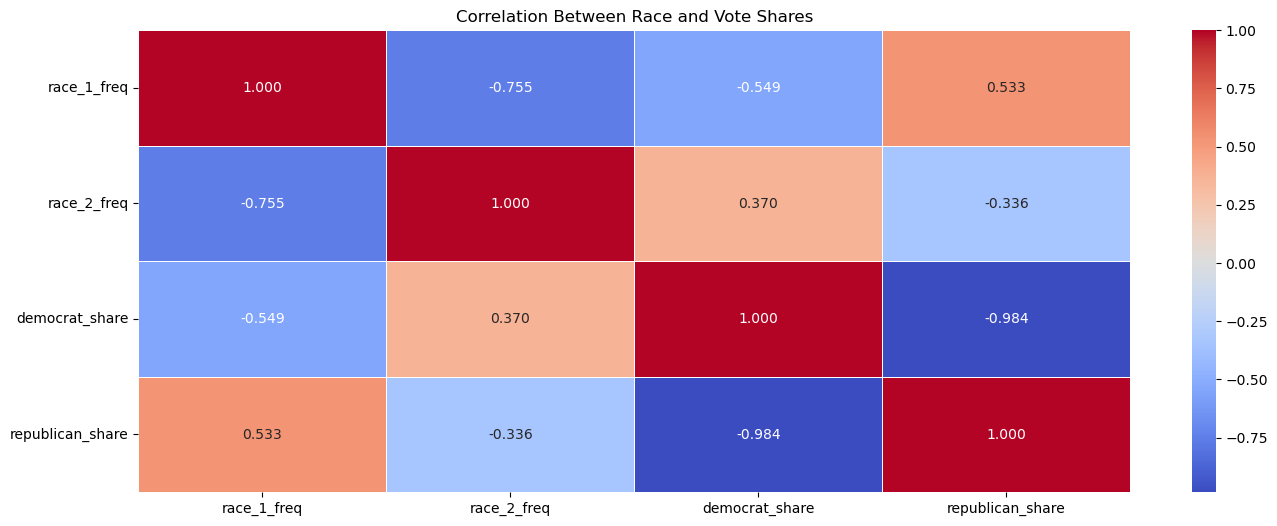

In [37]:
# correlation matrix 
race_corr_vars = ['race_1_freq', 'race_2_freq', 'democrat_share', 'republican_share']
race_corr_df = df[race_corr_vars].select_dtypes(include=['number'])
race_corr_matrix = race_corr_df.corr()
plt.figure(figsize=(16, 6))
sns.heatmap(race_corr_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Correlation Between Race and Vote Shares")
plt.show()

Text(0.5, 1.0, 'White Population vs Republican Votes shares')

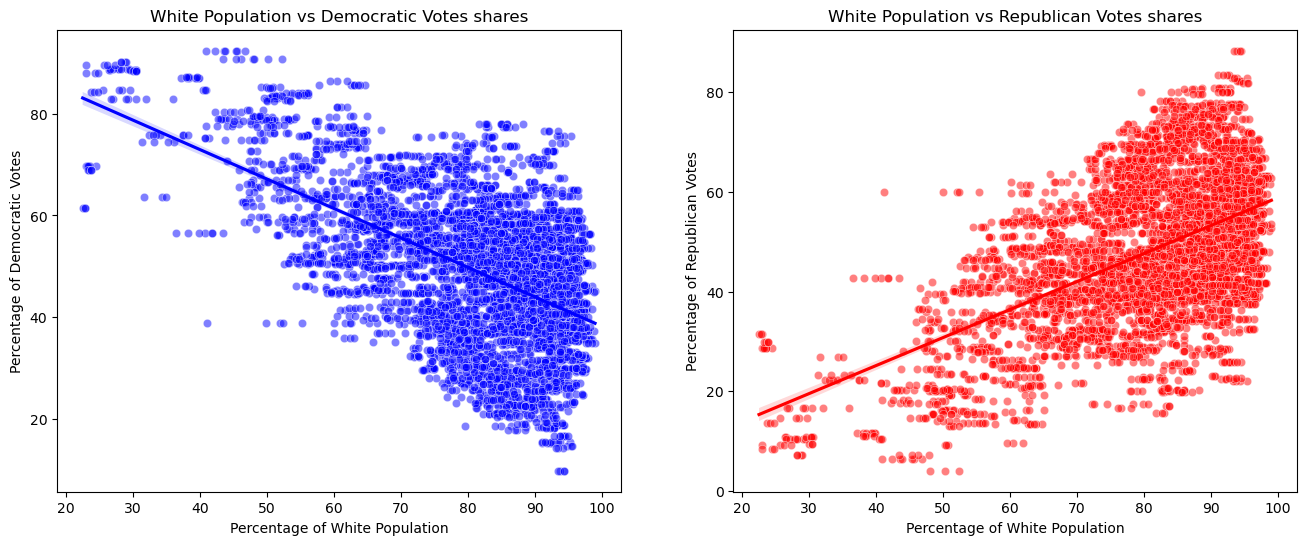

In [38]:
# visualizing the relationship between White race and democratic and republican votes 
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(x=df['race_1_freq'], y=df['democrat_share'], alpha=0.5, color='blue')
sns.regplot(x=df['race_1_freq'], y=df['democrat_share'], scatter=False, color='blue')
plt.xlabel('Percentage of White Population')
plt.ylabel('Percentage of Democratic Votes')
plt.title('White Population vs Democratic Votes shares')

plt.subplot(1, 2, 2)
sns.scatterplot(x=df['race_1_freq'], y=df['republican_share'], alpha=0.5, color='red')
sns.regplot(x=df['race_1_freq'], y=df['republican_share'], scatter=False, color='red')
plt.xlabel('Percentage of White Population')
plt.ylabel('Percentage of Republican Votes')
plt.title('White Population vs Republican Votes shares')

In [39]:
# White Race vs Democratic and Republican
df_avg_white = df.groupby('county_fips')[['race_1_freq', 'democrat_share', 'republican_share']].mean() # aggregating by county
white_democrat_r, white_democrat_p = stats.pearsonr(df_avg_white['race_1_freq'], df_avg_white['democrat_share'])
white_democrat_p_str = f'p={white_democrat_p:.3f}' if white_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of White Race vs Democratic Party: {white_democrat_r}, {white_democrat_p_str}')
white_democrat_rho, white_democrat_p2 = stats.spearmanr(df_avg_white['race_1_freq'], df_avg_white['democrat_share'])
white_democrat_p2_str = f'p={white_democrat_p2:.3f}' if white_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of White Race vs Democratic Party: {white_democrat_rho}, {white_democrat_p2_str}')
white_republican_r, white_republican_p = stats.pearsonr(df_avg_white['race_1_freq'], df_avg_white['republican_share'])
white_republican_p_str = f'p={white_republican_p:.3f}' if white_republican_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of White Race vs Republican Party: {white_republican_r}, {white_republican_p_str}')
white_republican_rho, white_republican_p2 = stats.spearmanr(df_avg_white['race_1_freq'], df_avg_white['republican_share'])
white_republican_p2_str = f'p={white_republican_p2:.3f}' if white_republican_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of White Race vs Republican Party: {white_republican_rho}, {white_republican_p2_str}')

The Pearson Correlation Coefficient of White Race vs Democratic Party: -0.5537841755504775, p < 0.001
The Spearman Correlation Coefficient of White Race vs Democratic Party: -0.4534134330951053, p < 0.001
The Pearson Correlation Coefficient of White Race vs Republican Party: 0.5295728862096866, p < 0.001
The Spearman Correlation Coefficient of White Race vs Republican Party: 0.43163309822857127, p < 0.001


The correlation analysis between the percentage of White residents in a county and voting patterns reveals distinct relationships with Democratic and Republican vote shares. The Pearson correlation coefficient for White population percentage vs. Democratic vote share is -0.554 (p < 0.001), indicating a moderate to strong negative linear relationship—as the percentage of White residents increases, the share of Democratic votes tends to decrease. The Spearman correlation of -0.453 (p < 0.001) suggests a similar negative trend, but with some potential non-linearity in the relationship. Interestingly, for Republican vote share, the Pearson correlation is 0.530 (p < 0.001), implying a moderate positive linear relationship. However, the Spearman correlation is 0.432 (p < 0.001), indicating a positive monotonic association, where counties with a higher percentage of White residents tend to have a greater share of Republican votes in a more general trend. The discrepancy between Pearson and Spearman correlations suggests that the relationship between racial composition and voting patterns may not be strictly linear, and further investigation—such as non-linear modeling—could provide deeper insights. 

In [40]:
# Black Race vs Democratic and Republican
df_avg_black = df.groupby('county_fips')[['race_2_freq', 'democrat_share', 'republican_share']].mean()
black_democrat_r, black_democrat_p = stats.pearsonr(df_avg_black['race_2_freq'], df_avg_black['democrat_share'])
black_democrat_p_dtr = f'p={black_democrat_p:.3f}' if black_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Black race vs Democratic Public Party: {black_democrat_r}, {black_democrat_p_dtr}')
black_democrat_rho, black_democrat_p2 = stats.spearmanr(df_avg_black['race_2_freq'], df_avg_black['democrat_share'])
black_democrat_p2_str = f'p={black_democrat_p2:.3f}' if black_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Black race vs Democratic Public Party: {black_democrat_rho}, {black_democrat_p2_str}')
black_republican_r, black_republican_p = stats.pearsonr(df_avg_black['race_2_freq'], df_avg_black['republican_share'])
black_republican_p_str = f'p={black_republican_p:.3f}' if black_republican_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Black race vs Republican Party: {black_republican_r}, {black_republican_p_str}')
black_republican_rho, black_republican_p2 = stats.spearmanr(df_avg_black['race_2_freq'], df_avg_black['republican_share'])
black_republican_p2_str = f'p={black_republican_p2:.3f}' if black_republican_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Black race vs Republican Party: {black_republican_rho}, {black_republican_p2_str}')

The Pearson Correlation Coefficient of Black race vs Democratic Public Party: 0.3709628914544105, p < 0.001
The Spearman Correlation Coefficient of Black race vs Democratic Public Party: 0.2199814341960693, p < 0.001
The Pearson Correlation Coefficient of Black race vs Republican Party: -0.33347751811319604, p < 0.001
The Spearman Correlation Coefficient of Black race vs Republican Party: -0.18260371491901933, p < 0.001


The correlation analysis between the percentage of Black residents in a county and voting patterns shows a moderate positive relationship with the Democratic Party and a moderate negative relationship with the Republican Party. The Pearson correlation coefficient for Black population percentage vs. Democratic vote share is 0.371 (p < 0.001), indicating a moderate positive linear relationship, meaning that counties with a higher percentage of Black residents tend to have a greater share of Democratic votes. The Spearman correlation (0.220, p < 0.001) suggests a weaker but still positive monotonic relationship, indicating that the association may not be strictly linear. Conversely, the Pearson correlation between Black population percentage and Republican vote share is -0.333 (p < 0.001), showing a moderate negative linear relationship, while the Spearman correlation (-0.183, p < 0.001) indicates a weaker but still negative trend. These findings align with historical voting trends, where counties with a larger Black population tend to favor Democratic candidates over Republican ones. However, the weaker Spearman correlations suggest that the relationship may not follow a perfectly consistent pattern across all counties.

In [41]:
# fitting a non-linear regression to white race vs votes to further investigate the relationship
X = df['race_1_freq'] # defining the dependent and independent variables
y_democrat = df['democrat_share']
y_republican = df['republican_share']
# adding polynomial terms for non-linearity (Quadratic model: y = a + bx + cx^2)
X_quad = np.column_stack((X, X**2))
X_quad = sm.add_constant(X_quad)  # adding the intercept 
# fitting the non-linear regression models 
model_democrat = sm.OLS(y_democrat, X_quad, missing='drop').fit()
model_republican = sm.OLS(y_republican, X_quad, missing='drop').fit()
# generating predictions for visualization 
X_range = np.linspace(X.min(), X.max(), 100)
X_range_quad = np.column_stack((X_range, X_range**2))
X_range_quad = sm.add_constant(X_range_quad)

y_pred_democrat = model_democrat.predict(X_range_quad)
y_pred_republican = model_republican.predict(X_range_quad)

model_democrat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         democrat_share   R-squared:                       0.307
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     1252.
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:32:07   Log-Likelihood:                -22057.
No. Observations:                5643   AIC:                         4.412e+04
Df Residuals:                    5640   BIC:                         4.414e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        116.0476      2.973     39.032      0.000     110.219     121.876
x1            -1.1670      0.084    -13.889      0.000      -1.332      -1.002
x2             0.0041      0.001      7.055      0.000       0.003       0.005
==============================================================================
Omnibus:                       86.852   Durbin-Watson:                   1.285
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               57.301
Skew:                          -0.115   Prob(JB):                     3.61e-13
Kurtosis:                       2.563   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model_republican.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       republican_share   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.290
Method:                 Least Squares   F-statistic:                     1153.
Date:                Wed, 09 Apr 2025   Prob (F-statistic):               0.00
Time:                        22:32:07   Log-Likelihood:                -22115.
No. Observations:                5643   AIC:                         4.424e+04
Df Residuals:                    5640   BIC:                         4.426e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -17.5979      3.004     -5.858      0.000     -23.487     -11.709
x1             1.1623      0.085     13.692      0.000       0.996       1.329
x2            -0.0042      0.001     -7.145      0.000      -0.005      -0.003
==============================================================================
Omnibus:                       62.518   Durbin-Watson:                   1.286
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.138
Skew:                           0.112   Prob(JB):                     1.58e-10
Kurtosis:                       2.624   Cond. No.                     1.29e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

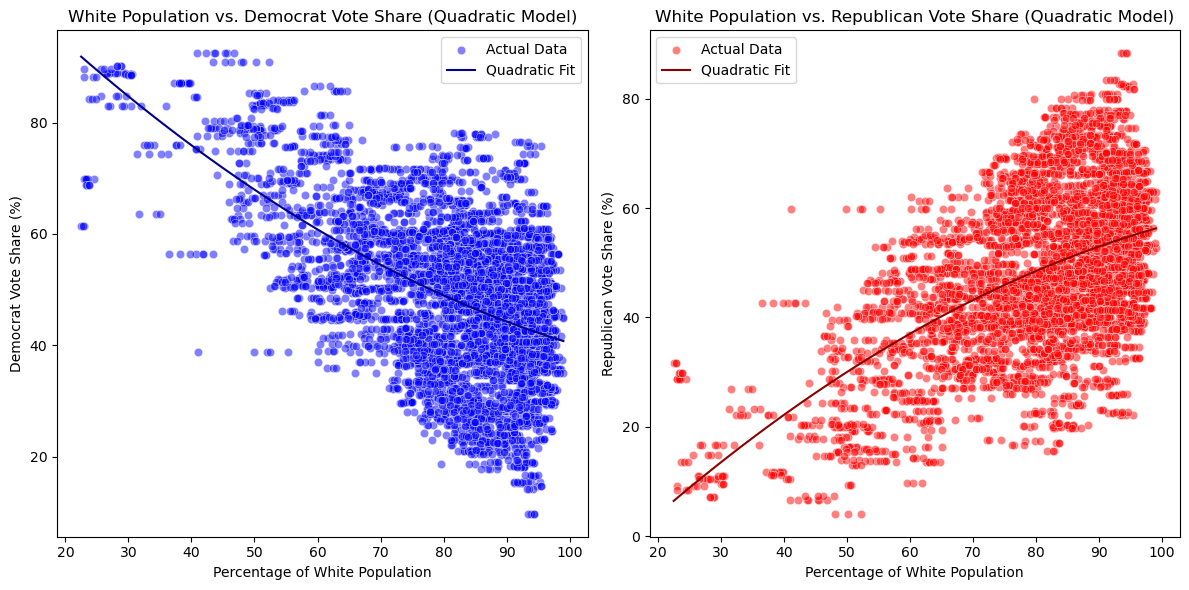

In [43]:
# plotting the non-linear regression curves
plt.figure(figsize=(12, 6))
# democratic
plt.subplot(1, 2, 1)
sns.scatterplot(x=X, y=y_democrat, alpha=0.5, color='blue', label="Actual Data")
plt.plot(X_range, y_pred_democrat, color='darkblue', label="Quadratic Fit")
plt.xlabel('Percentage of White Population')
plt.ylabel('Democrat Vote Share (%)')
plt.title('White Population vs. Democrat Vote Share (Quadratic Model)')
plt.legend()
# republican 
plt.subplot(1, 2, 2)
sns.scatterplot(x=X, y=y_republican, alpha=0.5, color='red', label="Actual Data")
plt.plot(X_range, y_pred_republican, color='darkred', label="Quadratic Fit")
plt.xlabel('Percentage of White Population')
plt.ylabel('Republican Vote Share (%)')
plt.title('White Population vs. Republican Vote Share (Quadratic Model)')
plt.legend()

plt.tight_layout()
plt.show()

Non Linear Regression Results: White Population vs Democratic and Republican vote shares

We fit a quadratic regression model to examine whether the relationship between the percentage of White residents and Democratic/Republican vote share follows a curved pattern. 
Key Findings: 
1. Model Fit and Statistical Significance: 
    - R^2 = 0.307 (democrat): The model explains 30.7% of the variation in Democratic vote share. While this suggests moderate fit, other factors likely influence voting patterns. 
    - R^2 = 0.290 (republican): The model explains 29% of the variation in Republican vote share. 
    - F-statistics = 1252, p < 0.001 (democrat); F-statistics = 1153, p-value < 0.001 (republican): The models are statistically significant, meaning at least one of the predictors has a meaningful effect on the dependent variables 
2. Coefficients and Interpretation (Democrat):
    - Intercept (const) = 116.05 → When race_1_freq (White population percentage) is zero, the predicted Democratic vote share would be 116.05% (which is not realistic but reflect extrapolation beyond observed values).
    - Linear Term (x1 coefficient = -1.167, p < 0.001)
        - The negative sign means that for every 1 percentage point increase in White population, Democratic vote share decreases by approximately 1.17 percentage points.
        - This confirms a negative linear relationship between White population share and Democratic support.
    - Quadratic Term (x^2 coefficient = 0.0041, p < 0.001): 
        - The positive coefficient on x^2 suggests a U-shaped relationship.
        - This means that as the White population percentage increases, the Democratic vote share initially declines, but at a decreasing rate.
        - In simpler terms, in predominantly White counties, the decline in Democratic support slows down, and in very high-White counties, it may level off.
3. Coefficients and Interpretation (Republican):
    - Intercept (const) = -17.60
    - Linear Term (x1 coefficient = 1.1623, p < 0.001): As the percentage of White population increases by 1 percentage point, Republican vote share increases by approximately 1.16 percentage points, holding other factors constant. This confirms a positive relationship.
    - Quadratic Term (x2 coefficient = -0.0042, p < 0.001): The negative coefficient suggests that Republican vote share increases with White population but at a decreasing rate. This means that Republican vote share rises in Whiter counties but levels off in extremely White counties.

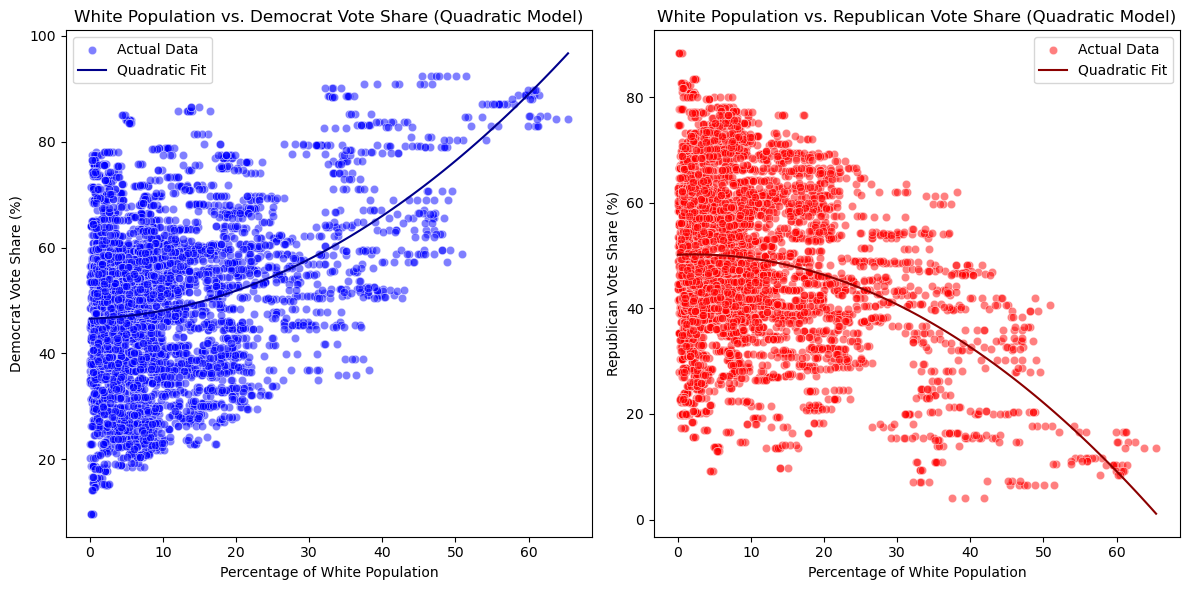

In [44]:
# Fitting non-linear regression to black population vs voting shares
X = df['race_2_freq'] # defining the dependent and independent variables
y_democrat = df['democrat_share']
y_republican = df['republican_share']
X_quad = np.column_stack((X, X**2))
X_quad = sm.add_constant(X_quad) 
# fitting non-linear regression models
model_democrat = sm.OLS(y_democrat, X_quad, missing='drop').fit()
model_republican = sm.OLS(y_republican, X_quad, missing='drop').fit()
# generating predictions for visualization
X_range = np.linspace(X.min(), X.max(), 100)
X_range_quad = np.column_stack((X_range, X_range**2))
X_range_quad = sm.add_constant(X_range_quad)

y_pred_democrat = model_democrat.predict(X_range_quad)
y_pred_republican = model_republican.predict(X_range_quad)

plt.figure(figsize=(12, 6))
# Democrat vote share
plt.subplot(1, 2, 1)
sns.scatterplot(x=X, y=y_democrat, alpha=0.5, color='blue', label="Actual Data")
plt.plot(X_range, y_pred_democrat, color='darkblue', label="Quadratic Fit")
plt.xlabel('Percentage of White Population')
plt.ylabel('Democrat Vote Share (%)')
plt.title('White Population vs. Democrat Vote Share (Quadratic Model)')
plt.legend()
# Republican vote share
plt.subplot(1, 2, 2)
sns.scatterplot(x=X, y=y_republican, alpha=0.5, color='red', label="Actual Data")
plt.plot(X_range, y_pred_republican, color='darkred', label="Quadratic Fit")
plt.xlabel('Percentage of White Population')
plt.ylabel('Republican Vote Share (%)')
plt.title('White Population vs. Republican Vote Share (Quadratic Model)')
plt.legend()
plt.tight_layout()
plt.show()

In [45]:
model_democrat.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         democrat_share   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     519.9
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          5.88e-208
Time:                        22:32:08   Log-Likelihood:                -22616.
No. Observations:                5643   AIC:                         4.524e+04
Df Residuals:                    5640   BIC:                         4.526e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.5665      0.306    152.244      0.000      45.967      47.166
x1             0.0429      0.044      0.978      0.328      -0.043       0.129
x2             0.0111      0.001     11.128      0.000       0.009       0.013
==============================================================================
Omnibus:                       46.387   Durbin-Watson:                   1.363
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               32.208
Skew:                           0.053   Prob(JB):                     1.01e-07
Kurtosis:                       2.646   Cond. No.                         910.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model_republican.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       republican_share   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.136
Method:                 Least Squares   F-statistic:                     444.1
Date:                Wed, 09 Apr 2025   Prob (F-statistic):          8.04e-180
Time:                        22:32:08   Log-Likelihood:                -22669.
No. Observations:                5643   AIC:                         4.534e+04
Df Residuals:                    5640   BIC:                         4.536e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.1647      0.309    162.471      0.000      49.559      50.770
x1             0.0545      0.044      1.230      0.219      -0.032       0.141
x2            -0.0123      0.001    -12.259      0.000      -0.014      -0.010
==============================================================================
Omnibus:                       34.285   Durbin-Watson:                   1.356
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.075
Skew:                          -0.069   Prob(JB):                     2.18e-06
Kurtosis:                       2.697   Cond. No.                         910.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

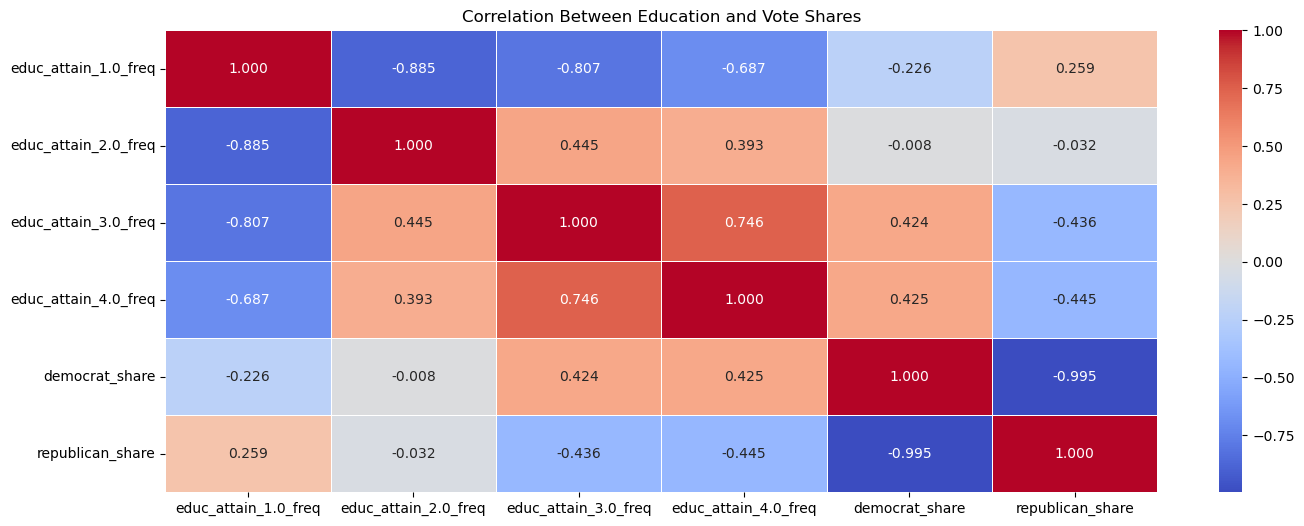

In [47]:
# 4. CORRELATION BETWEEN EDUCATION AND VOTING SHARES
df_avg_edu = df.groupby('county_fips')[['educ_attain_1.0_freq', 'educ_attain_2.0_freq', 'educ_attain_3.0_freq', 'educ_attain_4.0_freq', 'democrat_share', 'republican_share']].mean()
educ_corr_vars = ['educ_attain_1.0_freq', 'educ_attain_2.0_freq', 'educ_attain_3.0_freq', 'educ_attain_4.0_freq', 'democrat_share', 'republican_share']
educ_corr_df  =df_avg_edu[educ_corr_vars].select_dtypes(include=['number'])
educ_corr_matrix = educ_corr_df.corr()
# visualizing the heatmap
plt.figure(figsize=(16, 6))
sns.heatmap(educ_corr_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Correlation Between Education and Vote Shares")
plt.show()

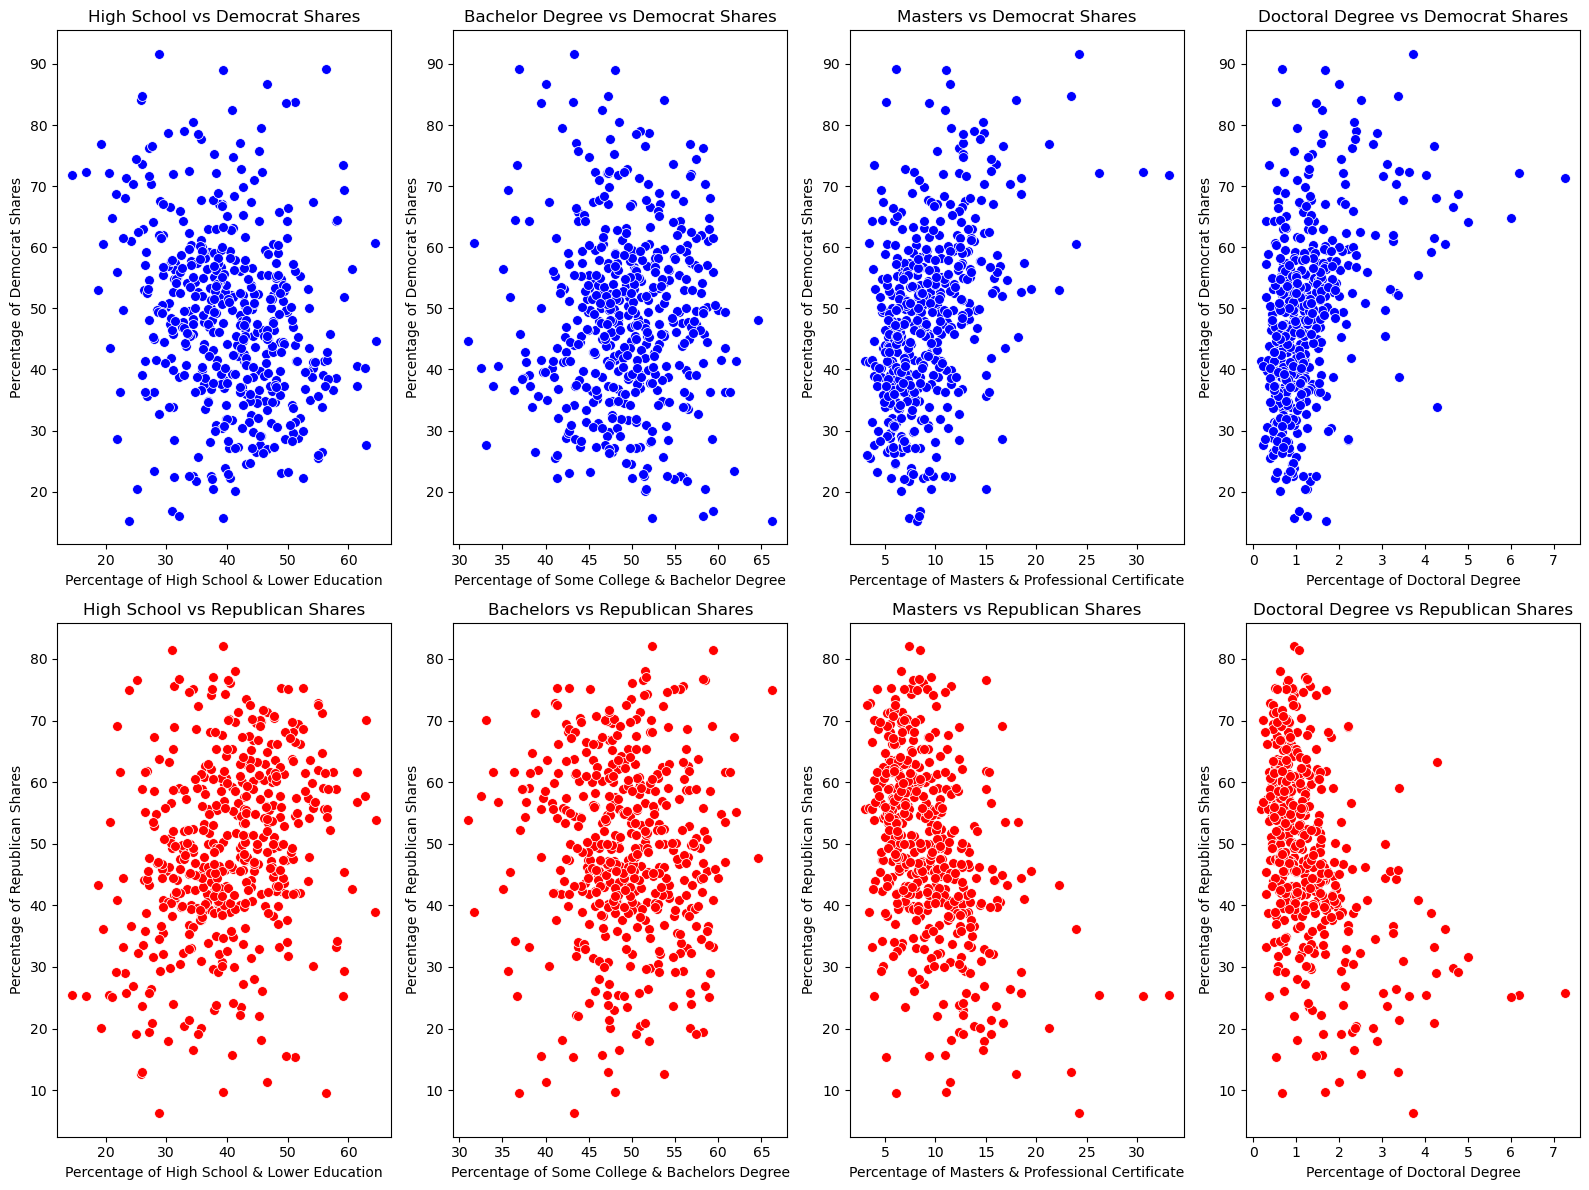

In [48]:
# visualizing the relationship between education and vote share 
fig, axes = plt.subplots(2, 4, figsize=(16, 12))  

# High School vs. Democrat Shares
sns.scatterplot(ax=axes[0, 0], x=df_avg_edu['educ_attain_1.0_freq'], y=df_avg_edu['democrat_share'], s=50, color='blue')
axes[0, 0].set_xlabel('Percentage of High School & Lower Education')
axes[0, 0].set_ylabel('Percentage of Democrat Shares')
axes[0, 0].set_title('High School vs Democrat Shares')

# Some College & Bachelor Degree vs. Democrat Shares
sns.scatterplot(ax=axes[0, 1], x=df_avg_edu['educ_attain_2.0_freq'], y=df_avg_edu['democrat_share'], s=50, color='blue')
axes[0, 1].set_xlabel('Percentage of Some College & Bachelor Degree')
axes[0, 1].set_ylabel('Percentage of Democrat Shares')
axes[0, 1].set_title('Bachelor Degree vs Democrat Shares')

# Masters & Professional Certificate vs. Democrat Shares
sns.scatterplot(ax=axes[0, 2], x=df_avg_edu['educ_attain_3.0_freq'], y=df_avg_edu['democrat_share'], s=50, color='blue')
axes[0, 2].set_xlabel('Percentage of Masters & Professional Certificate')
axes[0, 2].set_ylabel('Percentage of Democrat Shares')
axes[0, 2].set_title('Masters vs Democrat Shares')

# Doctoral Degree vs. Democrat Shares
sns.scatterplot(ax=axes[0, 3], x=df_avg_edu['educ_attain_4.0_freq'], y=df_avg_edu['democrat_share'], s=50, color='blue')
axes[0, 3].set_xlabel('Percentage of Doctoral Degree')
axes[0, 3].set_ylabel('Percentage of Democrat Shares')
axes[0, 3].set_title('Doctoral Degree vs Democrat Shares')

# High School vs Republican Shares
sns.scatterplot(ax=axes[1, 0], x=df_avg_edu['educ_attain_1.0_freq'], y=df_avg_edu['republican_share'], s=50, color='red')
axes[1, 0].set_xlabel('Percentage of High School & Lower Education')
axes[1, 0].set_ylabel('Percentage of Republican Shares')
axes[1, 0].set_title('High School vs Republican Shares')

# Some College & Bachelor Degree vs Republican shares
sns.scatterplot(ax=axes[1, 1], x=df_avg_edu['educ_attain_2.0_freq'], y=df_avg_edu['republican_share'], s=50, color='red')
axes[1, 1].set_xlabel('Percentage of Some College & Bachelors Degree')
axes[1, 1].set_ylabel('Percentage of Republican Shares')
axes[1, 1].set_title('Bachelors vs Republican Shares')

# Masters vs Republican Shares
sns.scatterplot(ax=axes[1, 2], x=df_avg_edu['educ_attain_3.0_freq'], y=df_avg_edu['republican_share'], s=50, color='red')
axes[1, 2].set_xlabel('Percentage of Masters & Professional Certificate')
axes[1, 2].set_ylabel('Percentage of Republican Shares')
axes[1, 2].set_title('Masters vs Republican Shares')

# Doctors vs Republican Shares
sns.scatterplot(ax=axes[1, 3], x=df_avg_edu['educ_attain_4.0_freq'], y=df_avg_edu['republican_share'], s=50, color='red')
axes[1, 3].set_xlabel('Percentage of Doctoral Degree')
axes[1, 3].set_ylabel('Percentage of Republican Shares')
axes[1, 3].set_title('Doctoral Degree vs Republican Shares')

plt.tight_layout()
plt.show()

We can't observe any clear correlation from the scatter plots between the education and voting shares. Therefore, the further correlation analyses are needed to investigate the correlation between the two features.

In [49]:
# calculating the correlation using pearson and spearman 
# high school vs Democrat 
educ1_democrat_r, educ1_democrat_p = stats.pearsonr(df_avg_edu['educ_attain_1.0_freq'], df_avg_edu['democrat_share'])
educ1_democrat_p_str = f'p={educ1_democrat_p:.3f}' if educ1_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of High School vs Democrat Vote Shares: {educ1_democrat_r}, {educ1_democrat_p_str}')
educ1_democrat_rho, educ1_democrat_p2 = stats.spearmanr(df_avg_edu['educ_attain_1.0_freq'], df_avg_edu['democrat_share'])
educ1_democrat_p2_str = f'p={educ1_democrat_p2:.3f}' if educ1_democrat_p2> 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of High School vs Democrat Vote Shares: {educ1_democrat_rho}, {educ1_democrat_p2_str}')
# high school vs Republican
educ1_repub_r, educ1_repub_p = stats.pearsonr(df_avg_edu['educ_attain_1.0_freq'], df_avg_edu['republican_share'])
educ1_repub_p_str = f'p={educ1_repub_p:.3f}' if educ1_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of High School vs Republican Vote Shares: {educ1_repub_r}, {educ1_repub_p_str}')
educ1_repub_rho, educ1_repub_p2 = stats.spearmanr(df_avg_edu['educ_attain_1.0_freq'], df_avg_edu['republican_share'])
educ1_repub_p2_str = f'p={educ1_repub_p2:.3f}' if educ1_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of High School vs Republican Votes Shares: {educ1_repub_rho}, {educ1_repub_p2_str}')

The Pearson Correlation Coefficient of High School vs Democrat Vote Shares: -0.22577422678468556, p < 0.001
The Spearman Correlation Coefficient of High School vs Democrat Vote Shares: -0.2512302801146351, p < 0.001
The Pearson Correlation Coefficient of High School vs Republican Vote Shares: 0.25902059707175684, p < 0.001
The Spearman Correlation Coefficient of High School vs Republican Votes Shares: 0.27612417780602455, p < 0.001


In [50]:
# bachelor vs democrat 
educ2_democrat_r, educ2_democrat_p = stats.pearsonr(df_avg_edu['educ_attain_2.0_freq'], df_avg_edu['democrat_share'])
educ2_democrat_p_str = f'p={educ2_democrat_p:.3f}' if educ2_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Bachelor Degree vs Democrat Vote Shares: {educ2_democrat_r}, {educ2_democrat_p_str}')
educ2_democrat_rho, educ2_democrat_p2 = stats.spearmanr(df_avg_edu['educ_attain_2.0_freq'], df_avg_edu['democrat_share'])
educ2_democrat_p2_str = f'p={educ2_democrat_p2:.3f}' if educ2_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Bachelor Degree vs Democrat Vote Shares: {educ2_democrat_rho}, {educ2_democrat_p2_str}')
# bachelor vs Republican 
educ2_repub_r, educ2_repub_p = stats.pearsonr(df_avg_edu['educ_attain_2.0_freq'], df_avg_edu['republican_share'])
educ2_repub_p_str = f'p={educ2_repub_p:.3f}' if educ2_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Bachelor Degree vs Republican Vote Shares: {educ2_repub_r}, {educ2_repub_p_str}')
educ2_repub_rho, educ2_repub_p2 = stats.spearmanr(df_avg_edu['educ_attain_2.0_freq'], df_avg_edu['republican_share'])
educ2_repub_p2_str = f'p={educ2_repub_p2:.3f}' if educ2_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Bachelor Degree vs Republican Vote Shares: {educ2_repub_rho}, {educ2_repub_p2_str}')

The Pearson Correlation Coefficient of Bachelor Degree vs Democrat Vote Shares: -0.007779628972292597, p=0.866
The Spearman Correlation Coefficient of Bachelor Degree vs Democrat Vote Shares: 0.039298332440168, p=0.393
The Pearson Correlation Coefficient of Bachelor Degree vs Republican Vote Shares: -0.03229645868529457, p=0.483
The Spearman Correlation Coefficient of Bachelor Degree vs Republican Vote Shares: -0.06892170209995992, p=0.134


In [51]:
# masters vs democrat 
educ3_democrat_r, educ3_democrat_p = stats.pearsonr(df_avg_edu['educ_attain_3.0_freq'], df_avg_edu['democrat_share'])
educ3_democrat_p_str = f'p={educ3_democrat_p:.3f}' if educ3_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Masters Degree vs Democrat Vote Share: {educ3_democrat_r}, {educ3_democrat_p_str}')
educ3_democrat_rho, educ3_democrat_p2 = stats.spearmanr(df_avg_edu['educ_attain_3.0_freq'], df_avg_edu['democrat_share'])
educ3_democrat_p2_str = f'p={educ3_democrat_p2:.3f}' if educ3_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Masters Degree vs Democrat Vote Share: {educ3_democrat_rho}, {educ3_democrat_p2_str}')
# masters vs republican
educ3_repub_r, educ3_repub_p = stats.pearsonr(df_avg_edu['educ_attain_3.0_freq'], df_avg_edu['republican_share'])
educ3_repub_p_str = f'p={educ3_repub_p:.3f}' if educ3_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Masters Degree vs Republican Vote Share: {educ3_repub_r}, {educ3_repub_p_str}')
educ3_repub_rho, educ3_repub_p2 = stats.spearmanr(df_avg_edu['educ_attain_3.0_freq'], df_avg_edu['republican_share'])
educ3_repub_p2_str = f'p={educ3_repub_p2:.3f}' if educ3_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Masters Degree vs Republican Vote Share: {educ3_repub_rho}, {educ3_repub_p2_str}')

The Pearson Correlation Coefficient of Masters Degree vs Democrat Vote Share: 0.4239133583135992, p < 0.001
The Spearman Correlation Coefficient of Masters Degree vs Democrat Vote Share: 0.4049405736361754, p < 0.001
The Pearson Correlation Coefficient of Masters Degree vs Republican Vote Share: -0.43560915457883476, p < 0.001
The Spearman Correlation Coefficient of Masters Degree vs Republican Vote Share: -0.4167737804149308, p < 0.001


In [52]:
# doctoral degree vs democrat
educ4_democrat_r, educ4_democrat_p = stats.pearsonr(df_avg_edu['educ_attain_4.0_freq'], df_avg_edu['democrat_share'])
educ4_democrat_p_str = f'p={educ4_democrat_p:.3f}' if educ4_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Doctoral Degree vs Democrat Vote Share: {educ4_democrat_r}, {educ4_democrat_p_str}')
educ4_democrat_rho, educ4_democrat_p2 = stats.spearmanr(df_avg_edu['educ_attain_4.0_freq'], df_avg_edu['democrat_share'])
educ4_democrat_p2_str = f'p={educ4_democrat_p2:.3f}' if educ4_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Doctoral Degree vs Democrat Vote Share: {educ4_democrat_rho}, {educ4_democrat_p2_str}')
# doctoral degree vs republican
educ4_repub_r, educ4_repub_p = stats.pearsonr(df_avg_edu['educ_attain_4.0_freq'], df_avg_edu['republican_share'])
educ4_repub_p_str = f'p={educ4_repub_p:.3f}' if educ4_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Doctoral Degree vs Republican Vote Share: {educ4_repub_r}, {educ4_repub_p_str}')
educ4_repub_rho, educ4_repub_p2 = stats.spearmanr(df_avg_edu['educ_attain_4.0_freq'], df_avg_edu['republican_share'])
educ4_repub_p2_str = f'p={educ4_repub_p2:.3f}' if educ4_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Doctoral Degree vs Republican Vote Share: {educ4_repub_rho}, {educ4_repub_p2_str}')

The Pearson Correlation Coefficient of Doctoral Degree vs Democrat Vote Share: 0.4248622337387357, p < 0.001
The Spearman Correlation Coefficient of Doctoral Degree vs Democrat Vote Share: 0.4175768916468438, p < 0.001
The Pearson Correlation Coefficient of Doctoral Degree vs Republican Vote Share: -0.44540363299089314, p < 0.001
The Spearman Correlation Coefficient of Doctoral Degree vs Republican Vote Share: -0.43307148561547765, p < 0.001


The correlation analysis highlights the relationship between education levels and voting preferences. A higher percentage of high school graduates is negatively correlated with Democratic vote shares and positively correlated with Republican vote shares (Pearson: -0.23 vs. 0.26, p < 0.001). Bachelor's degrees show no statistically significant correlation with voting outcomes. However, higher education levels, particularly master's and doctoral degrees, are strongly associated with increased Democratic support (Pearson: ~0.42) and decreased Republican support (Pearson: ~-0.44), with all correlations being highly significant (p < 0.001). These results emphasize the role of educational attainment in shaping electoral outcomes.

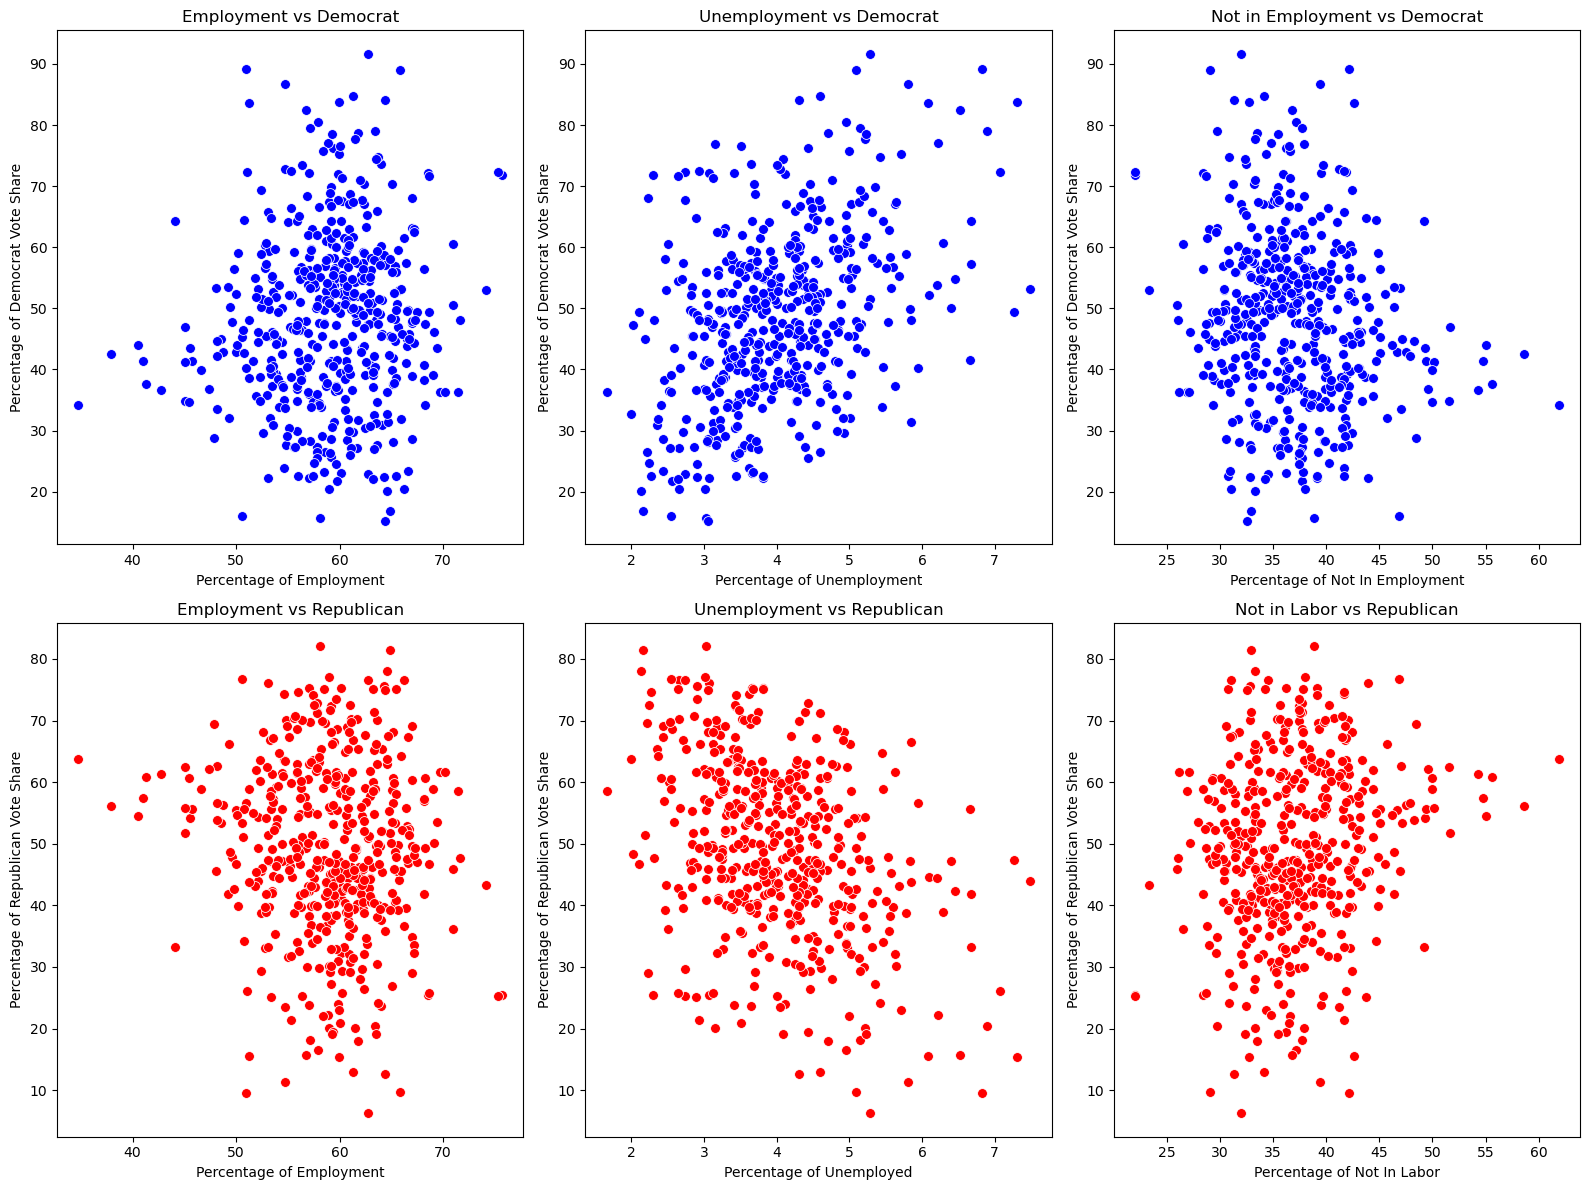

In [53]:
# 5. Employmentship vs Vote Shares
df_avg_employ = df.groupby('county_fips')[['empstat_1.0_freq', 'empstat_2.0_freq', 'empstat_3.0_freq', 'republican_share', 'democrat_share']].mean()
# visualizing the relationship 
fig, axes = plt.subplots(2, 3, figsize=(16, 12))
# Employed vs Democrat
sns.scatterplot(ax=axes[0, 0], x=df_avg_employ['empstat_1.0_freq'], y=df_avg_employ['democrat_share'], s=50, color='blue')
axes[0, 0].set_xlabel('Percentage of Employment')
axes[0, 0].set_ylabel('Percentage of Democrat Vote Share')
axes[0, 0].set_title('Employment vs Democrat')
# Unemployed vs Democrat
sns.scatterplot(ax=axes[0, 1], x=df_avg_employ['empstat_2.0_freq'], y=df_avg_employ['democrat_share'], s=50, color='blue')
axes[0, 1].set_xlabel('Percentage of Unemployment')
axes[0, 1].set_ylabel('Percentage of Democrat Vote Share')
axes[0, 1].set_title('Unemployment vs Democrat')
# Not in Labor vs Democrat
sns.scatterplot(ax=axes[0, 2], x=df_avg_employ['empstat_3.0_freq'], y=df_avg_employ['democrat_share'], s=50, color='blue')
axes[0, 2].set_xlabel('Percentage of Not In Employment')
axes[0, 2].set_ylabel('Percentage of Democrat Vote Share')
axes[0, 2].set_title('Not in Employment vs Democrat')
# Employed vs Republic 
sns.scatterplot(ax=axes[1, 0], x=df_avg_employ['empstat_1.0_freq'], y=df_avg_employ['republican_share'], s=50, color='red')
axes[1, 0].set_xlabel('Percentage of Employment')
axes[1, 0].set_ylabel('Percentage of Republican Vote Share')
axes[1, 0].set_title('Employment vs Republican')
# Unemployed vs Republic 
sns.scatterplot(ax=axes[1, 1], x=df_avg_employ['empstat_2.0_freq'], y=df_avg_employ['republican_share'], s=50, color='red')
axes[1, 1].set_xlabel('Percentage of Unemployed')
axes[1, 1].set_ylabel('Percentage of Republican Vote Share')
axes[1, 1].set_title('Unemployment vs Republican')
# Not in Labor vs Republican
sns.scatterplot(ax=axes[1, 2], x=df_avg_employ['empstat_3.0_freq'], y=df_avg_employ['republican_share'], s=50, color='red')
axes[1, 2].set_xlabel('Percentage of Not In Labor')
axes[1, 2].set_ylabel('Percentage of Republican Vote Share')
axes[1, 2].set_title('Not in Labor vs Republican')

plt.tight_layout()
plt.show()

In [54]:
# calculating correlation using pearson and spearman 
# Employed vs Democrat
employ_democrat_r, employ_democrat_p = stats.pearsonr(df_avg_employ['empstat_1.0_freq'], y=df_avg_employ['democrat_share'])
employ_democrat_p_str = f'p={employ_democrat_p:.3f}' if employ_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Employment vs Democrat: {employ_democrat_r}, {employ_democrat_p_str}')
employ_democrat_rho, employ_democrat_p2 = stats.spearmanr(df_avg_employ['empstat_1.0_freq'], df_avg_employ['democrat_share'])
employ_democrat_p2_str = f'p={employ_democrat_p2:.3f}' if employ_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Employed: {employ_democrat_rho}, {employ_democrat_p2_str}')
# Unemployed vs Democrat 
unemploy_democrat_r, unemploy_democrat_p = stats.spearmanr(df_avg_employ['empstat_2.0_freq'], df_avg_employ['democrat_share'])
unemploy_democrat_p_str = f'p={unemploy_democrat_p:.3f}' if unemploy_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Unemployed vs Democrat:{unemploy_democrat_r}, {unemploy_democrat_p_str}')
unemploy_democrat_rho, unemploy_democrat_p2 = stats.spearmanr(df_avg_employ['empstat_2.0_freq'], df_avg_employ['democrat_share'])
unemploy_democrat_p2_str = f'p={unemploy_democrat_p2:.3f}' if unemploy_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Unemployed vs Democrat: {unemploy_democrat_rho}, {unemploy_democrat_p2_str}')
# Not in Labor vs Democrat 
notinlabor_democrat_r, notinlabor_democrat_p = stats.pearsonr(df_avg_employ['empstat_3.0_freq'], df_avg_employ['democrat_share'])
notinlabor_democrat_p_str = f'p={notinlabor_democrat_p:.3f}' if notinlabor_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Not in Labor vs Democrat: {notinlabor_democrat_r}, {notinlabor_democrat_p_str}')
notinlabor_democrat_rho, notinlabor_democrat_p2 = stats.pearsonr(df_avg_employ['empstat_3.0_freq'], df_avg_employ['democrat_share'])
notinlabor_democrat_p2_str = f'p={notinlabor_democrat_p2:.3f}' if notinlabor_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Not in Labor vs Democrat: {notinlabor_democrat_rho}, {notinlabor_democrat_p2_str}')

The Pearson Correlation Coefficient of Employment vs Democrat: 0.08830318902403742, p=0.054
The Spearman Correlation Coefficient of Employed: 0.07937616620617668, p=0.084
The Pearson Correlation Coefficient of Unemployed vs Democrat:0.3844808683522068, p < 0.001
The Spearman Correlation Coefficient of Unemployed vs Democrat: 0.3844808683522068, p < 0.001
The Pearson Correlation Coefficient of Not in Labor vs Democrat: -0.16729332141814834, p < 0.001
The Spearman Correlation Coefficient of Not in Labor vs Democrat: -0.16729332141814834, p < 0.001


In [55]:
# Employed vs Republican
employ_repub_r, employ_repub_p = stats.pearsonr(df_avg_employ['empstat_1.0_freq'], df_avg_employ['republican_share'])
employ_repub_p_str = f'p={employ_repub_p:.3f}' if employ_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Employed vs Republican: {employ_repub_r}, {employ_repub_p_str}')
employ_repub_rho, employ_repub_p2 = stats.spearmanr(df_avg_employ['empstat_1.0_freq'], df_avg_employ['republican_share'])
employ_repub_p2_str = f'p={employ_repub_p2:.3f}' if employ_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Employed vs Republican: {employ_repub_rho}, {employ_repub_p2_str}')
# Unemployed vs Republican 
unemploy_repub_r, unemploy_repub_p = stats.pearsonr(df_avg_employ['empstat_2.0_freq'], df_avg_employ['republican_share'])
unemploy_repub_p_str = f'p={unemploy_repub_p:.3f}' if unemploy_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Unemployed vs Republican: {unemploy_repub_r}, {unemploy_repub_p_str}')
unemploy_repub_rho, unemploy_repub_p2 = stats.spearmanr(df_avg_employ['empstat_2.0_freq'], df_avg_employ['republican_share'])
unemploy_repub_p2_str = f'p={unemploy_repub_p2:.3f}' if unemploy_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Unemployed vs Republican: {unemploy_repub_rho}, {unemploy_repub_p2_str}')
# Not in Labor vs Republican
notinlabor_repub_r, notinlabor_repub_p = stats.pearsonr(df_avg_employ['empstat_3.0_freq'], df_avg_employ['republican_share'])
notinlabor_repub_p_str = f'p={notinlabor_repub_p:.3f}' if notinlabor_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Not in Labor vs Republican: {notinlabor_repub_r}, {notinlabor_repub_p_str}')
notinlabor_repub_rho, notinlabor_repub_p2 = stats.pearsonr(df_avg_employ['empstat_3.0_freq'], df_avg_employ['republican_share'])
notinlabor_repub_p2_str = f'p={notinlabor_repub_p2:.3f}' if notinlabor_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Not in Labor vs Republican: {notinlabor_repub_rho}, {notinlabor_repub_p2_str}')

The Pearson Correlation Coefficient of Employed vs Republican: -0.10036482465770193, p=0.029
The Spearman Correlation Coefficient of Employed vs Republican: -0.08772669025257263, p=0.056
The Pearson Correlation Coefficient of Unemployed vs Republican: -0.38706812806473134, p < 0.001
The Spearman Correlation Coefficient of Unemployed vs Republican: -0.36092787477330557, p < 0.001
The Pearson Correlation Coefficient of Not in Labor vs Republican: 0.17493640050710133, p < 0.001
The Spearman Correlation Coefficient of Not in Labor vs Republican: 0.17493640050710133, p < 0.001


The correlation analysis reveals significant relationships between employment status and voting patterns. While employment has a weak and statistically insignificant correlation with Democratic vote share (Pearson: 0.09, p = 0.054), unemployment shows a strong positive correlation with Democratic support (Pearson: 0.38, p < 0.001). Conversely, unemployment is negatively correlated with Republican votes (Pearson: -0.39, p < 0.001), while those not in the labor force show a small but significant negative correlation with Democratic votes (Pearson: -0.17, p < 0.001) and a positive correlation with Republican votes (Pearson: 0.17, p < 0.001). These findings suggest that economic conditions, particularly employment status, play a crucial role in shaping electoral preferences.

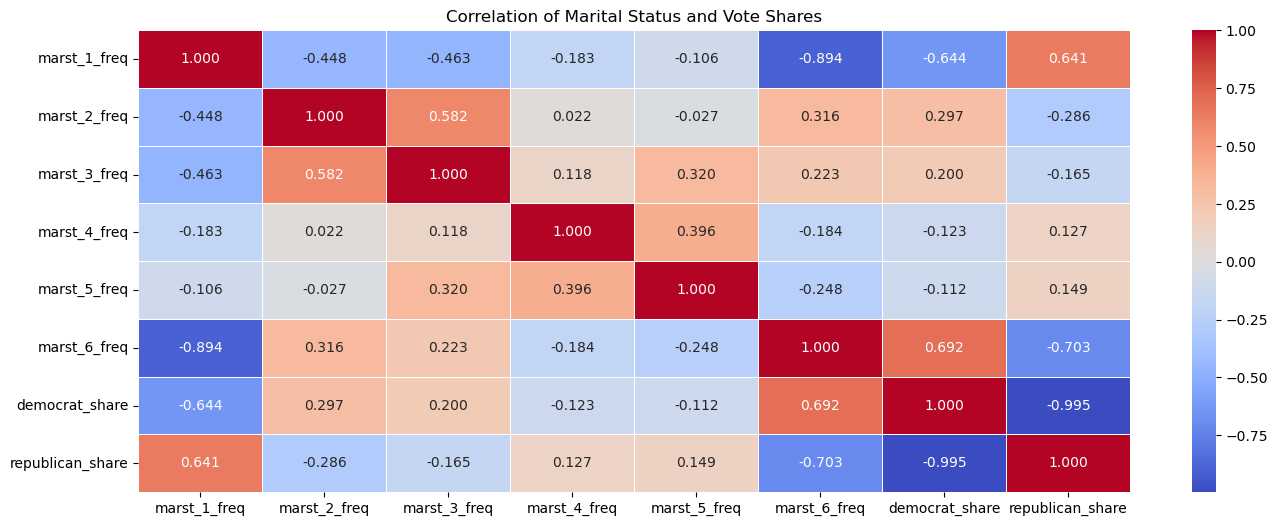

In [56]:
# 6. Marital Status vs Votes 
df_avg_fam = df.groupby('county_fips')[['marst_1_freq', 'marst_2_freq', 'marst_3_freq', 'marst_4_freq', 'marst_5_freq', 'marst_6_freq', 'democrat_share', 'republican_share']].mean()
marr_corr_vars = ['marst_1_freq', 'marst_2_freq', 'marst_3_freq', 'marst_4_freq', 'marst_5_freq', 'marst_6_freq', 'democrat_share', 'republican_share']
marr_corr_df = df_avg_fam[marr_corr_vars].select_dtypes(include=['number'])
marr_corr_matrix = marr_corr_df.corr()

plt.figure(figsize=(16, 6))
sns.heatmap(marr_corr_matrix, annot=True, cmap='coolwarm', fmt=".3f", linewidths=0.5)
plt.title("Correlation of Marital Status and Vote Shares")
plt.show()

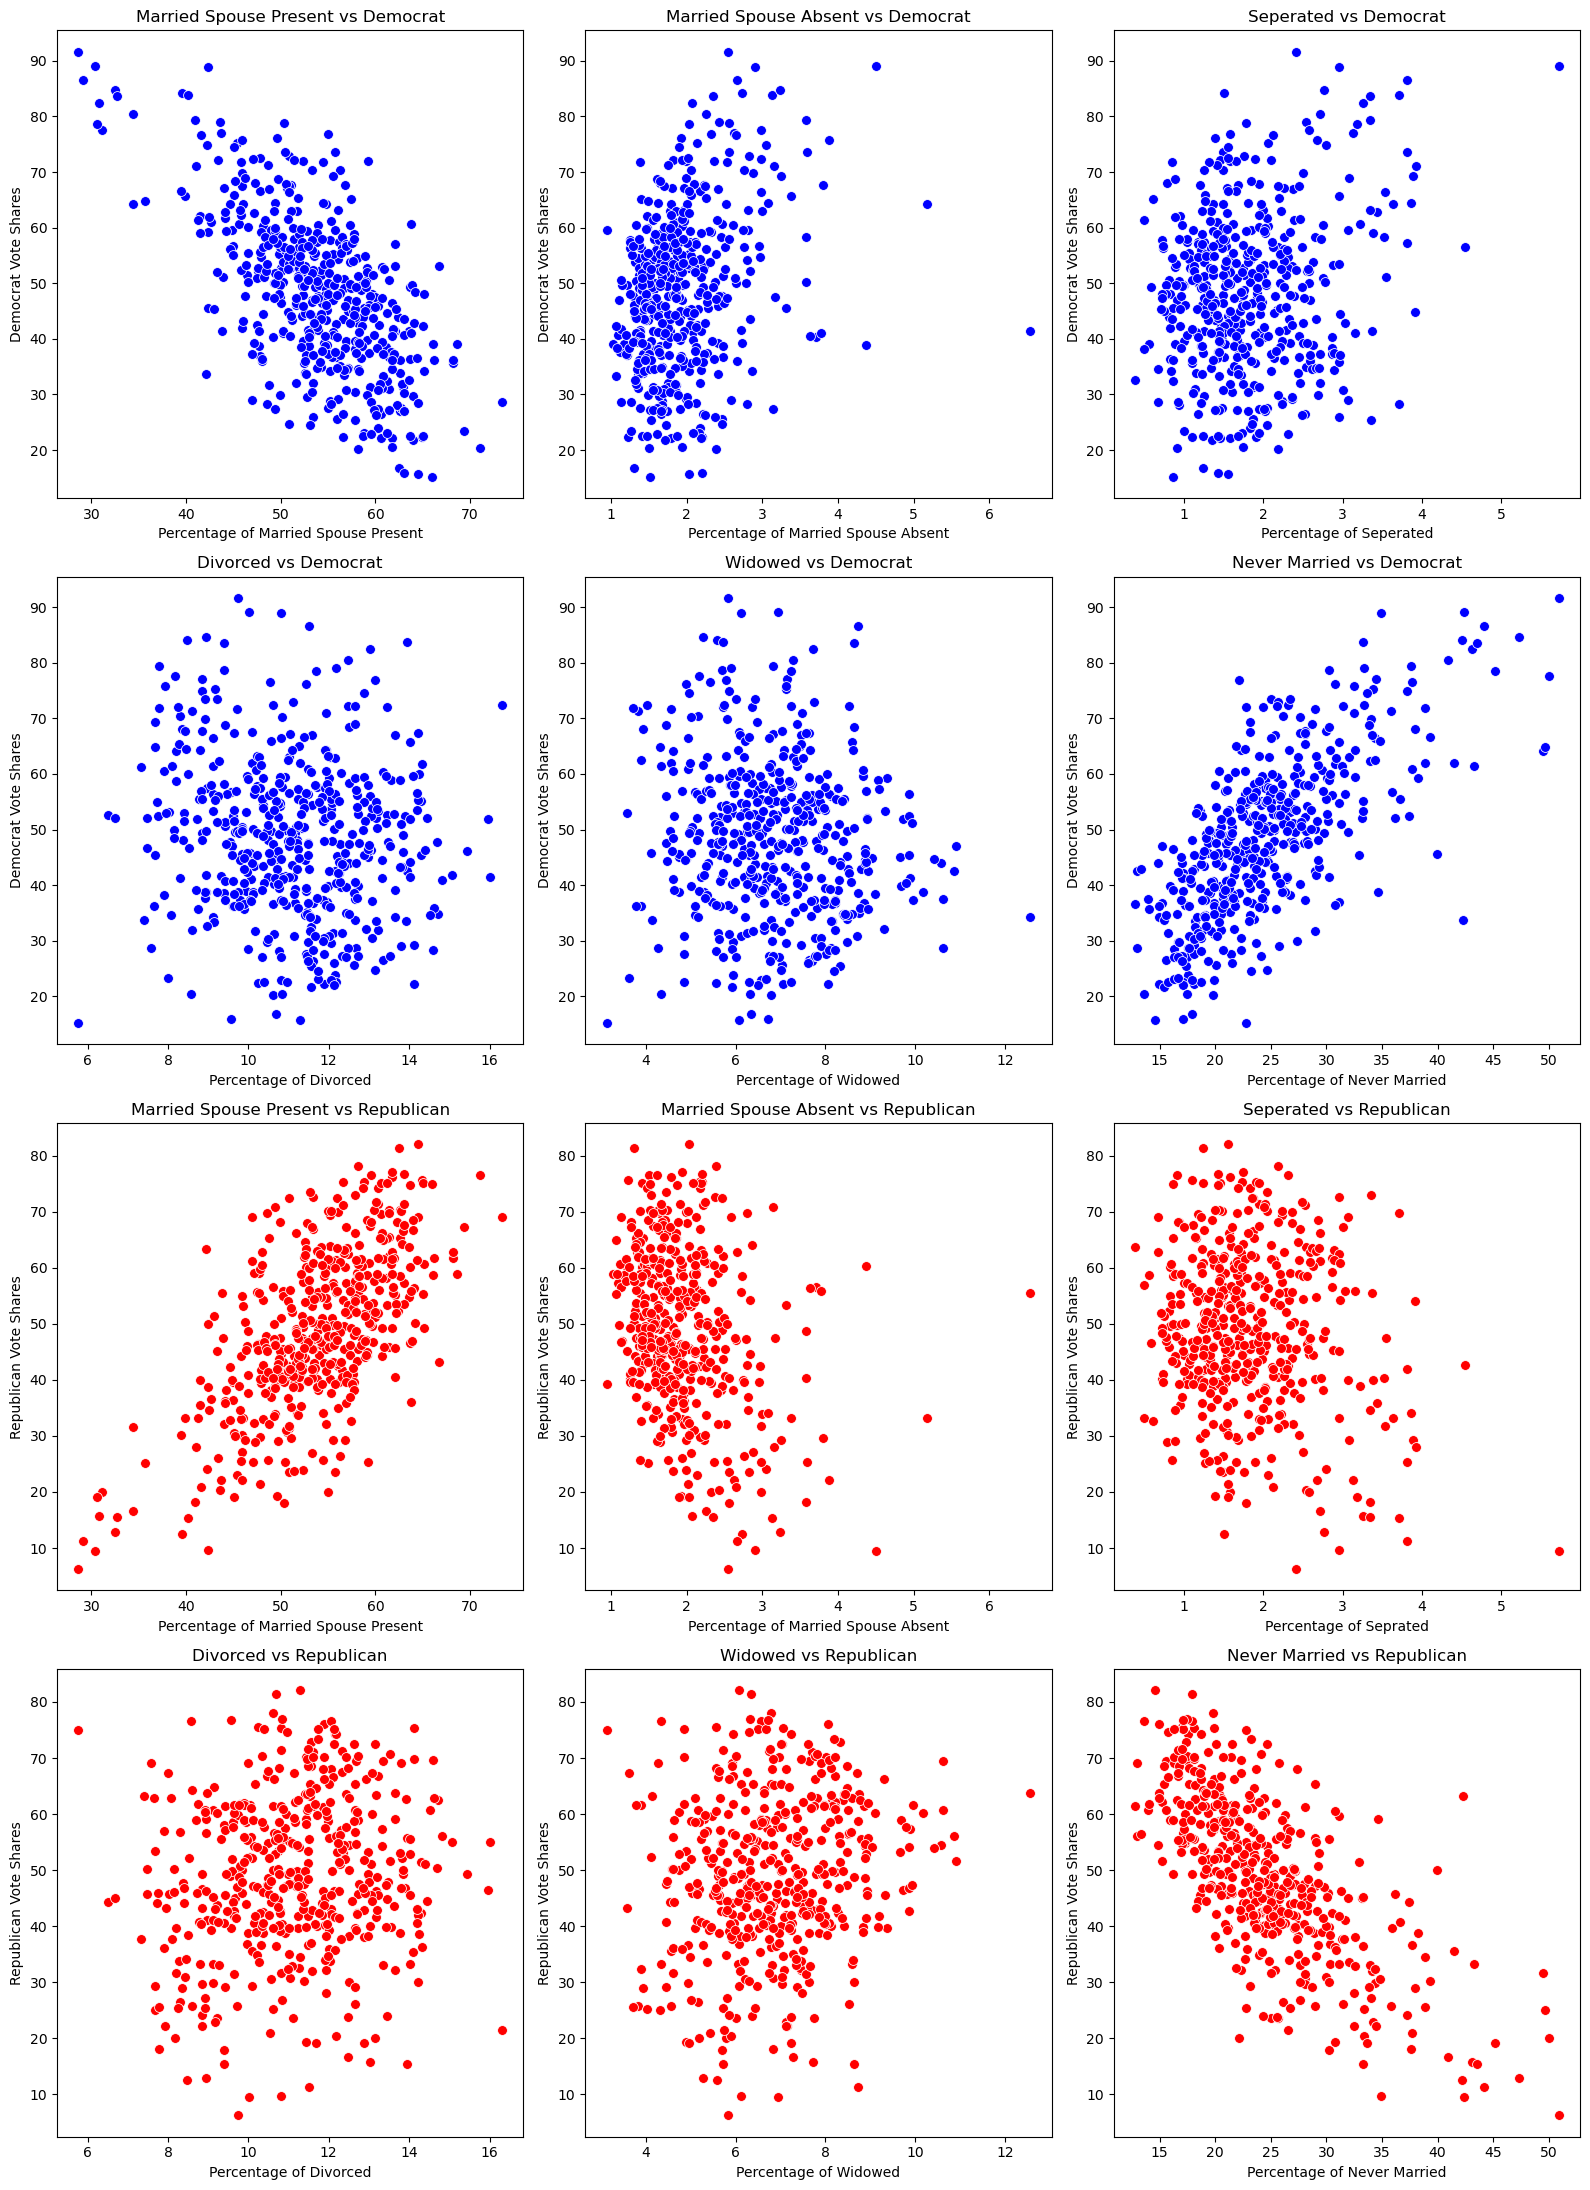

In [57]:
# visualizing the relationship
fig, axes = plt.subplots(4, 3, figsize=(16, 22))
# Married Spouse Present vs Democrat 
sns.scatterplot(ax=axes[0, 0], x=df_avg_fam['marst_1_freq'], y=df_avg_fam['democrat_share'], s=50, color='blue')
axes[0, 0].set_xlabel('Percentage of Married Spouse Present')
axes[0, 0].set_ylabel('Democrat Vote Shares')
axes[0, 0].set_title('Married Spouse Present vs Democrat')
# Married Spouse Absent vs Democrat 
sns.scatterplot(ax=axes[0, 1], x=df_avg_fam['marst_2_freq'], y=df_avg_fam['democrat_share'], s=50, color='blue')
axes[0, 1].set_xlabel('Percentage of Married Spouse Absent')
axes[0, 1].set_ylabel('Democrat Vote Shares')
axes[0, 1].set_title('Married Spouse Absent vs Democrat')
# Seperated vs Democrat 
sns.scatterplot(ax=axes[0, 2], x=df_avg_fam['marst_3_freq'], y=df_avg_fam['democrat_share'], s=50, color='blue')
axes[0, 2].set_xlabel('Percentage of Seperated')
axes[0, 2].set_ylabel('Democrat Vote Shares')
axes[0, 2].set_title('Seperated vs Democrat')
# Divorced vs Democrat 
sns.scatterplot(ax=axes[1, 0], x=df_avg_fam['marst_4_freq'], y=df_avg_fam['democrat_share'], s=50, color='blue')
axes[1, 0].set_xlabel('Percentage of Divorced')
axes[1, 0].set_ylabel('Democrat Vote Shares')
axes[1, 0].set_title('Divorced vs Democrat')
# Widowed vs democrat 
sns.scatterplot(ax=axes[1, 1], x=df_avg_fam['marst_5_freq'], y=df_avg_fam['democrat_share'], s=50, color='blue')
axes[1, 1].set_xlabel('Percentage of Widowed')
axes[1, 1].set_ylabel('Democrat Vote Shares')
axes[1, 1].set_title('Widowed vs Democrat')
# Never Married vs democrat 
sns.scatterplot(ax=axes[1, 2], x=df_avg_fam['marst_6_freq'], y=df_avg_fam['democrat_share'], s=50, color='blue')
axes[1, 2].set_xlabel('Percentage of Never Married')
axes[1, 2].set_ylabel('Democrat Vote Shares')
axes[1, 2].set_title('Never Married vs Democrat')
# married spouse present vs republican 
sns.scatterplot(ax=axes[2, 0], x=df_avg_fam['marst_1_freq'], y=df_avg_fam['republican_share'], s=50, color='red')
axes[2, 0].set_xlabel('Percentage of Married Spouse Present')
axes[2, 0].set_ylabel('Republican Vote Shares')
axes[2, 0].set_title('Married Spouse Present vs Republican')
# married spouse absent vs republican 
sns.scatterplot(ax=axes[2, 1], x=df_avg_fam['marst_2_freq'], y=df_avg_fam['republican_share'], s=50, color='red')
axes[2, 1].set_xlabel('Percentage of Married Spouse Absent')
axes[2, 1].set_ylabel('Republican Vote Shares')
axes[2, 1].set_title('Married Spouse Absent vs Republican')
# seperated vs republican 
sns.scatterplot(ax=axes[2, 2], x=df_avg_fam['marst_3_freq'], y=df_avg_fam['republican_share'], s=50, color='red')
axes[2, 2].set_xlabel('Percentage of Seprated')
axes[2, 2].set_ylabel('Republican Vote Shares')
axes[2, 2].set_title('Seperated vs Republican')
# divorced vs republican
sns.scatterplot(ax=axes[3,0], x=df_avg_fam['marst_4_freq'], y=df_avg_fam['republican_share'], s=50, color='red')
axes[3, 0].set_xlabel('Percentage of Divorced')
axes[3, 0].set_ylabel('Republican Vote Shares')
axes[3, 0].set_title('Divorced vs Republican')
# widowed vs republican 
sns.scatterplot(ax=axes[3, 1], x=df_avg_fam['marst_5_freq'], y=df_avg_fam['republican_share'], s=50, color='red')
axes[3, 1].set_xlabel('Percentage of Widowed')
axes[3, 1].set_ylabel('Republican Vote Shares')
axes[3, 1].set_title('Widowed vs Republican')
# never married vs republican
sns.scatterplot(ax=axes[3, 2], x=df_avg_fam['marst_6_freq'], y=df_avg_fam['republican_share'], s=50, color='red')
axes[3, 2].set_xlabel('Percentage of Never Married')
axes[3, 2].set_ylabel('Republican Vote Shares')
axes[3, 2].set_title('Never Married vs Republican')

plt.tight_layout()
plt.show()

In [58]:
# calculating the correlation between the family status vs democrat
# married spouse present 
present_democrat_r, present_democrat_p = stats.pearsonr(df_avg_fam['marst_1_freq'], df_avg_fam['democrat_share'])
present_democrat_p_str = f'p={present_democrat_p:.3f}' if present_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Married Spouse Present vs Democrat Vote Shares: {present_democrat_r}, {present_democrat_p_str}')
present_democrat_rho, present_democrat_p2 = stats.spearmanr(df_avg_fam['marst_1_freq'], df_avg_fam['democrat_share'])
present_democrat_p2_str = f'p={present_democrat_p2:.3f}' if present_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Married Spouse Present vs Democrat Vote Shares: {present_democrat_rho}, {present_democrat_p2_str}')
# married spouse absent
absent_democrat_r, absent_democrat_p = stats.pearsonr(df_avg_fam['marst_2_freq'], df_avg_fam['democrat_share'])
absent_democrat_p_str = f'p={absent_democrat_p:.3f}' if absent_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Married Spouse Absent vs Democrat Vote Shares: {absent_democrat_r}, {absent_democrat_p_str}')
absent_democrat_rho, absent_democrat_p2 = stats.spearmanr(df_avg_fam['marst_2_freq'], df_avg_fam['democrat_share'])
absent_democrat_p2_str = f'p={absent_democrat_p2:.3f}' if absent_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficeint of Married Spouse Absent vs Democrat Vote Shares: {absent_democrat_rho}, {absent_democrat_p2_str}')
# seperated 
seperated_democrat_r, seperated_democrat_p = stats.pearsonr(df_avg_fam['marst_3_freq'], df_avg_fam['democrat_share'])
seperated_democrat_p_str = f'p={seperated_democrat_p:.3f}' if seperated_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Seperated vs Democrat Vote Shares: {seperated_democrat_r}, {seperated_democrat_p_str}')
seperated_democrat_rho, seperated_democrat_p2 = stats.spearmanr(df_avg_fam['marst_3_freq'], df_avg_fam['democrat_share'])
seperated_democrat_p2_str = f'p={seperated_democrat_p2:.3f}' if seperated_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Seperated vs Democrat Vote Share: {seperated_democrat_rho}, {seperated_democrat_p2_str}')
# divorced
divorced_democrat_r, divorced_democrat_p = stats.pearsonr(df_avg_fam['marst_4_freq'], df_avg_fam['democrat_share'])
divorced_democrat_p_str = f'p={divorced_democrat_p:.3f}' if divorced_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Divorced vs Democrat Vote Shares: {divorced_democrat_r}, {divorced_democrat_p_str}')
divorced_democrat_rho, divorced_democrat_p2 = stats.spearmanr(df_avg_fam['marst_4_freq'], df_avg_fam['democrat_share'])
divorced_democrat_p2_str = f'p={divorced_democrat_p2:.3f}' if divorced_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Divorced vs Democrat Vote Shares: {divorced_democrat_rho}, {divorced_democrat_p2_str}')
# widowed 
widowed_democrat_r, widowed_democrat_p = stats.pearsonr(df_avg_fam['marst_5_freq'], df_avg_fam['democrat_share'])
widowed_democrat_p_str = f'p={widowed_democrat_p:.3f}' if widowed_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Widowed vs Democrat Vote Shares: {widowed_democrat_r}, {widowed_democrat_p_str}')
widowed_democrat_rho, widowed_democrat_p2 = stats.spearmanr(df_avg_fam['marst_5_freq'], df_avg_fam['democrat_share'])
widowed_democrat_p2_str = f'p={widowed_democrat_p2:.3f}' if widowed_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Widowed vs Democrat Vote Shares: {widowed_democrat_rho}, {widowed_democrat_p2_str}')
# never married 
nm_democrat_r, nm_democrat_p = stats.pearsonr(df_avg_fam['marst_6_freq'], df_avg_fam['democrat_share'])
nm_democrat_p_str = f'p={nm_democrat_p:.3f}' if nm_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Never Married vs Democrat Vote Shares: {nm_democrat_r}, {nm_democrat_p_str}')
nm_democrat_rho, nm_democrat_p2 = stats.spearmanr(df_avg_fam['marst_6_freq'], df_avg_fam['democrat_share'])
nm_democrat_p2_str = f'p={nm_democrat_p2:.3f}' if nm_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Never Married vs Democrat Vote Shares: {nm_democrat_rho}, {nm_democrat_p2_str}')

The Pearson Correlation Coefficient of Married Spouse Present vs Democrat Vote Shares: -0.6440210876996446, p < 0.001
The Spearman Correlation Coefficient of Married Spouse Present vs Democrat Vote Shares: -0.5906299693808466, p < 0.001
The Pearson Correlation Coefficient of Married Spouse Absent vs Democrat Vote Shares: 0.29728370772646623, p < 0.001
The Spearman Correlation Coefficeint of Married Spouse Absent vs Democrat Vote Shares: 0.2715044146703071, p < 0.001
The Pearson Correlation Coefficient of Seperated vs Democrat Vote Shares: 0.20043122115279827, p < 0.001
The Spearman Correlation Coefficient of Seperated vs Democrat Vote Share: 0.09856233324725627, p=0.032
The Pearson Correlation Coefficient of Divorced vs Democrat Vote Shares: -0.12343354789590358, p=0.007
The Spearman Correlation Coefficient of Divorced vs Democrat Vote Shares: -0.13077854501568023, p=0.004
The Pearson Correlation Coefficient of Widowed vs Democrat Vote Shares: -0.11204206456373339, p=0.015
The Spearman

In [59]:
# married spouse present vs republican 
present_repub_r, present_repub_p = stats.pearsonr(df_avg_fam['marst_1_freq'], df_avg_fam['republican_share'])
present_repub_p_str = f'p={present_repub_p:.3f}' if present_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Married Spouse Present vs Republican: {present_repub_r}, {present_repub_p_str}')
present_repub_rho, present_repub_p2 = stats.spearmanr(df_avg_fam['marst_1_freq'], df_avg_fam['republican_share'])
present_repub_p2_str = f'p={present_repub_p2:.3f}' if present_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Married Spouse Present vs Republican Vote Share: {present_repub_rho}, {present_repub_p2_str}')
# married spouse absent vs republican 
absent_repub_r, absent_repub_p = stats.pearsonr(df_avg_fam['marst_2_freq'], df_avg_fam['republican_share'])
absent_repub_p_str = f'p={absent_repub_p:.3f}' if absent_repub_p > 0.001 else 'p < 0.001'
print(f'THe Pearson Correlation Coefficient of Married Spouse Absent vs Republican Vote Share: {absent_repub_r}, {absent_repub_p_str}')
absent_repub_rho, absent_repub_p2 = stats.spearmanr(df_avg_fam['marst_2_freq'], df_avg_fam['republican_share'])
absent_repub_p2_str = f'p={absent_repub_p2:.3f}' if absent_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Married Spouse Absent vs Republican Vote Share: {absent_repub_rho}, {absent_repub_p2_str}')
# seperated vs republican 
seperated_repub_r, seperated_repub_p = stats.pearsonr(df_avg_fam['marst_3_freq'], df_avg_fam['republican_share'])
seperated_repub_p_str = f'p={seperated_repub_p:.3f}' if seperated_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Seperated vs Republican Vote Share: {seperated_repub_r}, {seperated_repub_p_str}')
seperated_repub_rho, seperated_repub_p2 = stats.spearmanr(df_avg_fam['marst_3_freq'], df_avg_fam['republican_share'])
seperated_repub_p2_str = f'p={seperated_repub_p2:.3f}' if seperated_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Seperated vs Republican Vote Share: {seperated_repub_rho}, {seperated_repub_p2_str}')
# divorced vs republican 
divorced_repub_r, divorced_repub_p = stats.pearsonr(df_avg_fam['marst_4_freq'], df_avg_fam['republican_share'])
divorced_repub_p_str = f'p={divorced_repub_p:.3f}' if divorced_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Divorced vs Republican Vote Share: {divorced_repub_p}, {divorced_repub_p_str}')
divorced_repub_rho, divorced_repub_p2 = stats.spearmanr(df_avg_fam['marst_4_freq'], df_avg_fam['republican_share'])
divorced_repub_p2_str = f'p={divorced_repub_p2:.3f}' if divorced_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Divorced vs Republican Vote Share: {divorced_repub_rho}, {divorced_repub_p2_str}')
# widowed
widowed_repub_r, widowed_repub_p = stats.pearsonr(df_avg_fam['marst_5_freq'], df_avg_fam['republican_share'])
widowed_repub_p_str = f'p={widowed_repub_p:.3f}' if widowed_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Widowed vs Republican Vote Share: {widowed_repub_r}, {widowed_repub_p_str}')
widowed_repub_rho, widowed_repub_p2 = stats.spearmanr(df_avg_fam['marst_5_freq'], df_avg_fam['republican_share'])
widowed_repub_p2_str = f'p={widowed_repub_p2:.3f}' if widowed_repub_p2 > 0.001 else 'p < 0.001'
print(f'THe Spearman Correlation Coefficient of Widowed vs Republican Vote Share: {widowed_repub_rho}, {widowed_repub_p2_str}')
# never married 
nm_repub_r, nm_repub_p = stats.pearsonr(df_avg_fam['marst_5_freq'], df_avg_fam['republican_share'])
nm_repub_p_str = f'p={nm_repub_p:.3f}' if nm_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficeint of Never Married vs Republican Vote Share: {nm_repub_r}, {nm_repub_p_str}')
nm_repub_rho, nm_repub_p2 = stats.spearmanr(df_avg_fam['marst_6_freq'], df_avg_fam['republican_share'])
nm_repub_p2_str = f'p={nm_repub_p2:.3f}' if nm_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Never Married vs Republican Vote Share: {nm_repub_rho}, {nm_repub_p2_str}')

The Pearson Correlation Coefficient of Married Spouse Present vs Republican: 0.6408649302234286, p < 0.001
The Spearman Correlation Coefficient of Married Spouse Present vs Republican Vote Share: 0.5925115738073455, p < 0.001
THe Pearson Correlation Coefficient of Married Spouse Absent vs Republican Vote Share: -0.2859181698553693, p < 0.001
The Spearman Correlation Coefficient of Married Spouse Absent vs Republican Vote Share: -0.2641208934516612, p < 0.001
The Pearson Correlation Coefficient of Seperated vs Republican Vote Share: -0.16515217704915014, p < 0.001
The Spearman Correlation Coefficient of Seperated vs Republican Vote Share: -0.07215587871883865, p=0.116
The Pearson Correlation Coefficient of Divorced vs Republican Vote Share: 0.00539277084495267, p=0.005
The Spearman Correlation Coefficient of Divorced vs Republican Vote Share: 0.13172117086215027, p=0.004
The Pearson Correlation Coefficient of Widowed vs Republican Vote Share: 0.14921227105563345, p=0.001
THe Spearman Co

The correlation analysis between marital status and vote shares reveals notable patterns: 
1. Married Spouse Present: 
    - Strong negative correlation with Democrat vote share (Pearson: -0.644, Spearman: -0.591)
    - Strong positive correlation with Republican vote share (Pearson: 0.641, Spearman: 0.593)
    - Both statistically significant; suggests that counties with a higher proportion of married individuals tend to favor Republican candidates
2. Married Spouse Absent: 
    - Weak positive correlation with Democrat vote share (Pearson: 0.297, Spearman: 0.272)
    - Weak negative correlation with Republican vote share (Pearson: -0.286, Spearman: -0.264)
    - Both Statistically significant; indicates that absence of a spouse is associated with greater support for democrats. 
3. Seperated: 
    - Weak positive correlation with Democrat vote share (Pearson: 0.200, Spearman: 0.099)
    - Weak negative correlation with Republican vote share: (Pearson: -0.165, Spearman: -0.072, p=0.116)
4. Divorced: 
    - Weak negative correlation with Democrat vote share (Pearson: -0.123, Spearman: -0.131)
    - Weak positive correlation (no distinct ) with Republican vote share (Pearson: 0.005, Spearman: 0.132)
    - Divorce has a minor impact, slightly favoring Republicans 
5. Widowed: 
    - Weak negative correlation with Democrat vote share (Pearson: -0.112, Spearman: -0.117)
    - Weak positive correlation with Republican vote share (Pearson: 0.149, Spearman: 0.146)
    - Indicates that higher proportions of widowed individuals are slightly more inclined toward Republicans
6. Never Married: 
    - Strong positive correlation with Democrat vote share (Pearson: 0.692, Spearman: 0.688)
    - Strong negative correlation with Republican vote share (Pearson: -0.699, Spearman: -0.699)
    - Suggests that counties with more never-married individuals tend to vote overwhelmingly Democratic 

Conclusion: 
- Marriage (spouse present) is strongly linked to Republican support, while never-married individuals strongly favor Democrats. 
- Marital instability (separation, divorce, widowed) shows weaker effects. 
- These trends suggests that marital status plays a significant role in political preferences, with traditional family structures leaning Republican and unmarried individuals favoring Democrats. 

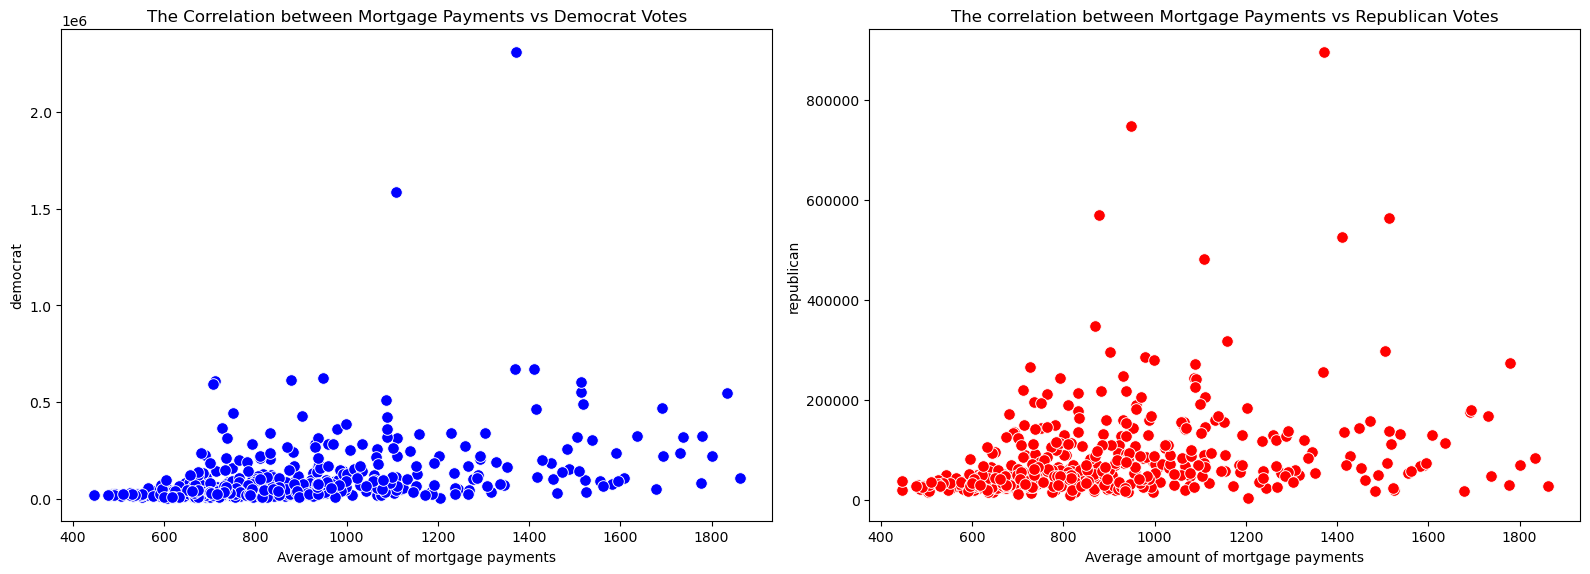

In [60]:
# Does mortgage payment correlate with voting patterns? 
df_avg_mort = df.groupby('county_fips')[['mortamt1', 'democrat', 'republican']].mean()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(ax=axes[0], x=df_avg_mort['mortamt1'], y=df_avg_mort['democrat'], s=70, color='blue')
axes[0].set_title('The Correlation between Mortgage Payments vs Democrat Votes')
axes[0].set_xlabel('Average amount of mortgage payments')
sns.scatterplot(ax=axes[1], x=df_avg_mort['mortamt1'], y=df_avg_mort['republican'], s=70, color='red')
axes[1].set_title('The correlation between Mortgage Payments vs Republican Votes')
axes[1].set_xlabel('Average amount of mortgage payments')
plt.tight_layout()
plt.show()

In [61]:
# calculating the correlation between the two variables using pearson and spearman 
mort_democrat_r, mort_democrat_p = stats.pearsonr(df_avg_mort['mortamt1'], df_avg_mort['democrat'])
mort_democrat_p_str = f'p={mort_democrat_p:.3f}' if mort_democrat_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Mortgage Payments vs Democrat Votes: {mort_democrat_r}, {mort_democrat_p_str}')
mort_democrat_rho, mort_democrat_p2 = stats.spearmanr(df_avg_mort['mortamt1'], df_avg_mort['democrat'])
mort_democrat_p2_str = f'p={mort_democrat_p2:.3f}' if mort_democrat_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Mortgage Payments vs Democrat Votes: {mort_democrat_rho}, {mort_democrat_p2_str}')
# republican 
mort_repub_r, mort_repub_p = stats.pearsonr(df_avg_mort['mortamt1'], df_avg_mort['republican'])
mort_repub_p_str = f'p={mort_repub_p:.3f}' if mort_repub_p > 0.001 else 'p < 0.001'
print(f'The Pearson Correlation Coefficient of Mortgage Payments vs Republican Votes: {mort_repub_r}, {mort_repub_p_str}')
mort_repub_rho, mort_repub_p2 = stats.spearmanr(df_avg_mort['mortamt1'], df_avg_mort['republican'])
mort_repub_p2_str = f'p={mort_repub_p2:.3f}' if mort_repub_p2 > 0.001 else 'p < 0.001'
print(f'The Spearman Correlation Coefficient of Mortgage Payments vs Republican Votes: {mort_repub_rho}, {mort_repub_p2_str}')

The Pearson Correlation Coefficient of Mortgage Payments vs Democrat Votes: 0.383316047845093, p < 0.001
The Spearman Correlation Coefficient of Mortgage Payments vs Democrat Votes: 0.5518765235466699, p < 0.001
The Pearson Correlation Coefficient of Mortgage Payments vs Republican Votes: 0.3097677002411642, p < 0.001
The Spearman Correlation Coefficient of Mortgage Payments vs Republican Votes: 0.4589500125672526, p < 0.001


Both the Pearson and Spearman analyses indicate statistically significant, positive relationships between mortgage payments and votes for both Democrats and Republicans (p < 0.001). Notably, the association is stronger for Democrat votes—with Spearman’s coefficient at 0.55 and Pearson’s at 0.38—compared to Republican votes, which have Spearman’s coefficient of 0.46 and Pearson’s of 0.31.

### Overall Conclusion from Correlation Analysis

- GDP is strongly correlated with voting patterns (linear and non-linear)
- Individual and Family income have moderate monotonic relationship with voting pattens 
- White and Black Population have moderate relationship with vote shares 
- Bachelor variable has no distinct correlation; high school variable is weakly correlated; masters variable is moderated correlated; doctoral varaible is moderately correlated
- married spouse present variable is strongly correlated with votes shares; never married variable is strongly strongly correlated with vote shares
- Mortgage Payments have a moderate relationship with voting patterns

## 4. Predictive Models
To predict election outcomes, we will build predictive models using a structured machine learning approach. As a baseline model, we will implement logistic regression, providing a simple yet interpretable model for classification. To enhance predictive performance, we will employ more advanced models, including the Random Forest Classifier and XGBoost, which are well-suited for handling complex relationships and non-linear patterns in the data. It's important to re-note that in the data preparation stage, we imputed missing values for non-election years using forward and backward fill for the appropriate variables. We will reuse this imputed variables, to increase our data size. 

- Logistic Regression 
- Random Forest Classifier 
- XGBoost

To improve model efficiency and reduce noise, we will select features based on correlation analysis, ensuring that only the most relevant variables are included. Additionally, we will conduct feature importance analysis to further refine our selection process. To optimize performance, we will apply hyperparameter tuning using techniques such as grid search or randomized search. Through this approach, we aim to build robust models that accurately predict election results while maintaining interpretability and efficiency. The following variables will be used (from the correlation analysis; note: more variables can be added in the process due to the feature importance analysis): 

- inctot - average annual income of individuals 
- race_1_freq - Percentage of white 
- educ_attain_1.0_freq - Percentage of High School or Lower Education  
- educ_attain_3.0_freq - Percentage of Masters or Professional Certificate 
- educ_attain_4.0_freq - Percentage of Doctoral Degree
- empstat_1.0_freq - Percentage of Employed 
- empstat_3.0_freq - Percentage of Not In The Labor Force 
- avrg_age - Average Age 
- sex_1_freq - Percentage of Males
- marst_1_freq - Percentage of Married Spouse Present 
- marst_6_freq - Percentage of Never Married 
- mortamt1 - Average Amount of Mortgage Payments 
- GDP (Chained $)

In [62]:
# 1. BUILDING A LOGISTIC REGRESSION MODEL INCLUDING ALL THE YEARS IN THE DATASET
# defining the feature columns
features = [
    'inctot', 'race_1_freq', 'race_2_freq', 'educ_attain_1.0_freq', 
    'educ_attain_3.0_freq', 'educ_attain_4.0_freq', 'mortamt1',
    'empstat_1.0_freq', 'empstat_3.0_freq', 'avrg_age', 
    'sex_1_freq', 'marst_1_freq', 'marst_6_freq', 'GDP (Chained $)'
]

X = df[features] 
y = df['winner'] # target variable 
# using StandardScaler to standardize the numerical features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# splitting the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4514, 14), (1129, 14), (4514,), (1129,))

In [63]:
# training the logistic regression model 
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test) # making the predictions
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
# evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'The Accuracy Score of the Logistic Regression Model: {accuracy}')
print(f'The ROC AUC Score of the Logistic Regression Model: {roc_auc}')

The Accuracy Score of the Logistic Regression Model: 0.7865367581930912
The ROC AUC Score of the Logistic Regression Model: 0.8699554251608599


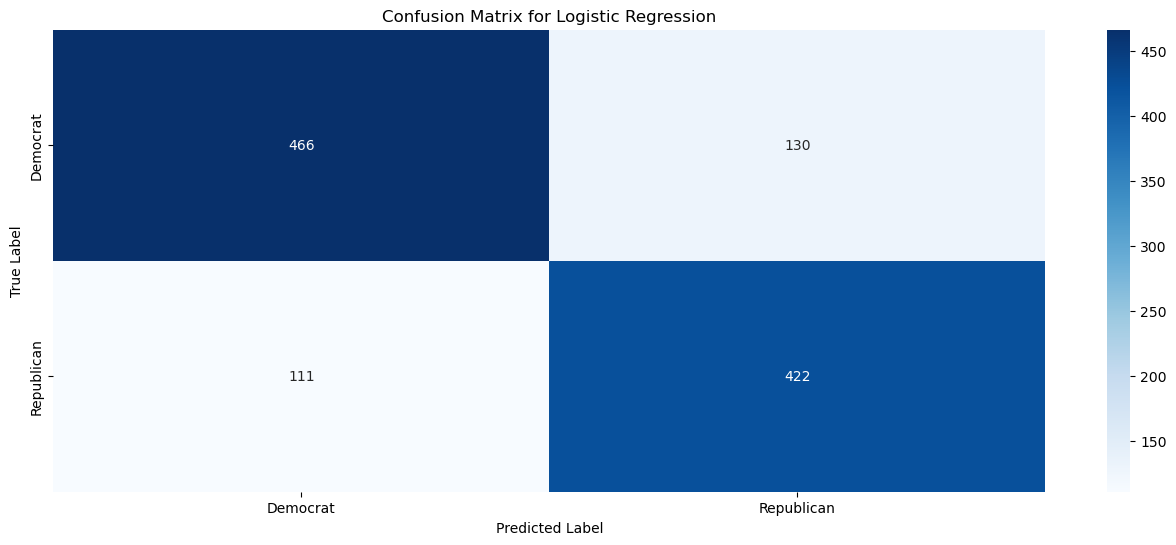

In [64]:
# visualizing the Confusion Matrix
plt.figure(figsize=(16, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Democrat', 'Republican'], yticklabels=['Democrat', 'Republican'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [65]:
class_report

'              precision    recall  f1-score   support\n\n         0.0       0.81      0.78      0.79       596\n         1.0       0.76      0.79      0.78       533\n\n    accuracy                           0.79      1129\n   macro avg       0.79      0.79      0.79      1129\nweighted avg       0.79      0.79      0.79      1129\n'

- The accuracy score: 0.787 <br>
- The ROC AUC Score: 0.870 <br>
- Confusion Matrix: 
    - True negatives: 466, indicates that the number of times that our model correctly predicts the Republican party's win
    - False Positives: 130 (Republican), indicates the model predicts Democrat's win falsely
    - False negatives: 113 (Democrat), indicates that the model predicts Republican win falsely
    - True positives: 420, indicates that the number of times that our model correctly predicts the Democrat party's win

Conclusion: 
- The model performs relatively balanced between the Democrat and Republican, with similar recall and precision score
- It's important to note that this model was trained on all the years of the datasets including the non-election years, (where we used backward and forward fill to impute the missing values)


In [66]:
# FEATURE IMPORTANCE ANALYSIS WITH RFE
# initializing logistic regression model
X = df.drop(columns=['winner', 'county_name', 'democrat', 'green', 'liberitarian',
       'other', 'republican', 'winner', 'Region', 'County', 'total_votes', 'democrat_share', 'republican_share', 'green_share',
       'liberitarian_share', 'other_share', 'county_fips', 'year'])
y = df['winner']
log_reg = LogisticRegression(max_iter=500, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Recursive Feature Elimination (RFE)
rfe = RFE(estimator=log_reg, n_features_to_select=10)  # Change n_features_to_select as needed
rfe.fit(X_train, y_train)

# Print selected features
selected_features = [feature for feature, selected in zip(X_train, rfe.support_) if selected]
print("Selected Features:", selected_features)

Selected Features: ['inctot', 'mortamt1', 'ftotinc', 'foodstmp_1_freq', 'marst_1_freq', 'race_1_freq', 'ctz_stat_1_freq', 'lang_1_freq', 'empstat_1.0_freq', 'GDP (Chained $)']


From the feature importance analysis, we found out that variables, such as family income (ftotinc), percentage of individuals who did not receive food stamp (foodstmp_1_freq), percentage of US citizen (ctz_stat_1_freq), can positively impact the model's performance. Therefore, now we will add these variables into the model and retrain it. 

In [67]:
# selecting the features again with additional features 
selected_features = [
    'inctot', 'race_1_freq', 'race_2_freq', 'educ_attain_1.0_freq', 'ftotinc', 'foodstmp_1_freq',
    'educ_attain_3.0_freq', 'educ_attain_4.0_freq', 'mortamt1',
    'empstat_1.0_freq', 'empstat_3.0_freq', 'avrg_age', 'ctz_stat_1_freq',
    'sex_1_freq', 'marst_1_freq', 'marst_6_freq', 'GDP (Chained $)'
]

X = df[selected_features] 
y = df['winner'] # target variable 
# using StandardScaler to standardize the numerical features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# splitting the dataset into training and test sets 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [68]:
# training the logistic regression model 
log_reg = LogisticRegression(random_state=42, max_iter=500)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test) # making the predictions
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]
# evaluating the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix2 = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f'The Accuracy Score of the Logistic Regression Model: {accuracy}')
print(f'The ROC AUC Score of the Logistic Regression Model: {roc_auc}')

The Accuracy Score of the Logistic Regression Model: 0.7909654561558902
The ROC AUC Score of the Logistic Regression Model: 0.8761568681768387


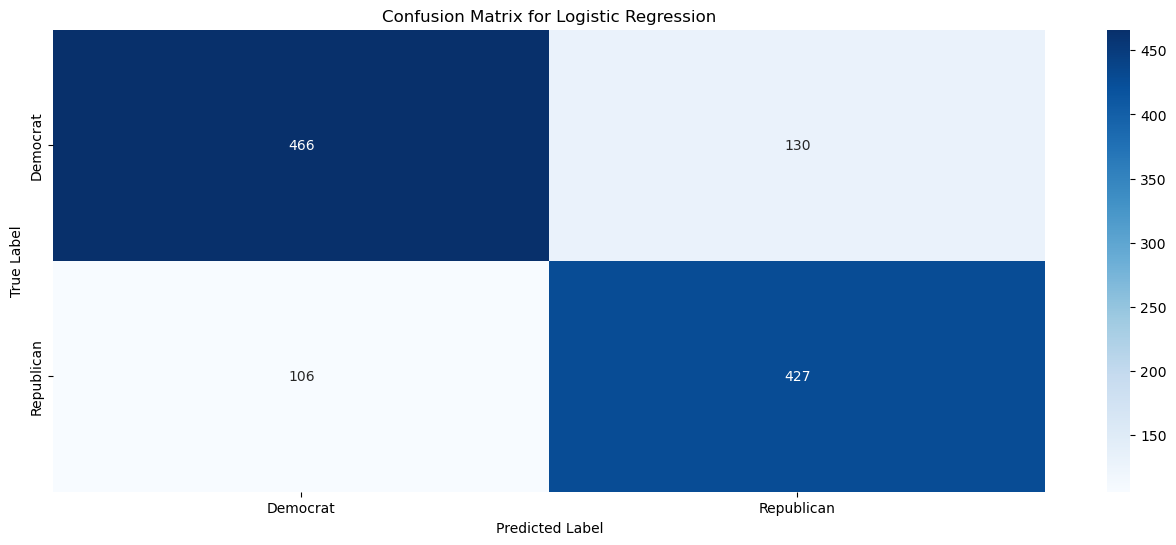

In [69]:
# visualizing the Confusion Matrix
plt.figure(figsize=(16, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['Democrat', 'Republican'], yticklabels=['Democrat', 'Republican'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [70]:
class_report

'              precision    recall  f1-score   support\n\n         0.0       0.81      0.78      0.80       596\n         1.0       0.77      0.80      0.78       533\n\n    accuracy                           0.79      1129\n   macro avg       0.79      0.79      0.79      1129\nweighted avg       0.79      0.79      0.79      1129\n'

In [71]:
# hyperparameter tuning for logistic regression model 
param_grid = { # defining the parameter grid
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l1', 'l2'],  # L1 (Lasso) and L2 (Ridge) regularization
    'solver': ['liblinear']  # for L1 penalty
}

log_reg = LogisticRegression(max_iter=500, random_state=42)
# performing the grid search
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_ # getting the best parameters
print("Best Parameters:", best_params)

# training logistic regression again with best parameters
best_log_reg = LogisticRegression(**best_params, max_iter=500, random_state=42)
best_log_reg.fit(X_train, y_train)
y_pred_best = best_log_reg.predict(X_test)

# evaluating the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)

/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Best Parameters: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}


/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

In [72]:
print("Optimized Accuracy:", accuracy_best)
print("Optimized Classification Report:\n", classification_rep_best)
print("Optimized Confusion Matrix:\n", conf_matrix_best)

Optimized Accuracy: 0.7953941541186891
Optimized Classification Report:
               precision    recall  f1-score   support

         0.0       0.82      0.79      0.80       596
         1.0       0.77      0.80      0.79       533

    accuracy                           0.80      1129
   macro avg       0.79      0.80      0.80      1129
weighted avg       0.80      0.80      0.80      1129

Optimized Confusion Matrix:
 [[471 125]
 [106 427]]


### Random Forest

In [73]:
# using RandomForestClassifier to predict the election results 
df_rf = df.dropna(subset=selected_features + ['winner'])
# splitting the dataset
X_rf = df_rf[selected_features]
y_rf = df_rf['winner']
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf, y_rf, test_size=0.2, random_state=42, stratify=y_rf)
rf_model = RandomForestClassifier(random_state=42) # defining the Random Forest model

# defining the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# using RandomizedSearchCV
random_search_rf = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=20, cv=5, scoring='accuracy', random_state=42, n_jobs=-1)
random_search_rf.fit(X_train_rf, y_train_rf)
# Get the best parameters
best_rf_params = random_search_rf.best_params_
# training the Random Forest again with best parameters
best_rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
best_rf_model.fit(X_train_rf, y_train_rf)
y_pred_rf = best_rf_model.predict(X_test_rf)
# evaluating the model
accuracy_rf = accuracy_score(y_test_rf, y_pred_rf)
classification_rep_rf = classification_report(y_test_rf, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test_rf, y_pred_rf)

rf_results = {
    "Best Parameters": best_rf_params,
}

rf_results

/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_

{'Best Parameters': {'n_estimators': 300,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_depth': 30,
  'bootstrap': False}}

In [74]:
print("Optimized Accuracy:", accuracy_rf)
print("Optimized Classification Report:\n", classification_rep_rf)
print("Optimized Confusion Matrix:\n", conf_matrix_rf)

Optimized Accuracy: 0.9238263950398583
Optimized Classification Report:
               precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       596
         1.0       0.91      0.93      0.92       533

    accuracy                           0.92      1129
   macro avg       0.92      0.92      0.92      1129
weighted avg       0.92      0.92      0.92      1129

Optimized Confusion Matrix:
 [[546  50]
 [ 36 497]]


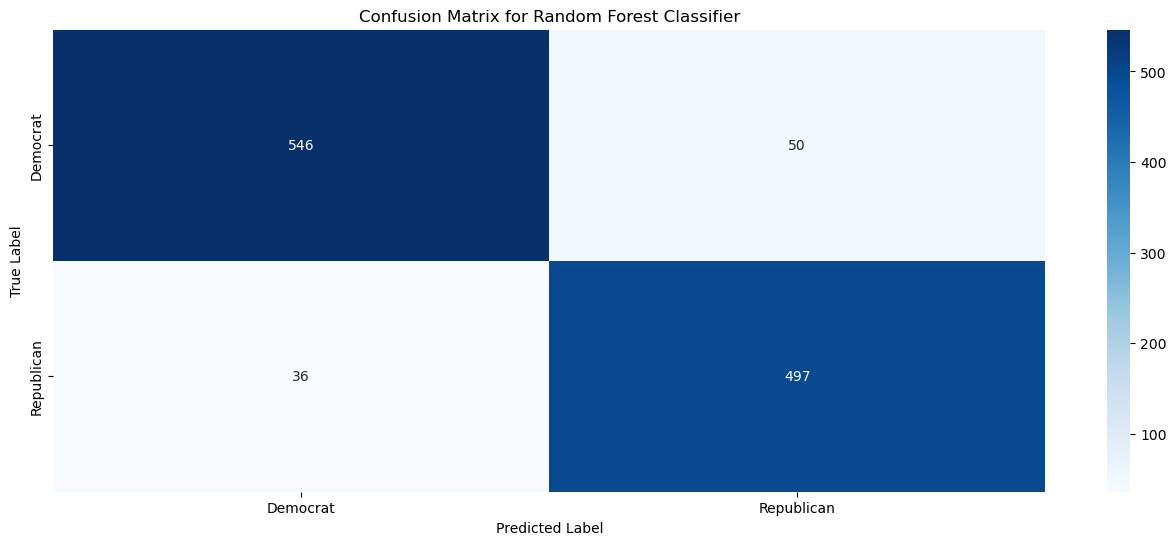

In [75]:
# visualizing the confusion matrix 
plt.figure(figsize=(16,6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Democrat', 'Republican'], yticklabels=['Democrat', 'Republican'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Random Forest Classifier")
plt.show()

We can evidently see that the RandomForestClassifier performs better than Logistic Regression Model. 
- Confusion Matrix: 
    - TP: 500
    - TN: 543
    - FP: 53 
    - FN: 33
- Precision and Recall: 
    - Class 0 (Democrat): 
        - Precision = 94% (543/596)
        - Recall = 91% (543/576)
    - Class 1 (Republican)
        - Precision = 90% (500/533)
        - Recall = 94% (500/553)

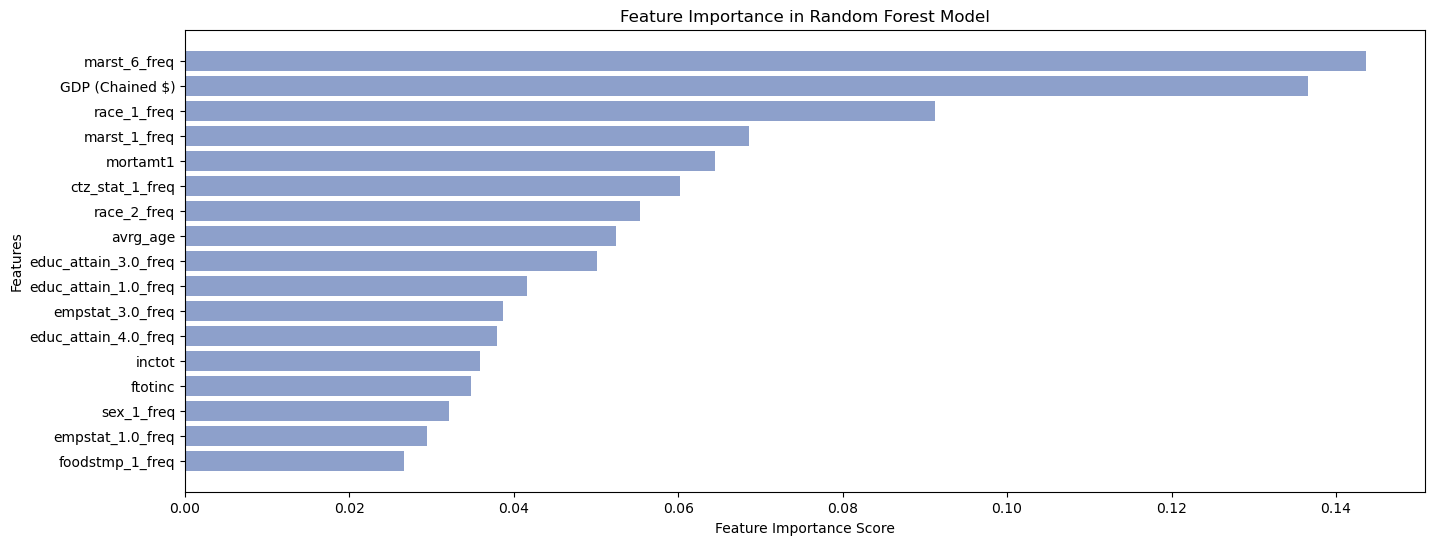

In [76]:
# visualizing the feature importance of RandomForestClassifier
feature_importances = best_rf_model.feature_importances_
features_array = np.array(selected_features)
# sorting the features by importance 
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_features = features_array[sorted_indices]
sorted_importances = feature_importances[sorted_indices]
# visualizing feature importance
plt.figure(figsize=(16, 6))
plt.barh(sorted_features, sorted_importances, color=plt.cm.Set2(2))
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()  # inverting y-axis to show the most important features on top
plt.show()

In [77]:
# using XGBoost classifier to predict the election results 
xgb_model = XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train_rf, y_train_rf)
y_pred_xgb = xgb_model.predict(X_test_rf)
xgb_accuracy = accuracy_score(y_test_rf, y_pred_xgb)
xgb_classification_report = classification_report(y_test_rf, y_pred_xgb)
xgb_conf_matrix = confusion_matrix(y_test_rf, y_pred_xgb)

print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost Classification Report:\n", xgb_classification_report)
print("XGBoost Confusion Matrix:\n", xgb_conf_matrix)

XGBoost Accuracy: 0.9140832595217007
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       596
         1.0       0.91      0.91      0.91       533

    accuracy                           0.91      1129
   macro avg       0.91      0.91      0.91      1129
weighted avg       0.91      0.91      0.91      1129

XGBoost Confusion Matrix:
 [[545  51]
 [ 46 487]]


In [78]:
# defining hyperparameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3, 0.5]
}

# performing the RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(XGBClassifier(random_state=42), param_distributions=param_dist, 
                                       n_iter=20, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search_xgb.fit(X_train_rf, y_train_rf)
best_xgb_params = random_search_xgb.best_params_ # getting the best parameters
best_xgb_model = XGBClassifier(**best_xgb_params, random_state=42) # training it again
best_xgb_model.fit(X_train_rf, y_train_rf)
y_pred_best_xgb = best_xgb_model.predict(X_test_rf)
# evaluating the tuned model
best_xgb_accuracy = accuracy_score(y_test_rf, y_pred_best_xgb)

/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/jrgllshnn/anaconda3/envs/dsp-course/lib/python3.11/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a fut

Optimized XGBoost Accuracy: 0.9255978742249779
XGBoost Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.92      0.93       596
         1.0       0.92      0.93      0.92       533

    accuracy                           0.93      1129
   macro avg       0.93      0.93      0.93      1129
weighted avg       0.93      0.93      0.93      1129



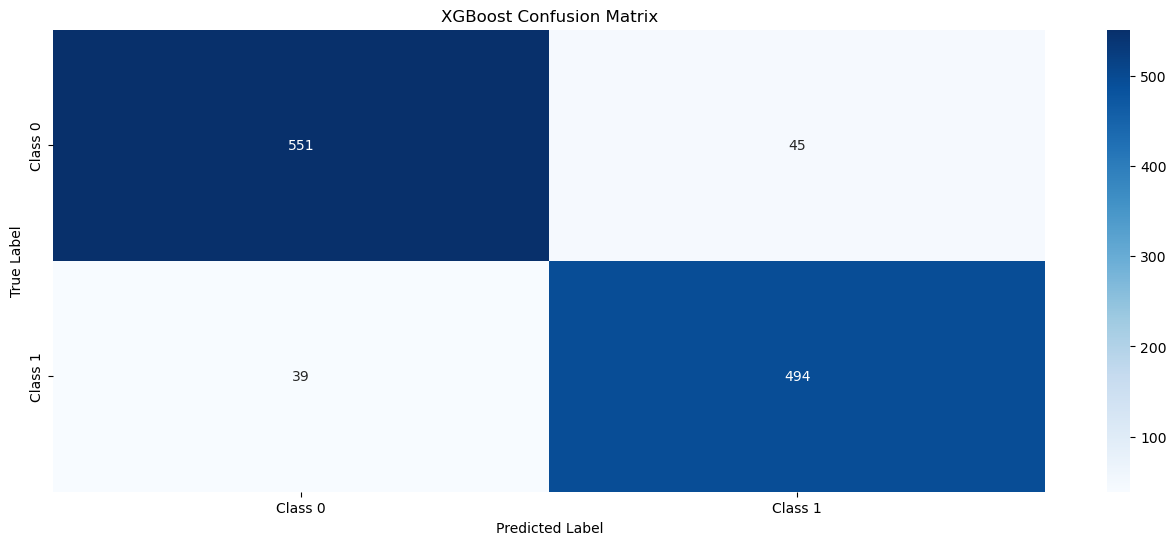

In [79]:
print("Optimized XGBoost Accuracy:", best_xgb_accuracy) # showing the results 
xgb_classification_report = classification_report(y_test_rf, y_pred_best_xgb)
print("XGBoost Classification Report:\n", xgb_classification_report)
xgb_conf_matrix = confusion_matrix(y_test_rf, y_pred_best_xgb)

plt.figure(figsize=(16, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Class 0", "Class 1"], yticklabels=["Class 0", "Class 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("XGBoost Confusion Matrix")
plt.show()

### Conclusion
This project aimed to analyze and predict political outcomes in U.S. counties using socioeconomic factors. The analysis covered data cleaning, exploratory data analysis, correlation analysis, and the application of several predictive modelling techniques. 

1. Data Preparation 

We began by merging two datasets: one containing county-level census and election results, and the other providing county GDP data over time. The datasets were merged using common keys: county_fips and year. Key data cleaning steps included: 
- Renaming columns for consistency 
- Dropping irrelevant or redundant columns such as regional tags and index identifiers 
- Handling missing values, particularly in election results, using forward-fill and backward-fill techniques within each county. 

2. Exploratory Data Analysis (EDA)

We conducted the following EDA to understand data distribution and trends: 

- Summary Statistics revealed strong skewness in variables like GDP 
- Histograms and box plots visualized the distribution of individual and family income, race frequencies, education levels, marital statuses, and employment rates
- Regional analyses compared GDP and vote shares across U.S. regions, highlighting economic and political divides
- Time series analyses showed trends in party support, vote shares, and GDP across election years
- A choropleth map was used to visualize the dominant party by county, revealing clear regional patterns in political leanings

3. Correlation Analysis 

We conducted correlation analysis using Pearson and Spearman correlation coefficients, testing both linear and monotonic relationships between the variables and votes.To avoid biases related to population size, we used vote share percentages rather than raw vote counts when analyzing correlations with demographic and socioeconomic features. Several variables showed strong correlations with political outcomes:

- Income (inctot)
- Race composition (White population)
- Education (Percentage of High School or Lower Education, Percentage of Masters or Professional Certificate, Percentage of Doctoral Degree)
- Employment status (Percentage of Employed, Percentage of Not In The Labor Force )
- Age, gender, marital status, and GDP 
- Mortgage Payments (Average Amount of Mortgage Payments)

These findings informed which socioeconomic factors are influencing the election votes the most and our feature selection process for modelling. 

4. Predictive Modelling 

We modeled the likelihood of a county voting Republican (winner = 1) or Democrat (winner = 0) using several classification algorithms: logistic regression, Random Forest, and XGBoost. We have selected the logistic regression as our baseline model and Random Forest and XGBoost for more advanced approach. Out of the three models, XGBoost model achieved the highest accuracy (92.4%) with high precision and recall across both classes. Feature importance highlighted variables like income, education, employment, and GDP. 

This project demonstrates the power of combining public demographic, economic, and electoral data to predict political behavior. It highlights the importance of thoughtful preprocessing, careful feature engineering, and a comparative approach to modeling. The insights generated can inform political strategy, policy targeting, and further research into the social and economic roots of voting patterns in the U.S.